In [18]:
# enviornment setup 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random 
import seaborn as sns 

In [19]:
#Algorithm functios 
# 1- distance algorithm 
def Distance (point,centroid):
    difference=np.array([[point[0]-centroid[0]],[point[1]-centroid[1]]])
    dist=np.linalg.norm(difference)
    return dist 
                         
    

In [20]:
def Random_cent_init (k,Features):    
    init_cent=random.sample(range(0, len(Features)), k)
    centroids=[Features[i] for i in init_cent ]
    return np.array(centroids)

In [21]:
def Clustring (Features,centroids):
    clusters=[]
    for i in Features:
        distance=[]
        for j in centroids:
            distance.append(Distance (i,j))
        clusters.append(np.argmin(distance))
    return np.array(clusters)
            
            
    

In [22]:
def New_Cetroids (k,Features,clusters):
    new_cetroids=[]
    for i in range(k):
        new_cetroids.append(Features[clusters==i].mean(axis=0))
    return np.array(new_cetroids)
        

In [23]:
def distorsion (centroids,Features,k,clusters):
    ditorstion=0
    for i in range(k):
        ditorstion+=(((Features[clusters==i]-centroids[i])*(Features[clusters==i]-centroids[i])).sum(axis=1)).sum()
    
    return (1/len(Features)*ditorstion)

In [24]:
def K_means_clustrs (k,Features,iterations):
    counts=0
    distor=[]
    for i in range (100):
        centroids=Random_cent_init (k,Features)
        for j in range(iterations):
            Cent=centroids
            print(Cent)
            print("------------------")
            clusters=Clustring (Features,centroids)
            print(clusters)
            print("------------------")
            centroids=New_Cetroids (k,Features,clusters)
            print(centroids)
            print("------------------")
            counts+=1
            if (((1/k)*(np.linalg.norm(centroids-Cent,axis=1)).sum())<0.01):
                break
    distor.append(distorsion (centroids,Features,k,clusters))
    return centroids,distor

In [25]:
df = sns.load_dataset("iris")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [26]:
Features=df[['sepal_length','petal_length']]

In [27]:
Features=np.array(Features)

In [28]:
centroids,dis=K_means_clustrs (4,Features,15)

[[7.7 6.9]
 [6.7 5.7]
 [7.1 5.9]
 [5.  3.3]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 1 1 2 1 1 0 3 2 1 2 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 2 1 1 1 2 2 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[7.72       6.66      ]
 [6.36       5.06833333]
 [7.3        6.04285714]
 [5.19487179 2.35897436]]
------------------
[[7.72       6.66      ]
 [6.36       5.06833333]
 [7.3        6.04285714]
 [5.19487179 2.35897436]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 1 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 2 1 1 0 1 2 2 2 1
 1 1 1 1 1 1 0 0 1 2 1 0 1 2 2 1 1 1 2 2 0 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1
 1 1]
------------------
[[7.72       6.66      ]
 [6.15135135 4.791891

 0 1]
------------------
[[6.8525     5.6925    ]
 [5.88135593 4.40508475]
 [4.88387097 1.37096774]
 [5.2        1.68      ]]
------------------
[[6.8525     5.6925    ]
 [5.88135593 4.40508475]
 [4.88387097 1.37096774]
 [5.2        1.68      ]]
------------------
[2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 3 3 2 3 2 3 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.76153846 1.38461538]
 [5.264      1.604     ]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.76153846 1.38461538]
 [5.264      1.604     ]]
------------------
[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 3 3 2 3 2 3 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1

[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 1 1 1 1 1 2 1 2 1 2 1 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 3 3 3 3 0 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]
------------------
[[5.87413793 4.39310345]
 [4.81515152 1.43030303]
 [5.36111111 1.60555556]
 [6.83902439 5.67804878]]
------------------
[[6.4 5.6]
 [4.6 1.4]
 [4.3 1.1]
 [5.6 4.9]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 1 3 0 3 0 0 0 0 3 0 0 0 0
 0 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0
 0 3]
------------------
[[6.81818182 5.61590909]
 [5.03061224 1.51020408]
 [4.45       1.05      ]
 [5.83818182 4.37272727]]
------------------
[[6.81818182 5.61590909]
 [5.03061224 1.510204

 0 2]
------------------
[[6.86285714 5.80571429]
 [5.41666667 3.79444444]
 [6.13829787 4.66170213]
 [5.006      1.462     ]]
------------------
[[6.86285714 5.80571429]
 [5.41666667 3.79444444]
 [6.13829787 4.66170213]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 2 2 1 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 0 2 0 0 0 0 1 0 0 0 2
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 2
 2 2]
------------------
[[6.89393939 5.83636364]
 [5.48333333 3.90416667]
 [6.21162791 4.75116279]
 [5.006      1.462     ]]
------------------
[[6.89393939 5.83636364]
 [5.48333333 3.90416667]
 [6.21162791 4.75116279]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 2 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2

 3 3]
------------------
[[7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.292      4.94      ]]
------------------
[[7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.292      4.94      ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 0 3 0 3 0 0 1 0 0 0 3
 3 0 3 3 3 3 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 3 3 3 0 0 3 3 0 0 3 3 3
 3 3]
------------------
[[7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.292      4.94      ]]
------------------
[[6.6 4.4]
 [5.4 4.5]
 [5.4 1.5]
 [4.9 3.3]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 3 0 1 3 1 0 0 3 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 3 1 3 1 1 1 1 0 0 1 1 1 0 1 3 1 1 1 0 3 1 0 1 0 0 0 0 1 0 0 0 0
 

------------------
[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 0 3 3 0 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 3 3 3 3 3 3 0 3 0 3 0 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.36111111 1.60555556]
 [5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [4.81515152 1.43030303]]
------------------
[[5.36111111 1.60555556]
 [5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [4.81515152 1.43030303]]
------------------
[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 0 0 0 3 0 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 3 0 3 3 3 3 0 3 0 3 0 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.32380952 1.59047619]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [4.78666667 1.4

 3 3]
------------------
[[5.18       1.5       ]
 [4.6        1.37333333]
 [5.70487805 4.16097561]
 [6.64915254 5.42372881]]
------------------
[[5.18       1.5       ]
 [4.6        1.37333333]
 [5.70487805 4.16097561]
 [6.64915254 5.42372881]]
------------------
[0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 3 2 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.18       1.5       ]
 [4.6        1.37333333]
 [5.76666667 4.19777778]
 [6.66727273 5.48545455]]
------------------
[[5.18       1.5       ]
 [4.6        1.37333333]
 [5.76666667 4.19777778]
 [6.66727273 5.48545455]]
------------------
[0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 3 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 3 3 2 2 2 2 2 3

<ipython-input-22-46d7c96b5f22>:4: RuntimeWarning: Mean of empty slice.
  new_cetroids.append(Features[clusters==i].mean(axis=0))
C:\Users\OWNER\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(



------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

 [5.18       1.5       ]]
------------------
[[4.6        1.37333333]
 [5.73255814 4.18139535]
 [6.66140351 5.45263158]
 [5.18       1.5       ]]
------------------
[3 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 3 3 3
 3 0 3 3 0 0 3 3 0 3 0 3 3 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 2]
------------------
[[4.6        1.37333333]
 [5.77755102 4.26530612]
 [6.72745098 5.52156863]
 [5.18       1.5       ]]
------------------
[[4.6        1.37333333]
 [5.77755102 4.26530612]
 [6.72745098 5.52156863]
 [5.18       1.5       ]]
------------------
[3 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 3 3 3
 3 0 3 3 0 0 3 3 0 3 0 3 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 

 3 3]
------------------
[[6.925      5.840625  ]
 [5.52307692 3.91923077]
 [5.006      1.462     ]
 [6.21428571 4.8047619 ]]
------------------
[[6.925      5.840625  ]
 [5.52307692 3.91923077]
 [5.006      1.462     ]
 [6.21428571 4.8047619 ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 3 3 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 0 3 0 0 0 0 1 0 0 0 3
 3 0 3 3 3 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 3 3 3
 3 3]
------------------
[[6.96206897 5.90344828]
 [5.52592593 3.94074074]
 [5.006      1.462     ]
 [6.25227273 4.84090909]]
------------------
[[6.96206897 5.90344828]
 [5.52592593 3.94074074]
 [5.006      1.462     ]
 [6.25227273 4.84090909]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3

 3 3]
------------------
[[5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [5.006      1.462     ]
 [6.292      4.94      ]]
------------------
[[7.  4.7]
 [4.9 1.5]
 [5.5 1.3]
 [6.1 4.6]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 1 0 3 0 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3
 3 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 0 3 0 0 3 0 0 0 0
 3 0 3 3 3 0 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 3 3 3 0 0 0 3 0 0 0 3 0
 3 3]
------------------
[[6.98529412 5.59705882]
 [4.86410256 1.4974359 ]
 [5.475      1.475     ]
 [5.90153846 4.57384615]]
------------------
[[6.98529412 5.59705882]
 [4.86410256 1.4974359 ]
 [5.475      1.475     ]
 [5.90153846 4.57384615]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 1 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 0 3 0 0 0 0 3 0 0 0 0
 

 3 3]
------------------
[[5.65833333 4.08055556]
 [5.23076923 1.42692308]
 [4.7625     1.5       ]
 [6.6015625  5.3703125 ]]
------------------
[[5.65833333 4.08055556]
 [5.23076923 1.42692308]
 [4.7625     1.5       ]
 [6.6015625  5.3703125 ]]
------------------
[1 2 2 2 1 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 2 1 1
 2 2 1 1 2 2 2 1 2 1 2 1 1 3 0 3 0 3 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0
 0 3 3 3 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.71190476 4.17619048]
 [5.26538462 1.48076923]
 [4.725      1.44166667]
 [6.66034483 5.43448276]]
------------------
[[5.71190476 4.17619048]
 [5.26538462 1.48076923]
 [4.725      1.44166667]
 [6.66034483 5.43448276]]
------------------
[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 2 2 1
 2 2 1 2 2 2 1 1 2 1 2 1 1 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 3 3 0 0 0 0 0 3

 0 0]
------------------
[[6.54583333 5.27361111]
 [5.53214286 3.96071429]
 [4.52727273 1.32727273]
 [5.14102564 1.5       ]]
------------------
[[6.54583333 5.27361111]
 [5.53214286 3.96071429]
 [4.52727273 1.32727273]
 [5.14102564 1.5       ]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 3 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.58787879 5.34545455]
 [5.62941176 4.05294118]
 [4.56923077 1.33846154]
 [5.15945946 1.50540541]]
------------------
[[6.58787879 5.34545455]
 [5.62941176 4.05294118]
 [4.56923077 1.33846154]
 [5.15945946 1.50540541]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 0 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 3 1 3 2 3 3 1 3 3 3 2
 2 2 1 1 2 2 3 3 1 3 1 3 1 3 3 1 1 2 3 3 3 2 1 2 3 2 2 1 2 3 2 1 3 3 2 1 2
 2 1]
------------------
[[5.00576923 1.52692308]
 [5.85636364 4.41636364]
 [6.56956522 5.2       ]
 [7.15       6.09      ]]
------------------
[[5.00576923 1.52692308]
 [5.85636364 4.41636364]
 [6.56956522 5.2       ]
 [7.15       6.09      ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 3 2 2 3 1 3 3 3 2
 2 2 1 1 2 2 3 3 1 3 1 3 2 2 3 1 1 2 3 3 3 2 2 2 3 2 2 1 2 2 2 1 3 2 2 2 2
 2 2]
------------------
[[5.00784314 1.49215686]
 [5.78367347 4.31632653]
 [6.50285714 5.23142857]
 [7.34       6.2       ]]
---------

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.55555556 3.94074074]
 [4.9        4.5       ]
 [6.54583333 5.27361111]
 [5.006      1.462     ]]
------------------
[[5.55555556 3.94074074]
 [4.9        4.5       ]
 [6.54583333 5.27361111]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 0 2 2 2 0 0 0 0 0 2 1 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.66129032 3.99677419]
 [5.3        4.63333333]
 [6.58787879 5.34545455]
 [5.006      1.462     ]]
---------

 0 0]
------------------
[[6.31458333 4.97395833]
 [5.335      1.48      ]
 [4.73333333 1.38333333]
 [5.         2.34      ]]
------------------
[[6.31458333 4.97395833]
 [5.335      1.48      ]
 [4.73333333 1.38333333]
 [5.         2.34      ]]
------------------
[1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 3 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 1 2 2 2 2 3 2 1 2 1 2 0 0 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.33763441 5.01827957]
 [5.32380952 1.49047619]
 [4.76296296 1.40740741]
 [5.18888889 3.07777778]]
------------------
[[6.33763441 5.01827957]
 [5.32380952 1.49047619]
 [4.76296296 1.40740741]
 [5.18888889 3.07777778]]
------------------
[1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 1 2 2 2 2 1 2 1 2 1 2 0 0 0 3 0 0 0 3 0 3 3 0 0 0 3 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 3 3 3 3 0

 3 3]
------------------
[[7.42307692 6.26923077]
 [5.006      1.462     ]
 [5.62941176 4.05294118]
 [6.38301887 5.11886792]]
------------------
[[7.42307692 6.26923077]
 [5.006      1.462     ]
 [5.62941176 4.05294118]
 [6.38301887 5.11886792]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 2 3 3 3 2 2 2 2 2 3 2 2 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 3 0 3 3 0 2 0 3 0 3
 3 3 3 3 3 3 0 0 3 0 3 0 3 3 0 3 3 3 0 0 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 3 3]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [5.609375   4.015625  ]
 [6.35740741 5.09074074]]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [5.609375   4.015625  ]
 [6.35740741 5.09074074]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 2 2 2 2 2 3

 0 0]
------------------
[[6.44186047 5.25813953]
 [5.76666667 4.19777778]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[[6.44186047 5.25813953]
 [5.76666667 4.19777778]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 2 1 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 1 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.41914894 5.21276596]
 [5.72682927 4.14634146]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[[6.41914894 5.21276596]
 [5.72682927 4.14634146]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 3 0 0 3 2 3 3 3 0
 0 0 0 0 0 0 3 3 0 3 0 3 0 0 3 0 0 0 3 3 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 0 0]
------------------
[[6.33684211 5.02982456]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.34       6.2       ]]
------------------
[[5.7 4.2]
 [4.6 1.5]
 [6.1 4. ]
 [5.3 1.5]]
------------------
[3 1 1 1 3 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 3 3
 1 1 3 3 1 1 3 3 1 3 1 3 3 2 2 2 0 2 0 2 0 2 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0
 2 2 2 2 0 2 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 2 0 2 0 2 2
 0 2 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 2 2 2 0 0 0 2 0 2
 0 0]
------------------
[[5.91311475 4.72131148]
 [4.67       1.415     ]
 [6.80769231 5.19487179]
 [5.23       1.49333333]]
------------------
[[5.91311475 4.72131148]
 [4.67       1.415   

 0 0]
------------------
[[6.292      4.94      ]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[[6.292      4.94      ]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 3 0 3 0 3 3 1 3 3 3 0
 0 3 0 0 0 0 3 3 0 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 0 0 0 3 3 0 0 3 3 0 0 0
 0 0]
------------------
[[6.292      4.94      ]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[[5.1 1.4]
 [5.1 1.5]
 [6.7 5.7]
 [6.1 4.7]]
------------------
[0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 3 3 2 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 2 3 2 2 2 2 3 2 2 2 3
 

 2 1]
------------------
[[5.18       2.27333333]
 [6.29545455 4.81136364]
 [6.38421053 5.57368421]
 [7.475      6.3       ]]
------------------
[[5.18       2.27333333]
 [6.29545455 4.81136364]
 [6.38421053 5.57368421]
 [7.475      6.3       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 3 2 2 3 1 3 2 3 1
 2 2 1 1 2 2 3 3 1 2 1 3 1 2 3 1 1 2 3 3 3 2 1 2 3 2 2 1 2 2 1 1 2 2 2 1 2
 2 1]
------------------
[[5.02857143 1.66607143]
 [6.02666667 4.53833333]
 [6.52727273 5.56818182]
 [7.475      6.3       ]]
------------------
[[5.02857143 1.66607143]
 [6.02666667 4.53833333]
 [6.52727273 5.56818182]
 [7.475      6.3       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1

 3 3]
------------------
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]]
------------------
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1

 2 2]
------------------
[[5.27777778 3.51111111]
 [4.56923077 1.33846154]
 [6.35934066 5.04395604]
 [5.15945946 1.50540541]]
------------------
[[5.27777778 3.51111111]
 [4.56923077 1.33846154]
 [6.35934066 5.04395604]
 [5.15945946 1.50540541]]
------------------
[3 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3
 3 1 3 3 1 1 3 3 1 3 1 3 3 2 2 2 0 2 2 2 0 2 0 0 0 0 2 0 2 2 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.52307692 3.91923077]
 [4.6        1.37333333]
 [6.52162162 5.2527027 ]
 [5.18       1.5       ]]
------------------
[[5.52307692 3.91923077]
 [4.6        1.37333333]
 [6.52162162 5.2527027 ]
 [5.18       1.5       ]]
------------------
[3 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3
 3 1 3 3 1 1 3 3 1 3 1 3 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 0 2 2 2 0 0 0 0 0 2

[1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 1 2 2 2 2 1 2 1 2 1 2 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.54583333 5.27361111]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [5.53214286 3.96071429]]
------------------
[[6.54583333 5.27361111]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [5.53214286 3.96071429]]
------------------
[1 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 1 2 2 2 2 1 2 1 2 1 2 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 3 0 0 0 3 3 3 3 3 0 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.58787879 5.34545455]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [5.62941176 4.05294118]]
---------

 2 1]
------------------
[[5.31363636 1.50909091]
 [5.83859649 4.35263158]
 [6.82325581 5.63953488]
 [4.76428571 1.425     ]]
------------------
[[5.31363636 1.50909091]
 [5.83859649 4.35263158]
 [6.82325581 5.63953488]
 [4.76428571 1.425     ]]
------------------
[0 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 0 3 0 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 3 0 3 3 3 3 0 3 0 3 0 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.30434783 1.57391304]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [4.76428571 1.425     ]]
------------------
[[5.30434783 1.57391304]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [4.76428571 1.425     ]]
------------------
[0 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 0 3 0 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 3 0 3 3 3 3 0 3 0 3 0 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 3 3 3 1 1 0 1 1 0 3 0 0 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1]
------------------
[[7.34       6.2       ]
 [6.33928571 5.04285714]
 [5.006      1.462     ]
 [5.55517241 3.97241379]]
------------------
[[6.1 4. ]
 [5.6 4.9]
 [7.4 6.1]
 [6.1 4.7]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 3 1 3 0 3 0 0 0 0 3 0 3 1 0 3 0 3 0 3 3
 0 3 3 3 3 0 0 0 0 3 1 3 3 3 0 0 1 3 0 0 0 0 0 0 0 0 2 1 2 3 2 2 1 2 2 2 3
 3 2 1 1 3 3 2 2 3 2 1 2 3 2 2 3 3 3 2 2 2 3 3 1 2 3 3 3 2 2 3 1 2 2 3 3 3
 3 1]
------------------
[[5.20933333 2.26933333]
 [5.65       4.85833333]
 [7.12272727 6.03181818]
 [6.37317073 4.93902439]]
------------------
[[5.20933333 2.26933333]
 [5.65       4.858333

 0 0]
------------------
[[6.33763441 5.01827957]
 [4.55833333 1.31666667]
 [5.00322581 1.74516129]
 [5.52142857 1.93571429]]
------------------
[[6.33763441 5.01827957]
 [4.55833333 1.31666667]
 [5.00322581 1.74516129]
 [5.52142857 1.93571429]]
------------------
[2 1 1 1 2 3 1 2 1 2 3 2 1 1 3 3 2 2 3 2 3 2 1 2 2 2 2 2 2 1 2 3 2 3 2 1 3
 1 1 2 1 1 1 2 2 1 2 1 2 2 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.32105263 4.98947368]
 [4.65882353 1.33529412]
 [5.05416667 1.5375    ]
 [5.39285714 2.15      ]]
------------------
[[6.32105263 4.98947368]
 [4.65882353 1.33529412]
 [5.05416667 1.5375    ]
 [5.39285714 2.15      ]]
------------------
[2 2 1 1 2 2 1 2 1 2 2 2 1 1 2 2 2 2 3 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 0 0 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0

 [5.76585366 4.1804878 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 3 3 0 3 0 0
 3 0 0 0 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 2 0 0 2 3 2 2 2 0
 0 0 0 0 0 0 2 2 0 2 3 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0]
------------------
[[6.3755102  5.11632653]
 [5.006      1.462     ]
 [7.34       6.2       ]
 [5.65833333 4.08055556]]
------------------
[[6.3755102  5.11632653]
 [5.006      1.462     ]
 [7.34       6.2       ]
 [5.65833333 4.08055556]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 3 0 0 0 3 3 3 3 3 0 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 0 2 0 0 2 3 2 2 2 0
 0 0 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0]
------------------
[[6.35192308 5.09038462]
 [5.006      1.462     ]
 [7.34       6.

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 1 0 1 1 1 1 3 1 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0
 0 0]
------------------
[[6.27954545 4.85454545]
 [6.96428571 5.93214286]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[[6.27954545 4.85454545]
 [6.96428571 5.93214286]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 1 0 1 1 1 1 3 1 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0
 0 0]
------------------
[[6.28222222 4.86888889]
 [6.98518519 5.94814815]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
---------

 1 1]
------------------
[[5.006      1.462     ]
 [6.35818182 5.07636364]
 [5.58387097 4.00645161]
 [7.38571429 6.22857143]]
------------------
[[5.006      1.462     ]
 [6.35818182 5.07636364]
 [5.58387097 4.00645161]
 [7.38571429 6.22857143]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 2 2 2 2 2 1 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 1 3 1 1 3 2 3 1 3 1
 1 1 1 1 1 1 3 3 1 3 1 3 1 1 3 1 1 1 3 3 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 1 1]
------------------
[[5.006      1.462     ]
 [6.35818182 5.07636364]
 [5.58387097 4.00645161]
 [7.38571429 6.22857143]]
------------------
[[7.4 6.1]
 [6.5 5.8]
 [6.  4.5]
 [6.2 4.8]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 2 2 3 2 3 3
 2 3 3 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 0 1 1 0 2 0 1 0 3
 

 3 3]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [5.65833333 4.08055556]
 [6.382      5.13      ]]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [5.65833333 4.08055556]
 [6.382      5.13      ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 2 3 3 3 2 2 2 2 2 3 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 0 3 3 0 2 0 3 0 3
 3 3 3 3 3 3 0 0 3 0 3 0 3 3 0 3 3 3 0 0 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 3 3]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [5.63030303 4.02727273]
 [6.35849057 5.10377358]]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [5.63030303 4.02727273]
 [6.35849057 5.10377358]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 2 2 2 2 2 3

 2 3]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [6.53823529 5.34705882]
 [5.83207547 4.34339623]]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [6.53823529 5.34705882]
 [5.83207547 4.34339623]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 0 3 2 3 1 2 2 1 3 1 2 1 2
 2 2 3 3 2 2 1 1 2 2 3 1 2 2 1 3 3 2 1 1 1 2 2 2 1 2 2 3 2 2 2 3 2 2 2 2 2
 2 2]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [6.50810811 5.31081081]
 [5.812      4.31      ]]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [6.50810811 5.31081081]
 [5.812      4.31      ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 2 2 3 3 3 3 3 2

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 0 2 2 2 0 0 0 0 0 2 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 2 3 2 2 3 0 3 2 3 2
 2 2 2 2 2 2 3 3 2 3 2 3 2 2 3 2 2 2 3 3 3 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2
 2 2]
------------------
[[5.609375   4.015625  ]
 [5.006      1.462     ]
 [6.35740741 5.09074074]
 [7.38571429 6.22857143]]
------------------
[[5.609375   4.015625  ]
 [5.006      1.462     ]
 [6.35740741 5.09074074]
 [7.38571429 6.22857143]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 0 0 0 0 0 2 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 2 3 2 2 3 0 3 2 3 2
 2 2 2 2 2 2 3 3 2 3 2 3 2 2 3 2 2 2 3 3 3 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2
 2 2]
------------------
[[5.58387097 4.00645161]
 [5.006      1.462     ]
 [6.35818182 5.07636364]
 [7.38571429 6.22857143]]
---------

 3 3]
------------------
[[4.76153846 1.38461538]
 [5.6875     4.1525    ]
 [5.27083333 1.54583333]
 [6.645      5.40833333]]
------------------
[[4.76153846 1.38461538]
 [5.6875     4.1525    ]
 [5.27083333 1.54583333]
 [6.645      5.40833333]]
------------------
[2 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 0 0 2
 0 0 2 0 0 0 2 2 0 2 0 2 0 3 1 3 1 3 1 3 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1
 1 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[4.736      1.404     ]
 [5.73255814 4.18139535]
 [5.276      1.52      ]
 [6.66140351 5.45263158]]
------------------
[[4.736      1.404     ]
 [5.73255814 4.18139535]
 [5.276      1.52      ]
 [6.66140351 5.45263158]]
------------------
[2 0 0 0 0 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 0 0 2
 0 0 2 0 0 0 2 2 0 2 0 2 0 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 3 3 1 1 1 1 1 3

 1 0]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.23333333 1.55333333]
 [4.68571429 1.4047619 ]]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.23333333 1.55333333]
 [4.68571429 1.4047619 ]]
------------------
[2 3 3 3 2 2 3 2 3 3 2 3 3 3 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 3 3 2 2 2 3 3 2
 3 3 2 3 3 3 2 2 3 2 3 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.24137931 1.56206897]
 [4.7        1.4       ]]
------------------
[[6.7 5.2]
 [5.6 3.9]
 [4.9 1.4]
 [5.5 4. ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 3 0 3 0 1 0 3 3 1 1 0 1 0 3 1 1 1 0 1 0 0
 1 0 0 0 3 1 1 1 1 0 3 3 0 1 3 3 3 3 1 1 3 3 3 1 1 1 0 0 0 0 0 0 3 0 0 0 0
 

 3 3]
------------------
[[5.01818182 1.63090909]
 [6.75       5.745     ]
 [7.65714286 6.52857143]
 [6.05735294 4.60882353]]
------------------
[[5.01818182 1.63090909]
 [6.75       5.745     ]
 [7.65714286 6.52857143]
 [6.05735294 4.60882353]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 0 3 1 3 1 1 1 2 3 2 1 1 3
 1 1 3 3 1 1 2 2 3 1 3 2 3 1 1 3 3 1 1 2 2 1 3 1 2 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]
------------------
[[5.00566038 1.56037736]
 [6.64827586 5.56206897]
 [7.625      6.475     ]
 [5.95666667 4.465     ]]
------------------
[[5.00566038 1.56037736]
 [6.64827586 5.56206897]
 [7.625      6.475     ]
 [5.95666667 4.465     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 1 3 3 3 3 3 3

 1 1]
------------------
[[5.60645161 3.99677419]
 [6.36315789 5.10701754]
 [5.006      1.462     ]
 [7.475      6.3       ]]
------------------
[[5.60645161 3.99677419]
 [6.36315789 5.10701754]
 [5.006      1.462     ]
 [7.475      6.3       ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 1 1 3 0 3 1 3 1
 1 1 1 1 1 1 3 3 1 1 1 3 1 1 3 1 1 1 3 3 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 1 1]
------------------
[[5.58387097 4.00645161]
 [6.36785714 5.0875    ]
 [5.006      1.462     ]
 [7.42307692 6.26923077]]
------------------
[[5.58387097 4.00645161]
 [6.36785714 5.0875    ]
 [5.006      1.462     ]
 [7.42307692 6.26923077]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 0 1

 2 2]
------------------
[[6.9        5.88064516]
 [6.55       4.67      ]
 [5.80909091 4.50681818]
 [5.01818182 1.63090909]]
------------------
[[6.9        5.88064516]
 [6.55       4.67      ]
 [5.80909091 4.50681818]
 [5.01818182 1.63090909]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 3 2 0 2 0 0 0 0 2 0 0 0 1
 1 0 2 2 1 0 0 0 2 0 2 0 1 0 0 1 2 0 0 0 0 0 1 0 0 0 0 2 0 0 1 2 0 0 1 1 1
 1 2]
------------------
[[6.93448276 5.92068966]
 [6.50384615 4.83846154]
 [5.70227273 4.32045455]
 [5.00784314 1.49215686]]
------------------
[[6.93448276 5.92068966]
 [6.50384615 4.83846154]
 [5.70227273 4.32045455]
 [5.00784314 1.49215686]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 2 2 1 1
 1 1 1 1 2 2 2 2 2 1

 2 2]
------------------
[[5.43571429 1.47857143]
 [5.77755102 4.26530612]
 [6.72745098 5.52156863]
 [4.83888889 1.45555556]]
------------------
[[5.43571429 1.47857143]
 [5.77755102 4.26530612]
 [6.72745098 5.52156863]
 [4.83888889 1.45555556]]
------------------
[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 0 3 3 3 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 0 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
------------------
[[5.43571429 1.47857143]
 [5.81851852 4.31851852]
 [6.7826087  5.59565217]
 [4.83888889 1.45555556]]
------------------
[[5.43571429 1.47857143]
 [5.81851852 4.31851852]
 [6.7826087  5.59565217]
 [4.83888889 1.45555556]]
------------------
[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 0 3 3 3 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 0 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1

[0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 0 3 0 3 0 0 0 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 3 0 1 2 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.83888889 1.45555556]
 [6.66034483 5.43448276]
 [5.71190476 4.17619048]
 [5.43571429 1.47857143]]
------------------
[[4.83888889 1.45555556]
 [6.66034483 5.43448276]
 [5.71190476 4.17619048]
 [5.43571429 1.47857143]]
------------------
[0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 0 3 0 3 0 0 0 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 3 0 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.83888889 1.45555556]
 [6.66727273 5.48545455]
 [5.76666667 4.19777778]
 [5.43571429 1.47857143]]
---------

 3 3]
------------------
[[5.01489362 1.44042553]
 [4.86666667 1.8       ]
 [5.58387097 4.00645161]
 [6.56666667 5.31014493]]
------------------
[[5.01489362 1.44042553]
 [4.86666667 1.8       ]
 [5.58387097 4.00645161]
 [6.56666667 5.31014493]]
------------------
[0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 2 2 3 2 3 3
 2 3 3 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.04761905 1.42619048]
 [4.7875     1.65      ]
 [5.65833333 4.08055556]
 [6.6015625  5.3703125 ]]
------------------
[[5.04761905 1.42619048]
 [4.7875     1.65      ]
 [5.65833333 4.08055556]
 [6.6015625  5.3703125 ]]
------------------
[0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 1 0 1 0 0 1 0 0 3 2 3 2 3 2 3 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2
 2 3 3 3 2 2 2 2 2 3

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 3 2 2 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 1 1 1 1 3 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [6.92580645 5.87096774]
 [6.2452381  4.81428571]
 [5.52592593 3.94074074]]
------------------
[[5.006      1.462     ]
 [6.92580645 5.87096774]
 [6.2452381  4.81428571]
 [5.52592593 3.94074074]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 1 1 1 1 3 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]]
---------

 1 1]
------------------
[[5.2        2.39113924]
 [6.79230769 5.73333333]
 [6.56       4.85      ]
 [6.14545455 4.66818182]]
------------------
[[5.2        2.39113924]
 [6.79230769 5.73333333]
 [6.56       4.85      ]
 [6.14545455 4.66818182]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 3 2 3 3 0 2 3 0 3 3 3 3 2 3 3 3 3 3 3 2 3
 3 2 2 2 3 0 3 3 3 3 3 3 2 3 3 3 3 3 3 0 3 3 3 3 0 3 1 3 1 1 1 1 3 1 1 1 2
 2 1 3 3 2 1 1 1 3 1 3 1 2 1 1 3 3 1 1 1 1 1 2 1 1 1 1 3 1 1 2 3 1 1 2 2 2
 2 3]
------------------
[[5.01818182 1.63090909]
 [6.93448276 5.92068966]
 [6.565      4.93      ]
 [5.82826087 4.42826087]]
------------------
[[5.01818182 1.63090909]
 [6.93448276 5.92068966]
 [6.565      4.93      ]
 [5.82826087 4.42826087]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 3 2 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3
 3 2 2 2 3 3 3 3 3 2

 0 1]
------------------
[[6.82325581 5.63953488]
 [5.85178571 4.37678571]
 [4.78666667 1.42333333]
 [5.32380952 1.59047619]]
------------------
[[6.82325581 5.63953488]
 [5.85178571 4.37678571]
 [4.78666667 1.42333333]
 [5.32380952 1.59047619]]
------------------
[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 2 3 2 3 2 3 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]]
------------------
[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 2 3 2 3 2 3 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1

 2 2]
------------------
[[7.04       5.976     ]
 [5.53214286 3.96071429]
 [6.28297872 4.9       ]
 [5.006      1.462     ]]
------------------
[[7.04       5.976     ]
 [5.53214286 3.96071429]
 [6.28297872 4.9       ]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 0 2 0 2 0 0 1 0 0 0 2
 2 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [6.292      4.94      ]
 [5.006      1.462     ]]
------------------
[[7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [6.292      4.94      ]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2

------------------
[3 0 0 0 0 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 3 3 0 3 0 3 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 2 2 1 1
 2 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.725      1.4       ]
 [6.61269841 5.37936508]
 [5.66486486 4.1       ]
 [5.26538462 1.51923077]]
------------------
[[4.725      1.4       ]
 [6.61269841 5.37936508]
 [5.66486486 4.1       ]
 [5.26538462 1.51923077]]
------------------
[3 0 0 0 0 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 3 3 0 3 0 3 0 1 2 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.725      1.4       ]
 [6.66034483 5.43448276]
 [5.71190476 4.17619048]
 [5.26538462 1.5

 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.75384615 1.51923077]
 [5.272      1.464     ]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.75384615 1.51923077]
 [5.272      1.464     ]]
------------------
[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3 2 2 3 3 3 2 3 3
 2 2 3 3 2 2 2 3 2 3 2 3 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.75925926 1.4962963 ]
 [5.2875     1.4875    ]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.75925926 1.4962963 ]
 [5.2875     1.4875    ]]
------------------
[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 2 3 2 3 2 3 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1

 0 0]
------------------
[[6.39215686 5.14117647]
 [7.42307692 6.26923077]
 [5.65833333 4.08055556]
 [5.006      1.462     ]]
------------------
[[6.39215686 5.14117647]
 [7.42307692 6.26923077]
 [5.65833333 4.08055556]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 2 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0]
------------------
[[6.38301887 5.11886792]
 [7.42307692 6.26923077]
 [5.62941176 4.05294118]
 [5.006      1.462     ]]
------------------
[[6.38301887 5.11886792]
 [7.42307692 6.26923077]
 [5.62941176 4.05294118]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0

 3 3]
------------------
[[5.53214286 3.96071429]
 [6.98518519 5.94814815]
 [5.006      1.462     ]
 [6.28222222 4.86888889]]
------------------
[[5.53214286 3.96071429]
 [6.98518519 5.94814815]
 [5.006      1.462     ]
 [6.28222222 4.86888889]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 1 3 1 3 1 1 0 1 1 1 3
 3 1 3 3 3 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 3 1 3 3 3 1 1 3 3 1 1 3 3 3
 3 3]
------------------
[[5.53214286 3.96071429]
 [7.04       5.976     ]
 [5.006      1.462     ]
 [6.28297872 4.9       ]]
------------------
[[5.53214286 3.96071429]
 [7.04       5.976     ]
 [5.006      1.462     ]
 [6.28297872 4.9       ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3

In [29]:
centroids,dis

(array([[5.53214286, 3.96071429],
        [7.12272727, 6.03181818],
        [5.006     , 1.462     ],
        [6.292     , 4.94      ]]),
 [0.22878013852813853])

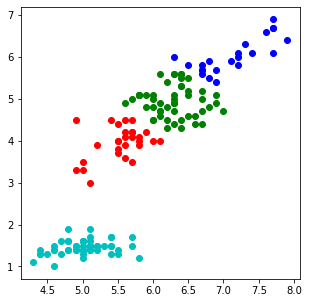

In [30]:
clusters=Clustring (Features,centroids)
plt.figure(figsize=(5,5))
plt.scatter(Features[clusters==0][:,0],Features[clusters==0][:,1],color="r")
plt.scatter(Features[clusters==1][:,0],Features[clusters==1][:,1],color="b")
plt.scatter(Features[clusters==2][:,0],Features[clusters==2][:,1],color="c")
plt.scatter(Features[clusters==3][:,0],Features[clusters==3][:,1],color="g")

In [31]:
def K_means_optimum (k,Features,iterations):
    Distorsion=[]
    for i in range(1,k,1):
        centroids,min_dist=K_means_clustrs (i,Features,iterations)
        Distorsion.append(min_dist)
    return Distorsion

In [32]:
Distorsion=K_means_optimum (8,Features,15)

[[6.7 5.8]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.1 1.9]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.6 4.2]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[7.2 6.1]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[4.4 1.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[6.6 4.6]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.  3.5]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.3 1.5]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[7.3 6.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

 [5.1 1.6]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.262 4.906]
 [5.006 1.462]]
------------------
[[6.262 4.906]
 [5.006 1.462]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1

 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.9 4.9]
 [6.8 5.9]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0
 1 0]
------------------
[[5.58760331 3.23966942]
 [6.91034483 5.92068966]]
------------------
[[5

 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[[5.7 1.7]
 [6.2 4.5]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.00784314 1.49215686]
 [6.27373737 4.92525253]]
------------------
[[5.00784314 1.49215686]
 [6.27373737 4.92525253]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.00566038 1.56037736]
 [6.30103093 4.95876289]]
------------------
[[5

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0]
------------------
[[5.67555556 3.48962963]
 [7.35333333 6.17333333]]
------------------
[[5.67555556 3.48962963]
 [7.35333333 6.17333333]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0]
------------------
[[5.46111111 3.01759259]
 [6.82619048 5.66190476]]
------------------
[[5.46111111 3.01759259]
 [6.82619048 5.66190476]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.  4.5]
 [5.  1.3]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.27373737 4.92525253]
 [5.00784314 1.49215686]]
------------------
[[6

 1 0]
------------------
[[5.46880734 3.03577982]
 [6.83902439 5.67804878]]
------------------
[[5.46880734 3.03577982]
 [6.83902439 5.67804878]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.20759494 2.3835443 ]
 [6.55070423 5.28732394]]
------------------
[[5.20759494 2.3835443 ]
 [6.55070423 5.28732394]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.07096774 1.88064516]
 [6.3875     5.08068

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.55070423 5.28732394]
 [5.20759494 2.3835443 ]]
------------------
[[6.55070423 5.28732394]
 [5.20759494 2.3835443 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.3875     5.08068182]
 [5.07096774 1.88064516]]
------------------
[[6.3875     5.08068182]
 [5.07096774 1.88064516]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 0 0]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.59629

 0 0]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.59629

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.00566038 1.56037736]
 [6.30103093 4.95876289]]
------------------
[[5.00566038 1.56037736]
 [6.30103093 4.95876289]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 0]
------------------
[[6.67037037 5.50185185]
 [5.378125   2.77708333]]
------------------
[[6.67037037 5.50185185]
 [5.378125   2.77708333]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.48571429 5.21818182]
 [5.16575342 2.21780822]]
------------------
[[6.48571429 5.21818182]
 [5.16575342 2.21780822]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.35934066 5.04395604]
 [5.04745763 1.77457

 0 0]
------------------
[[6.55070423 5.28732394]
 [5.20759494 2.3835443 ]]
------------------
[[6.55070423 5.28732394]
 [5.20759494 2.3835443 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.3875     5.08068182]
 [5.07096774 1.88064516]]
------------------
[[6.3875     5.08068182]
 [5.07096774 1.88064516]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.59629

 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.9 5.1]
 [5.1 1.9]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.35       5.03043478]
 [5.03965517 1.73965517]]
------------------
[[6

 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[5.5 3.7]
 [5.4 1.5]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.262 4.906]
 [5.006 1.462]]
------------------
[[6.262 4.906]
 [5.006 

 1 1]
------------------
[[5.00784314 1.49215686]
 [5.96363636 4.46969697]
 [6.89393939 5.83636364]]
------------------
[[5.00784314 1.49215686]
 [5.96363636 4.46969697]
 [6.89393939 5.83636364]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 1
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.00784314 1.49215686]
 [5.92419355 4.42741935]
 [6.85945946 5.75945946]]
------------------
[[5.00784314 1.49215686]
 [5.92419355 4.42741935]
 [6.85945946 5.75945946]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 

 1 1]
------------------
[[5.006      1.462     ]
 [6.41904762 5.13095238]
 [5.4375     3.725     ]]
------------------
[[5.006      1.462     ]
 [6.41904762 5.13095238]
 [5.4375     3.725     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.006      1.462     ]
 [6.54583333 5.27361111]
 [5.53214286 3.96071429]]
------------------
[[5.006      1.462     ]
 [6.54583333 5.27361111]
 [5.53214286 3.96071429]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 2 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 

 2 1]
------------------
[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]
------------------
[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]
------------------
[[5.1 1.5]
 [6.3 6. ]
 [5.2 1.5]]
------------------
[0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 0 2 0 2 0 0 0 0 0 0 2 2 0 0 2 2 2 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------

 1 2]
------------------
[[5.00784314 1.49215686]
 [6.8525     5.6925    ]
 [5.88135593 4.40508475]]
------------------
[[5.00784314 1.49215686]
 [6.8525     5.6925    ]
 [5.88135593 4.40508475]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 

 2 1]
------------------
[[5.00784314 1.49215686]
 [5.89666667 4.41166667]
 [6.85384615 5.71538462]]
------------------
[[5.00784314 1.49215686]
 [5.89666667 4.41166667]
 [6.85384615 5.71538462]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.00784314 1.49215686]
 [5.88135593 4.40508475]
 [6.8525     5.6925    ]]
------------------
[[5.00784314 1.49215686]
 [5.88135593 4.40508475]
 [6.8525     5.6925    ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 

 [6.6 4.6]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0
 0 2 2 1 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.34408602 2.72043011]
 [6.64693878 5.58367347]
 [6.725      4.6375    ]]
------------------
[[5.34408602 2.72043011]
 [6.64693878 5.58367347]
 [6.725      4.6375    ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 0 0 0 2 1 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1
 1 1]
------------------
[[5.07096774 1.88064516]
 [6.71707317 5.70243902]
 [6.1        4.53829787]]
------------------
[[5.07096774 1.88064516]
 [6.71707

 [5.87413793 4.39310345]]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[7.4 6.1]
 [5.1 1.6]
 [5.2 1.4]]
------------------
[2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 2 1 1 2 2 2 1 2 2
 1 1 1 2 1 1 1 1 1 1 1 2 2 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.4373494  5.13855422]
 [5.04375    2.30833333]
 [5.26842105

 0 0]
------------------
[[6.30103093 4.95876289]
 [5.475      1.475     ]
 [4.86829268 1.58536585]]
------------------
[[6.30103093 4.95876289]
 [5.475      1.475     ]
 [4.86829268 1.58536585]]
------------------
[2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.43571429 1.47857143]
 [4.855      1.6375    ]]
------------------
[[6.31458333 4.97395833]
 [5.43571429 1.47857143]
 [4.855      1.6375    ]]
------------------
[2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 0 0]
------------------
[[6.14880952 4.78452381]
 [7.475      6.3       ]
 [5.00555556 1.5962963 ]]
------------------
[[6.14880952 4.78452381]
 [7.475      6.3       ]
 [5.00555556 1.5962963 ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0]
------------------
[[6.09367089 4.69113924]
 [7.21111111 6.13333333]
 [5.00566038 1.56037736]]
------------------
[[6.09367089 4.69113924]
 [7.21111111 6.13333333]
 [5.00566038 1.56037736]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 1 0 1 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 

 1 2]
------------------
[[5.006      1.462     ]
 [6.82325581 5.63953488]
 [5.83859649 4.35263158]]
------------------
[[5.006      1.462     ]
 [6.82325581 5.63953488]
 [5.83859649 4.35263158]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 

 1 1]
------------------
[[5.006      1.462     ]
 [6.56666667 5.31014493]
 [5.58387097 4.00645161]]
------------------
[[5.006      1.462     ]
 [6.56666667 5.31014493]
 [5.58387097 4.00645161]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 2 1 1
 2 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.006      1.462     ]
 [6.6015625  5.3703125 ]
 [5.65833333 4.08055556]]
------------------
[[5.006      1.462     ]
 [6.6015625  5.3703125 ]
 [5.65833333 4.08055556]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 1 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 

<ipython-input-22-46d7c96b5f22>:4: RuntimeWarning: Mean of empty slice.
  new_cetroids.append(Features[clusters==i].mean(axis=0))



------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[[6.3 5.6]
 [5.  1.4]
 [5.8 4.1]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
-----------

 0 0]
------------------
[[6.3287234  5.00425532]
 [4.97272727 1.42045455]
 [5.23333333 2.56666667]]
------------------
[[6.3287234  5.00425532]
 [4.97272727 1.42045455]
 [5.23333333 2.56666667]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.35934066 5.04395604]
 [5.006      1.462     ]
 [5.27777778 3.51111111]]
------------------
[[6.35934066 5.04395604]
 [5.006      1.462     ]
 [5.27777778 3.51111111]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 0 2 0 2 2 2 2 0 2 0 0 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 1 1]
------------------
[[5.006      1.462     ]
 [6.25813953 5.02093023]
 [6.28571429 4.2       ]]
------------------
[[5.006      1.462     ]
 [6.25813953 5.02093023]
 [6.28571429 4.2       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 1
 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.00784314 1.49215686]
 [6.58833333 5.435     ]
 [5.78974359 4.14102564]]
------------------
[[5.00784314 1.49215686]
 [6.58833333 5.435     ]
 [5.78974359 4.14102564]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
------------------
[[5.88135593 4.40508475]
 [5.00784314 1.49215686]
 [6.8525     5.6925    ]]
------------------
[[5.88135593 4.40508475]
 [5.00784314 1.49215686]
 [6.8525     5.6925    ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
------------------
[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.67804878]]
------------------
[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.

 1 2]
------------------
[[5.006      1.462     ]
 [6.82325581 5.63953488]
 [5.83859649 4.35263158]]
------------------
[[5.006      1.462     ]
 [6.82325581 5.63953488]
 [5.83859649 4.35263158]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 

 2 2]
------------------
[[7.12272727 6.03181818]
 [5.03684211 1.70175439]
 [6.0943662  4.70422535]]
------------------
[[7.12272727 6.03181818]
 [5.03684211 1.70175439]
 [6.0943662  4.70422535]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 2 0 0 2 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[7.04       5.976     ]
 [5.00566038 1.56037736]
 [6.04444444 4.60555556]]
------------------
[[7.04       5.976     ]
 [5.00566038 1.56037736]
 [6.04444444 4.60555556]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 

 2 2]
------------------
[[6.00769231 4.42307692]
 [5.22608696 2.12753623]
 [6.54       5.48909091]]
------------------
[[6.00769231 4.42307692]
 [5.22608696 2.12753623]
 [6.54       5.48909091]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 0]
------------------
[[5.89814815 4.40925926]
 [5.00566038 1.56037736]
 [6.80697674 5.64883721]]
------------------
[[5.89814815 4.40925926]
 [5.00566038 1.56037736]
 [6.80697674 5.64883721]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 

 0 0]
------------------
[[6.34148936 4.99042553]
 [5.01666667 3.58333333]
 [5.006      1.462     ]]
------------------
[[6.34148936 4.99042553]
 [5.01666667 3.58333333]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.5012987  5.20649351]
 [5.46086957 3.9       ]
 [5.006      1.462     ]]
------------------
[[6.5012987  5.20649351]
 [5.46086957 3.9       ]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[6.5 4.6]
 [4.8 1.9]
 [6.1 4.9]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 2 1 0 0 2 0 0 2 2 0 2 2 0 2 2
 0 0 0 0 2 0 2 2 0 2 2 2 0 0 2 2 2 2 0 1 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 2 0 2 2
 2 2]
------------------
[[6.54827586 4.69310345]
 [5.00555556 1.5962963 ]
 [6.21343284 5.09552239]]
------------------
[[6.54827586 4.69310345]
 [5.00555556 1.5962963 ]
 [6.21343284 5.09552239]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 0 1 0 0 1 0 0 2 0 0 2 0 0 0 2 0 2 2
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 1 0 0 0 0 1 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2]
------

 1 0]
------------------
[[5.9147541  4.41639344]
 [6.85       5.74210526]
 [5.00784314 1.49215686]]
------------------
[[5.9147541  4.41639344]
 [6.85       5.74210526]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [5.00784314 1.49215686]]
------------------
[[5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[6.9 5.1]
 [5.1 1.6]
 [5.1 1.5]]
------------------
[2 2 2 2 2 1

 0 0]
------------------
[[6.72745098 5.52156863]
 [5.77755102 4.26530612]
 [5.006      1.462     ]]
------------------
[[6.72745098 5.52156863]
 [5.77755102 4.26530612]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1]
------------------
[[6.7826087  5.59565217]
 [5.81851852 4.31851852]
 [5.006      1.462     ]]
------------------
[[6.7826087  5.59565217]
 [5.81851852 4.31851852]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 

 1 1]
------------------
[[5.34666667 2.16      ]
 [6.32105263 4.98947368]
 [4.895      1.4325    ]]
------------------
[[5.34666667 2.16      ]
 [6.32105263 4.98947368]
 [4.895      1.4325    ]]
------------------
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.32727273 2.60909091]
 [6.3287234  5.00425532]
 [4.95555556 1.43555556]]
------------------
[[5.32727273 2.60909091]
 [6.3287234  5.00425532]
 [4.95555556 1.43555556]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

 0 0]
------------------
[[6.08148148 5.27407407]
 [5.60900901 3.11441441]
 [7.475      6.3       ]]
------------------
[[6.08148148 5.27407407]
 [5.60900901 3.11441441]
 [7.475      6.3       ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 2 0 0 2 0 2 0 2 0
 0 0 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0]
------------------
[[6.2640625  4.9859375 ]
 [5.16944444 2.18611111]
 [7.38571429 6.22857143]]
------------------
[[6.2640625  4.9859375 ]
 [5.16944444 2.18611111]
 [7.38571429 6.22857143]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 2 0 0 2 0 2 2 2 0
 0 0 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 2 2 2 0 

 2 2]
------------------
[[7.04       5.976     ]
 [5.00566038 1.56037736]
 [6.04444444 4.60555556]]
------------------
[[7.04       5.976     ]
 [5.00566038 1.56037736]
 [6.04444444 4.60555556]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 2
 2 2]
------------------
[[6.95333333 5.88      ]
 [5.00784314 1.49215686]
 [5.97826087 4.51014493]]
------------------
[[6.95333333 5.88      ]
 [5.00784314 1.49215686]
 [5.97826087 4.51014493]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 2
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 

 [5.79803922 4.28431373]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2]
------------------
[[5.006      1.462     ]
 [6.8        5.60666667]
 [5.82181818 4.33272727]]
------------------
[[5.006      1.462     ]
 [6.8        5.60666667]
 [5.82181818 4.33272727]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2]
------------------
[[5.006      1.462     ]
 [6.82325581 5.63953488]
 [5.83859649 4.35263158]]
------------------
[[5.006      1.462  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 2 2
 2 2]
------------------
[[5.00576923 1.52692308]
 [6.96428571 5.93214286]
 [6.01714286 4.54571429]]
------------------
[[5.00576923 1.52692308]
 [6.96428571 5.93214286]
 [6.01714286 4.54571429]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 2
 2 2]
------------------
[[5.00784314 1.49215686]
 [6.92580645 5.87096774]
 [5.97647059 4.49411765]]
------------------
[[5.00784314 1.49215686]
 [6.92580645 5.87096774]
 [5.97647059 4.

 1 1]
------------------
[[5.92608696 3.99565217]
 [6.36233766 5.17792208]
 [5.006      1.462     ]]
------------------
[[5.92608696 3.99565217]
 [6.36233766 5.17792208]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.68611111 4.06666667]
 [6.5859375  5.378125  ]
 [5.006      1.462     ]]
------------------
[[5.68611111 4.06666667]
 [6.5859375  5.378125  ]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 

 2 2]
------------------
[[5.006      1.462     ]
 [5.81698113 4.30377358]
 [6.76382979 5.58510638]]
------------------
[[5.006      1.462     ]
 [5.81698113 4.30377358]
 [6.76382979 5.58510638]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
------------------
[[5.006      1.462     ]
 [5.83859649 4.35263158]
 [6.82325581 5.63953488]]
------------------
[[5.006      1.462     ]
 [5.83859649 4.35263158]
 [6.82325581 5.63953488]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 

 0 1]
------------------
[[6.82325581 5.63953488]
 [5.83859649 4.35263158]
 [5.006      1.462     ]]
------------------
[[6.82325581 5.63953488]
 [5.83859649 4.35263158]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 

 1 1]
------------------
[[4.55833333 1.31666667]
 [6.31458333 4.97395833]
 [5.13333333 1.67619048]]
------------------
[[4.55833333 1.31666667]
 [6.31458333 4.97395833]
 [5.13333333 1.67619048]]
------------------
[2 0 0 0 2 2 0 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2
 0 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.6375     1.3375    ]
 [6.31458333 4.97395833]
 [5.16052632 1.70526316]]
------------------
[[4.6375     1.3375    ]
 [6.31458333 4.97395833]
 [5.16052632 1.70526316]]
------------------
[2 0 0 0 2 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 0 2
 0 0 2 0 0 0 2 2 0 2 0 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

 1 2]
------------------
[[5.00784314 1.49215686]
 [6.86388889 5.78055556]
 [5.93650794 4.43650794]]
------------------
[[5.00784314 1.49215686]
 [6.86388889 5.78055556]
 [5.93650794 4.43650794]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.85384615 5.71538462]
 [5.89666667 4.41166667]]
------------------
[[5.00784314 1.49215686]
 [6.85384615 5.71538462]
 [5.89666667 4.41166667]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 

 1 1]
------------------
[[7.11304348 5.99130435]
 [6.01973684 4.60263158]
 [5.00784314 1.49215686]]
------------------
[[7.11304348 5.99130435]
 [6.01973684 4.60263158]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 1]
------------------
[[6.95333333 5.88      ]
 [5.97826087 4.51014493]
 [5.00784314 1.49215686]]
------------------
[[6.95333333 5.88      ]
 [5.97826087 4.51014493]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 

 3 0]
------------------
[[5.87413793 4.39310345]
 [4.63529412 1.37647059]
 [5.19411765 1.55      ]
 [6.83902439 5.67804878]]
------------------
[[5.87413793 4.39310345]
 [4.63529412 1.37647059]
 [5.19411765 1.55      ]
 [6.83902439 5.67804878]]
------------------
[2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2
 1 1 2 2 1 1 2 2 1 2 1 2 2 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 3 3 3 3 0 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]
------------------
[[5.87413793 4.39310345]
 [4.66315789 1.38947368]
 [5.2125     1.553125  ]
 [6.83902439 5.67804878]]
------------------
[[5.87413793 4.39310345]
 [4.66315789 1.38947368]
 [5.2125     1.553125  ]
 [6.83902439 5.67804878]]
------------------
[2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 1 2
 1 1 2 2 1 1 2 2 1 2 1 2 2 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0

 2 2]
------------------
[[6.93333333 5.89333333]
 [5.006      1.462     ]
 [6.25581395 4.82325581]
 [5.52592593 3.94074074]]
------------------
[[6.93333333 5.89333333]
 [5.006      1.462     ]
 [6.25581395 4.82325581]
 [5.52592593 3.94074074]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 0 0 0 0 3 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[6.96428571 5.93214286]
 [5.006      1.462     ]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]]
------------------
[[6.96428571 5.93214286]
 [5.006      1.462     ]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2

 3 3]
------------------
[[6.33950617 4.8654321 ]
 [4.87027027 1.42162162]
 [5.31875    1.88125   ]
 [6.10625    5.43125   ]]
------------------
[[6.33950617 4.8654321 ]
 [4.87027027 1.42162162]
 [5.31875    1.88125   ]
 [6.10625    5.43125   ]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 2
 1 1 1 1 1 1 1 2 1 1 1 2 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 3 3 3 3 3 3 0 3 3 3 0
 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 0 0 3 0 3 3 3 0 0 0
 3 3]
------------------
[[6.07586207 4.47931034]
 [4.86842105 1.43421053]
 [5.33125    1.98125   ]
 [6.67894737 5.72894737]]
------------------
[[6.07586207 4.47931034]
 [4.86842105 1.43421053]
 [5.33125    1.98125   ]
 [6.67894737 5.72894737]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 0 0 3 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0

[1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 2 2 2 3 2 3 2 0 2 3 3 2 2 2 3 2 3 3 2 3 2 2 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 0 3 3 3 2 0 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2]
------------------
[[5.23214286 1.72142857]
 [4.752      1.38      ]
 [6.58       5.23857143]
 [5.57777778 4.23333333]]
------------------
[[5.23214286 1.72142857]
 [4.752      1.38      ]
 [6.58       5.23857143]
 [5.57777778 4.23333333]]
------------------
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 2 2 2 3 2 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3
 3 2 2 2 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 0 3 2 2 2 2 2 2 3 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.25185185 1.58888889]
 [4.73333333 1.38333333]
 [6.6559322  5.41864407]
 [5.71       4.1975    ]]
---------

 3 1]
------------------
[[7.475      6.3       ]
 [5.83207547 4.34339623]
 [5.00784314 1.49215686]
 [6.53823529 5.34705882]]
------------------
[[7.475      6.3       ]
 [5.83207547 4.34339623]
 [5.00784314 1.49215686]
 [6.53823529 5.34705882]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 0 3 3 0 1 0 3 0 3
 3 3 1 1 3 3 0 0 3 3 1 0 3 3 0 1 1 3 0 0 0 3 3 3 0 3 3 1 3 3 3 1 3 3 3 3 3
 3 3]
------------------
[[7.475      6.3       ]
 [5.812      4.31      ]
 [5.00784314 1.49215686]
 [6.50810811 5.31081081]]
------------------
[[7.475      6.3       ]
 [5.812      4.31      ]
 [5.00784314 1.49215686]
 [6.50810811 5.31081081]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 3 3 1 1 1 1 1 3

 2 2]
------------------
[[7.12272727 6.03181818]
 [5.01960784 1.50196078]
 [6.11594203 4.72898551]
 [5.225      3.5125    ]]
------------------
[[7.12272727 6.03181818]
 [5.01960784 1.50196078]
 [6.11594203 4.72898551]
 [5.225      3.5125    ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 2 2 3 2 3 3 2 2 2 3 2 2 2 2 3 2 2 2 2
 2 2 2 2 2 3 3 3 3 2 2 2 2 2 3 3 2 2 3 3 2 2 2 2 3 2 0 2 0 2 0 0 3 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[7.04       5.976     ]
 [5.006      1.462     ]
 [6.16949153 4.76610169]
 [5.3875     3.75      ]]
------------------
[[7.04       5.976     ]
 [5.006      1.462     ]
 [6.16949153 4.76610169]
 [5.3875     3.75      ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 2 2 3 2 3 3 2 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2

 3 0]
------------------
[[6.23888889 4.76111111]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.85277778 5.78611111]]
------------------
[[6.23888889 4.76111111]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.85277778 5.78611111]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 3 0 3 3 3 3 1 3 3 3 0
 0 3 0 0 0 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 3 3 3 0 0
 0 0]
------------------
[[6.25853659 4.82195122]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.92580645 5.87096774]]
------------------
[[6.25853659 4.82195122]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.92580645 5.87096774]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 0 0 3 0 3 3 0 3 0 3 0 0 3 0 3 0 0 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
------------------
[[6.20487805 4.72439024]
 [5.006      1.462     ]
 [6.86285714 5.80571429]
 [5.48333333 3.90416667]]
------------------
[[6.20487805 4.72439024]
 [5.006      1.462     ]
 [6.86285714 5.80571429]
 [5.48333333 3.90416667]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 0 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 2 0 2 2 2 2 3 2 2 2 0
 0 2 0 0 0 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 0
 0 0]
------------------
[[6.2452381  4.81428571]
 [5.006      1.462     ]
 [6.92580645 5.87096774]
 [5.52592593 3.94074074]]
---------

 1 1]
------------------
[[4.75909091 1.73636364]
 [5.99558824 4.75294118]
 [5.18064516 1.43548387]
 [7.01724138 5.44137931]]
------------------
[[4.75909091 1.73636364]
 [5.99558824 4.75294118]
 [5.18064516 1.43548387]
 [7.01724138 5.44137931]]
------------------
[2 2 0 0 2 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 2 2
 2 0 2 2 0 0 2 0 0 2 0 2 2 3 1 3 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 3 1 3 3 3 3 1 3 3 3 1
 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 1 3 3 3 1 3 3 3 1 3
 1 1]
------------------
[[4.71904762 1.71428571]
 [5.93166667 4.49      ]
 [5.19375    1.459375  ]
 [6.9        5.71891892]]
------------------
[[4.71904762 1.71428571]
 [5.93166667 4.49      ]
 [5.19375    1.459375  ]
 [6.9        5.71891892]]
------------------
[2 2 0 0 2 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 0 2 2
 2 0 2 2 0 0 2 0 0 2 0 2 2 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 3 1 1 1 1 1 1

 1 1]
------------------
[[5.79803922 4.28431373]
 [6.74489796 5.55306122]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]]
------------------
[[5.79803922 4.28431373]
 [6.74489796 5.55306122]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]]
------------------
[2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 2 3 2 3 2 2 2 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 3 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0]
------------------
[[5.82181818 4.33272727]
 [6.8        5.60666667]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]]
------------------
[[5.82181818 4.33272727]
 [6.8        5.60666667]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]]
------------------
[2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 2 3 2 3 2 2 2 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 3 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 2 3 2 3 2 2 1 2 2 2 3
 3 2 3 3 3 3 2 2 3 2 3 2 3 2 2 3 3 3 2 2 2 3 3 3 2 3 3 3 2 2 3 3 2 2 3 3 3
 3 3]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [6.292      4.94      ]]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [6.292      4.94      ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 2 3 2 3 2 2 1 2 2 2 3
 3 2 3 3 3 3 2 2 3 2 3 2 3 2 2 3 3 3 2 2 2 3 3 3 2 3 3 3 2 2 3 3 2 2 3 3 3
 3 3]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [6.292      4.94      ]]
---------

[3 0 0 0 3 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 3 0 0 3 3 0 3 0 3 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[4.68571429 1.4047619 ]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.23333333 1.55333333]]
------------------
[[4.68571429 1.4047619 ]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.23333333 1.55333333]]
------------------
[3 0 0 0 3 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 3 3 0 3 0 3 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[4.7        1.4       ]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.24137931 1.56206897]]
---------

 1 1]
------------------
[[5.27916667 1.45416667]
 [6.31458333 4.97395833]
 [4.5        1.27777778]
 [4.90952381 1.8952381 ]]
------------------
[[5.27916667 1.45416667]
 [6.31458333 4.97395833]
 [4.5        1.27777778]
 [4.90952381 1.8952381 ]]
------------------
[0 0 2 2 0 0 2 0 2 0 0 3 2 2 0 0 0 0 0 0 0 0 2 3 3 3 3 0 0 3 3 0 0 0 0 0 0
 0 2 0 0 2 2 3 3 2 0 2 0 0 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.21724138 1.45517241]
 [6.31458333 4.97395833]
 [4.55833333 1.31666667]
 [4.94615385 2.16923077]]
------------------
[[5.21724138 1.45517241]
 [6.31458333 4.97395833]
 [4.55833333 1.31666667]
 [4.94615385 2.16923077]]
------------------
[0 0 2 2 0 0 2 0 2 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 2 2 0 3 2 0 2 0 0 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1

 1 1]
------------------
[[5.006      1.462     ]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]
 [6.96428571 5.93214286]]
------------------
[[5.006      1.462     ]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]
 [6.96428571 5.93214286]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 3 1 3 3 3 3 2 3 3 3 1
 1 3 1 1 1 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 1 1 3 3 1 1 3 3 1 1 1
 1 1]
------------------
[[5.006      1.462     ]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [6.98518519 5.94814815]]
------------------
[[5.006      1.462     ]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [6.98518519 5.94814815]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1

 0 0]
------------------
[[6.38653846 5.13076923]
 [5.64571429 4.06571429]
 [5.006      1.462     ]
 [7.42307692 6.26923077]]
------------------
[[6.38653846 5.13076923]
 [5.64571429 4.06571429]
 [5.006      1.462     ]
 [7.42307692 6.26923077]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 3 0 0 3 1 3 0 3 0
 0 0 0 0 0 0 3 3 0 0 0 3 0 0 3 0 0 0 3 3 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 0 0]
------------------
[[6.36851852 5.11481481]
 [5.63030303 4.02727273]
 [5.006      1.462     ]
 [7.42307692 6.26923077]]
------------------
[[6.36851852 5.11481481]
 [5.63030303 4.02727273]
 [5.006      1.462     ]
 [7.42307692 6.26923077]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 0

 0 0]
------------------
[[6.53653846 5.51923077]
 [6.05227273 4.32954545]
 [4.51       1.3       ]
 [5.11818182 1.66363636]]
------------------
[[6.53653846 5.51923077]
 [6.05227273 4.32954545]
 [4.51       1.3       ]
 [5.11818182 1.66363636]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 3 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0]
------------------
[[6.78636364 5.63636364]
 [5.86363636 4.35636364]
 [4.56923077 1.33846154]
 [5.15789474 1.54473684]]
------------------
[[6.78636364 5.63636364]
 [5.86363636 4.35636364]
 [4.56923077 1.33846154]
 [5.15789474 1.54473684]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1

 1 1]
------------------
[[6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[[6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 0 1 0 0 0 0 2 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 1 1]
------------------
[[6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[[6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 3 2 2 2 3 3 3 3 3 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 0 2 0 2 0 0 3 0 0 0 2
 2 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[7.12272727 6.03181818]
 [5.006      1.462     ]
 [6.30444444 5.        ]
 [5.63030303 4.02727273]]
------------------
[[7.12272727 6.03181818]
 [5.006      1.462     ]
 [6.30444444 5.        ]
 [5.63030303 4.02727273]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 0 2 0 2 0 0 3 0 0 0 2
 2 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[7.12272727 6.03181818]
 [5.006      1.462     ]
 [6.29387755 4.95306122]
 [5.55517241 3.97241379]]
---------

 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

 3 3]
------------------
[[5.81777778 4.22444444]
 [5.00784314 1.49215686]
 [7.34       6.2       ]
 [6.38974359 5.24358974]]
------------------
[[5.81777778 4.22444444]
 [5.00784314 1.49215686]
 [7.34       6.2       ]
 [6.38974359 5.24358974]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 0 3 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0
 0 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 2 3 3 2 0 2 3 2 3
 3 3 3 3 3 3 2 2 3 2 0 2 3 3 2 3 3 3 2 2 2 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3
 3 3]
------------------
[[5.72682927 4.14634146]
 [5.006      1.462     ]
 [7.38571429 6.22857143]
 [6.4        5.18666667]]
------------------
[[5.72682927 4.14634146]
 [5.006      1.462     ]
 [7.38571429 6.22857143]
 [6.4        5.18666667]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 0 0 3 0 3 3
 0 3 3 3 0 0 0 0 0 3

[2 2 1 1 2 2 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 3 0 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3
 3 0]
------------------
[[5.82181818 4.33272727]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [6.8        5.60666667]]
------------------
[[5.82181818 4.33272727]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [6.8        5.60666667]]
------------------
[2 2 1 1 2 2 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 3 3 3 3 0 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3
 3 0]
------------------
[[5.85178571 4.37678571]
 [4.6        1.37333333]
 [5.17777778 1.54166667]
 [6.82325581 5.63953488]]
---------

 2 0]
------------------
[[5.9147541  4.41639344]
 [4.72173913 1.37826087]
 [6.85       5.74210526]
 [5.24285714 1.58571429]]
------------------
[[5.9147541  4.41639344]
 [4.72173913 1.37826087]
 [6.85       5.74210526]
 [5.24285714 1.58571429]]
------------------
[3 1 1 1 1 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 1 3
 1 1 3 1 1 1 3 3 1 3 1 3 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
------------------
[[5.88135593 4.40508475]
 [4.725      1.4       ]
 [6.8525     5.6925    ]
 [5.25925926 1.57407407]]
------------------
[[5.88135593 4.40508475]
 [4.725      1.4       ]
 [6.8525     5.6925    ]
 [5.25925926 1.57407407]]
------------------
[3 1 1 1 1 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 1 3
 1 1 3 1 1 1 3 3 1 3 1 3 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0

 0 0]
------------------
[[6.11454545 4.70363636]
 [5.10153846 1.97846154]
 [7.54       6.39      ]
 [6.66       5.625     ]]
------------------
[[6.11454545 4.70363636]
 [5.10153846 1.97846154]
 [7.54       6.39      ]
 [6.66       5.625     ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 3 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 3 0 3 3 3 2 0 2 3 2 3
 3 3 0 0 3 3 2 2 0 3 0 2 0 3 2 0 0 3 3 2 2 3 0 3 2 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]
------------------
[[5.9637931  4.47068966]
 [5.00555556 1.5962963 ]
 [7.54       6.39      ]
 [6.60357143 5.51071429]]
------------------
[[5.9637931  4.47068966]
 [5.00555556 1.5962963 ]
 [7.54       6.39      ]
 [6.60357143 5.51071429]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 1 1 1 3 3 0 3 3 0 1 0 0 0 3
 3 3 3 3 3 3 0 0 3 0 3 0 3 3 0 3 3 3 0 0 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 3 3]
------------------
[[7.34       6.2       ]
 [5.55517241 3.97241379]
 [5.006      1.462     ]
 [6.33928571 5.04285714]]
------------------
[[4.6 1. ]
 [4.9 3.3]
 [6.  4. ]
 [6.2 4.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 3 3 1 3 1 1 2 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 1 2 2 2 3 1 2 3 3 3 3 3 3 1 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.006      1.462     ]
 [5.01666667 3.58333333]
 [5.675      4.02      ]
 [6.52162162 5.2527027 ]]
------------------
[[5.006      1.462     ]
 [5.01666667 3.583333

 2 2]
------------------
[[5.812      4.31      ]
 [5.00784314 1.49215686]
 [6.50810811 5.31081081]
 [7.475      6.3       ]]
------------------
[[5.812      4.31      ]
 [5.00784314 1.49215686]
 [6.50810811 5.31081081]
 [7.475      6.3       ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3 2 2 3 0 3 2 3 2
 2 2 0 2 2 2 3 3 2 2 0 3 2 2 3 2 2 2 3 3 3 2 2 2 3 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.76666667 4.19777778]
 [5.006      1.462     ]
 [6.44186047 5.25813953]
 [7.475      6.3       ]]
------------------
[[5.76666667 4.19777778]
 [5.006      1.462     ]
 [6.44186047 5.25813953]
 [7.475      6.3       ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 0 2 2 0 0 0 0 0 2

 1 1]
------------------
[[7.38571429 6.22857143]
 [6.35818182 5.07636364]
 [5.006      1.462     ]
 [5.58387097 4.00645161]]
------------------
[[5.4 1.3]
 [6.2 4.5]
 [5.1 1.5]
 [5.5 4. ]]
------------------
[2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 3 1 1 1 3 1 3 3 1 3 1 3 1 3 3 1 3 1 1 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.55       1.425     ]
 [6.52       5.232     ]
 [4.90238095 1.46904762]
 [5.488      3.928     ]]
------------------
[[5.55       1.425     ]
 [6.52       5.232     ]
 [4.90238095 1.46904762]
 [5.488      3.928     ]]
------------------
[2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 0 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 0 2 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 3 3 3 3 3 1 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 1 1 1 1
 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 3 1 1 3 0 3 3 3 1
 1 3 0 1 1 1 3 3 1 3 0 3 1 1 3 0 0 1 3 3 3 1 1 1 3 1 1 0 3 1 1 1 3 1 1 1 1
 1 1]
------------------
[[5.82916667 4.26666667]
 [6.39705882 5.26176471]
 [5.00784314 1.49215686]
 [7.28235294 6.11176471]]
------------------
[[5.82916667 4.26666667]
 [6.39705882 5.26176471]
 [5.00784314 1.49215686]
 [7.28235294 6.11176471]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 1 1 3 0 3 1 3 1
 1 1 1 1 1 1 3 3 1 3 0 3 1 1 3 1 1 1 3 3 3 1 1 1 3 1 1 0 1 1 1 1 3 1 1 1 1
 1 1]
------------------
[[5.75581395 4.16744186]
 [6.40232558 5.21395349]
 [5.006      1.462     ]
 [7.38571429 6.22857143]]
---------

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 0 1 0 0 0 0 2 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 1 1]
------------------
[[6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[[6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 0 1 0 1 0 0 2 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 1]
------------------
[[7.04       5.976     ]
 [6.28297872 4.9       ]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
---------

 2 0]
------------------
[[5.81851852 4.31851852]
 [5.23       1.49333333]
 [6.7826087  5.59565217]
 [4.67       1.415     ]]
------------------
[[5.81851852 4.31851852]
 [5.23       1.49333333]
 [6.7826087  5.59565217]
 [4.67       1.415     ]]
------------------
[1 3 3 3 1 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 3 3 1 1 1 3 1 1
 3 3 1 1 3 3 1 1 3 1 3 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 0]
------------------
[[5.83859649 4.35263158]
 [5.23       1.49333333]
 [6.82325581 5.63953488]
 [4.67       1.415     ]]
------------------
[[5.83859649 4.35263158]
 [5.23       1.49333333]
 [6.82325581 5.63953488]
 [4.67       1.415     ]]
------------------
[1 3 3 3 1 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 3 3 1 1 1 3 1 1
 3 3 1 1 3 3 1 1 3 1 3 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0

 0 0]
------------------
[[6.402      5.148     ]
 [7.42307692 6.26923077]
 [5.66486486 4.1       ]
 [5.006      1.462     ]]
------------------
[[6.402      5.148     ]
 [7.42307692 6.26923077]
 [5.66486486 4.1       ]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 2 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0]
------------------
[[6.38653846 5.13076923]
 [7.42307692 6.26923077]
 [5.64571429 4.06571429]
 [5.006      1.462     ]]
------------------
[[6.38653846 5.13076923]
 [7.42307692 6.26923077]
 [5.64571429 4.06571429]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 0 0 0 0 0 3 0 0 3 3 0 0 0 3 0 0 0 0 0 0 0 0 3 3 2 3 3 2 0 2 3 2 3
 3 3 3 3 3 3 2 2 3 2 3 2 3 3 2 3 3 3 2 2 2 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3
 3 3]
------------------
[[5.58387097 4.00645161]
 [5.006      1.462     ]
 [7.38571429 6.22857143]
 [6.35818182 5.07636364]]
------------------
[[5.  1.5]
 [5.8 5.1]
 [5.8 4. ]
 [6.7 5.2]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 1 2 3 2 2 2 2 1 2 3 2 2 2 2 1 2 3 1
 2 3 3 3 2 2 2 2 2 1 2 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 3 1 3 3 3 3 2 3 3 3 3
 3 3 1 1 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 3 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 3
 1 1]
------------------
[[5.006      1.462     ]
 [5.98333333 4.96666667]
 [5.64705882 4.04117647]
 [6.80208333 5.49583333]]
------------------
[[5.006      1.462     ]
 [5.98333333 4.966666

 0 0]
------------------
[[6.292      4.94      ]
 [7.12272727 6.03181818]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[[6.292      4.94      ]
 [7.12272727 6.03181818]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 1 0 1 0 1 1 3 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0]
------------------
[[6.292      4.94      ]
 [7.12272727 6.03181818]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[[6.3 5.1]
 [5.1 3. ]
 [4.9 4.5]
 [6.4 5.6]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 2 1 0 0 0 1 0 2 2 0 2 0 0 0 0
 0 0 0 0 0 1 1 1 2 0 2 0 0 0 2 2 2 0 2 1 2 2 2 0 1 2 3 0 3 3 3 3 2 3 3 3 0
 

 0 0]
------------------
[[6.44       5.19333333]
 [5.00784314 1.49215686]
 [5.72682927 4.20487805]
 [7.42307692 6.26923077]]
------------------
[[6.44       5.19333333]
 [5.00784314 1.49215686]
 [5.72682927 4.20487805]
 [7.42307692 6.26923077]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 0 0
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 3 0 0 3 2 3 0 3 0
 0 0 0 0 0 0 3 3 0 0 2 3 0 0 3 0 0 0 3 3 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0
 0 0]
------------------
[[6.402      5.148     ]
 [5.006      1.462     ]
 [5.66486486 4.1       ]
 [7.42307692 6.26923077]]
------------------
[[6.402      5.148     ]
 [5.006      1.462     ]
 [5.66486486 4.1       ]
 [7.42307692 6.26923077]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0

[2 2 0 0 2 2 0 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 0 2 2 0 0 2 2 2 2 0 2 2 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.52727273 1.32727273]
 [6.55070423 5.28732394]
 [5.14102564 1.5       ]
 [5.55517241 3.97241379]]
------------------
[[4.52727273 1.32727273]
 [6.55070423 5.28732394]
 [5.14102564 1.5       ]
 [5.55517241 3.97241379]]
------------------
[2 2 0 0 2 2 0 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 3 3 1 3 1 1
 3 1 1 1 3 3 3 3 3 1 3 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.56923077 1.33846154]
 [6.59384615 5.35846154]
 [5.15945946 1.50540541]
 [5.64571429 4.06571429]]
---------

 1 1]
------------------
[[5.58387097 4.00645161]
 [6.35185185 5.06296296]
 [5.006      1.462     ]
 [7.34       6.2       ]]
------------------
[[6.  4.5]
 [6.9 4.9]
 [6.  4. ]
 [5.8 1.2]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 2 1 0 0 2 1 2 2 2 2 0 2 1 0 2 0 2 0 2 0 0
 0 1 1 1 0 2 2 2 2 0 0 0 1 0 2 2 0 0 2 2 2 2 2 0 2 2 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.96451613 4.72903226]
 [6.81521739 5.55434783]
 [5.55652174 3.84782609]
 [5.006      1.462     ]]
------------------
[[5.96451613 4.72903226]
 [6.81521739 5.55434783]
 [5.55652174 3.84782609]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 2 0 0 0 2 0 2 2 2 2 0 2 0 0 2 0 2 0 2 0 0
 0 0 1 1 0 2 2 2 2 0 0 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 1 0 1 1 1 1 2 1 1 1 1
 

 3 3]
------------------
[[5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.92580645 5.87096774]
 [6.25853659 4.82195122]]
------------------
[[5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.92580645 5.87096774]
 [6.25853659 4.82195122]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 3 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 3 3 2 2 3 3 3
 3 3]
------------------
[[5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]]
------------------
[[5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3

 0 3]
------------------
[[6.58857143 5.38285714]
 [7.54       6.39      ]
 [5.00555556 1.5962963 ]
 [5.88627451 4.41568627]]
------------------
[[6.58857143 5.38285714]
 [7.54       6.39      ]
 [5.00555556 1.5962963 ]
 [5.88627451 4.41568627]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3
 3 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 2 3 0 3 1 0 0 1 3 1 0 1 0
 0 0 3 3 0 0 1 1 3 0 3 1 0 0 1 3 3 0 1 1 1 0 0 0 1 0 0 3 0 0 0 3 0 0 0 0 0
 0 3]
------------------
[[6.53823529 5.34705882]
 [7.475      6.3       ]
 [5.00784314 1.49215686]
 [5.83207547 4.34339623]]
------------------
[[6.53823529 5.34705882]
 [7.475      6.3       ]
 [5.00784314 1.49215686]
 [5.83207547 4.34339623]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3
 3 3 0 0 3 3 3 3 3 0

 1 0]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]]
------------------
[[5.4 1.5]
 [5.8 5.1]
 [5.6 4.1]
 [6.2 4.5]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 1 2 3 3
 3 3 3 3 3 2 2 2 2 1 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 1 1 1 1 1 2 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 3 1 1
 1 1]
------------------
[[5.006      1.462     ]
 [6.59777778 5.61111111]
 [5.53214286 3.96071429]
 [6.45925926 4.71111111]]
------------------
[[5.006      1.462     ]
 [6.59777778 5.61111111]
 [5.53214286 3.96071429]
 [6.45925926 4.71111111]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 1 1 1 1 2 1 1 1 3
 

 1 1]
------------------
[[7.475      6.3       ]
 [6.44186047 5.25813953]
 [5.76666667 4.19777778]
 [5.006      1.462     ]]
------------------
[[7.475      6.3       ]
 [6.44186047 5.25813953]
 [5.76666667 4.19777778]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2
 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 0 2 0 1 0 1
 1 1 1 1 1 1 0 0 1 1 2 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[7.475      6.3       ]
 [6.41914894 5.21276596]
 [5.72682927 4.14634146]
 [5.006      1.462     ]]
------------------
[[7.475      6.3       ]
 [6.41914894 5.21276596]
 [5.72682927 4.14634146]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 2 2 1 2 1 1
 2 1 1 1 2 2 2 2 2 1

 1 1]
------------------
[[5.53214286 3.96071429]
 [6.28297872 4.9       ]
 [5.006      1.462     ]
 [7.04       5.976     ]]
------------------
[[5.53214286 3.96071429]
 [6.28297872 4.9       ]
 [5.006      1.462     ]
 [7.04       5.976     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 3 1 3 1 3 3 0 3 3 3 1
 1 3 1 1 1 1 3 3 1 3 1 3 1 3 3 1 1 1 3 3 3 1 1 1 3 1 1 1 3 3 1 1 3 3 1 1 1
 1 1]
------------------
[[5.53214286 3.96071429]
 [6.292      4.94      ]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[[5.53214286 3.96071429]
 [6.292      4.94      ]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1

 0 0]
------------------
[[6.28297872 4.9       ]
 [5.53214286 3.96071429]
 [7.04       5.976     ]
 [5.006      1.462     ]]
------------------
[[6.28297872 4.9       ]
 [5.53214286 3.96071429]
 [7.04       5.976     ]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 2 0 2 0 2 2 1 2 2 2 0
 0 2 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 0 0 0 2 2 0 0 2 2 0 0 0
 0 0]
------------------
[[6.292      4.94      ]
 [5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [5.006      1.462     ]]
------------------
[[6.292      4.94      ]
 [5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0

[[6.1 4.7]
 [5.9 5.1]
 [6.2 4.5]
 [6.  4. ]
 [6.4 5.3]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 4 3 2 0 0 3 2 3 3 3 3 0 3 2 0 3 2 3 0 3 0 0
 2 2 4 4 2 3 3 3 3 1 0 2 2 2 3 3 3 0 3 3 3 3 3 2 3 3 4 1 4 4 4 4 1 4 4 4 4
 4 4 1 1 4 4 4 4 1 4 1 4 0 4 4 0 0 4 4 4 4 4 4 4 4 4 4 0 4 4 4 1 4 4 4 4 4
 4 1]
------------------
[[6.00769231 4.71538462]
 [5.72222222 4.98888889]
 [6.43076923 4.49230769]
 [5.18378378 2.24324324]
 [6.82195122 5.68536585]]
------------------
[[6.00769231 4.71538462]
 [5.72222222 4.98888889]
 [6.43076923 4.49230769]
 [5.18378378 2.24324324]
 [6.82195122 5.68536585]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 0 2 0 2 3 2 0 3 0 2 0 0 2 0 0 2 0 0 2 0 0
 2 2 2 2 0 2 0 0 0 1 1 0 2 2 0 0 0 0 0 3 0 0 0 2 3 0 4 1 4 4 4 4 1 4 4 4 2
 4 4 1 1 4 4 4 4 1 4 1 4 0 4 4 0 0 4 4 4 4 4 0 1 4 4 4 0 4 4 4 1 4 4 4 0 4
 1 1]
----

[3 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 0 3 0 3 0 3 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 1 1 1 1 2 1 1 1 4
 4 1 4 4 4 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 4 1 1 4 4 1 1 4 4 1 1 4 4 4
 4 4]
------------------
[[4.76428571 1.425     ]
 [6.98518519 5.94814815]
 [5.53214286 3.96071429]
 [5.31363636 1.50909091]
 [6.28222222 4.86888889]]
------------------
[[4.76428571 1.425     ]
 [6.98518519 5.94814815]
 [5.53214286 3.96071429]
 [5.31363636 1.50909091]
 [6.28222222 4.86888889]]
------------------
[3 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 0 3 0 3 0 3 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 1 4 1 1 2 1 1 1 4
 4 1 4 4 4 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 4 1 4 4 4 1 1 4 4 1 1 4 4 4
 4 4]
------------------
[[4.76428571 1.425     ]
 [7.04       5.976     ]
 [5.532142

 3 0]
------------------
[[6.24594595 4.77027027]
 [7.54       6.39      ]
 [5.53214286 3.96071429]
 [6.592      5.572     ]
 [5.006      1.462     ]]
------------------
[[5.5 4. ]
 [5.8 3.9]
 [5.8 5.1]
 [6.4 4.5]
 [5.  1.6]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 0 3 0 3 0 3 0 0 1 1 3 1 3 0 1 3 0 2 1 3 3
 3 3 3 3 3 1 0 0 1 2 0 3 3 3 0 0 0 3 1 0 0 0 0 3 0 1 2 2 2 2 2 2 0 2 2 2 3
 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 3 3 3 2 2 2 3 2 2 2 3 2 3 2 2 2 3 2 3
 2 2]
------------------
[[5.39473684 3.97368421]
 [5.82222222 3.93333333]
 [6.4974359  5.57435897]
 [6.6030303  4.91818182]
 [5.006      1.462     ]]
------------------
[[5.39473684 3.97368421]
 [5.82222222 3.93333333]
 [6.4974359  5.57435897]
 [6.6030303  4.91818182]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 0 3 1 3 0 3 0 0 1 1 3 1 3 0 1 3 

 3 2]
------------------
[[5.76333333 4.07      ]
 [5.00784314 1.49215686]
 [5.675      4.76875   ]
 [6.508      4.92      ]
 [6.95357143 5.93571429]]
------------------
[[5.76333333 4.07      ]
 [5.00784314 1.49215686]
 [5.675      4.76875   ]
 [6.508      4.92      ]
 [6.95357143 5.93571429]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 2 3 0 3 0 0 0 0 2 0 3 2 0 3 0 2 0 3 2
 3 3 3 3 2 0 0 0 0 2 2 2 3 3 0 0 2 2 0 0 0 0 0 0 0 0 4 2 4 3 4 4 2 4 4 4 3
 3 4 2 2 3 3 4 4 2 4 2 4 3 4 4 3 3 4 4 4 4 4 3 3 4 3 3 2 4 4 3 2 4 4 3 3 3
 3 2]
------------------
[[5.58333333 3.86666667]
 [5.006      1.462     ]
 [5.795      4.77      ]
 [6.4625     4.953125  ]
 [7.0625     5.99583333]]
------------------
[[5.58333333 3.86666667]
 [5.006      1.462     ]
 [5.795      4.77      ]
 [6.4625     4.953125  ]
 [7.0625     5.99583333]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 0 0]
------------------
[[6.3        4.83571429]
 [5.53448276 3.99310345]
 [5.43571429 1.47857143]
 [6.93448276 5.92068966]
 [4.83888889 1.45555556]]
------------------
[[6.3        4.83571429]
 [5.53448276 3.99310345]
 [5.43571429 1.47857143]
 [6.93448276 5.92068966]
 [4.83888889 1.45555556]]
------------------
[4 4 4 4 4 2 4 4 4 4 2 4 4 4 2 2 2 4 2 4 2 4 4 4 4 4 4 2 2 4 4 2 2 2 4 4 2
 4 4 4 4 4 4 4 4 4 4 4 2 4 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 3 0 3 3 3 3 1 3 3 3 0
 0 3 0 0 0 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 0 0 3 3 0 0 3 3 0 0 0
 0 0]
------------------
[[6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [5.43571429 1.47857143]
 [6.98518519 5.94814815]
 [4.83888889 1.45555556]]
------------------
[[6.28222222 4.86888889]
 [5.53214286 3.96071429]
 [5.43571429 1.47857143]
 [6.98518519 5.94814815]
 [4.83888889 1.45555556]]
------------------
[4 4 4 4 4 2 4 4 4 4 2 4 4 4 2 2 2 4 2 4 2 4 4 4 4 4 4 2 2 4 4 2 2 2 4

 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 2 2]
------------------
[[5.006      1.462     ]
 [5.52592593 3.94074074]
 [6.37333333 5.34666667]
 [6.25185185 4.64444444]
 [7.3125     6.15      ]]
------------------
[[5.006      1.462     ]
 [5.52592593 3.94074074]
 [6.37333333 5.34666667]
 [6.25185185 4.64444444]
 [7.3125     6.15      ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 2 1 3 3 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 2 3 1 1 1 1 2 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 2 2 4 2 2 4 1 4 2 4 2
 2 2 3 2 2 2 4 4 3 4 3 4 3 2 4 3 3 2 4 4 4 2 2 2 4 2 2 3 2 2 2 2 4 2 2 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [5.52592593 3.94074074]
 [6.41290323 5.37419355]
 [6.24285714 4.65714286]
 [7.38571429 6.22857143]]
------------------
[[5.006      1.462     ]
 [5.52592593 3.94074074]
 [6.41290323 5.37419355]
 [6.24285714 4.65714286]
 [7.38571429 6.22857143]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 0 3]
------------------
[[6.53448276 5.16206897]
 [7.17368421 6.11578947]
 [5.52307692 3.91923077]
 [6.03076923 4.72307692]
 [5.006      1.462     ]]
------------------
[[6.53448276 5.16206897]
 [7.17368421 6.11578947]
 [5.52307692 3.91923077]
 [6.03076923 4.72307692]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 3 0 2 3 3 3 2 0 2 2 2 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 0 0 3 2 2 2 2 3 2 3 0 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 1 0 0 1 2 1 1 1 0
 0 0 3 3 0 0 1 1 3 1 3 1 3 0 1 3 3 0 1 1 1 0 0 0 1 0 0 3 0 0 0 3 1 0 0 0 0
 0 3]
------------------
[[6.54827586 5.3137931 ]
 [7.34       6.2       ]
 [5.52307692 3.91923077]
 [6.08666667 4.72      ]
 [5.006      1.462     ]]
------------------
[[6.54827586 5.3137931 ]
 [7.34       6.2       ]
 [5.52307692 3.91923077]
 [6.08666667 4.72      ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

 0 0]
------------------
[[6.23928571 5.31428571]
 [7.24444444 6.1       ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.39230769 4.65769231]]
------------------
[[6.23928571 5.31428571]
 [7.24444444 6.1       ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.39230769 4.65769231]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 3 4 3 4 3 4 3 3 3 3 4 3 4 3 3 4 3 4 3 4 4
 4 4 4 4 4 3 3 3 3 0 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 0 0 1 0 0 1 3 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 4 0 1 4 4 0 1 1 1 0 0 0 1 0 0 4 0 0 4 0 1 0 0 0 0
 0 0]
------------------
[[6.29666667 5.35666667]
 [7.34       6.2       ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.38148148 4.66666667]]
------------------
[[6.29666667 5.35666667]
 [7.34       6.2       ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.38148148 4.66666667]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 4 0]
------------------
[[6.12727273 4.72424242]
 [5.52307692 3.91923077]
 [5.006      1.462     ]
 [7.475      6.3       ]
 [6.57586207 5.42068966]]
------------------
[[6.12727273 4.72424242]
 [5.52307692 3.91923077]
 [5.006      1.462     ]
 [7.475      6.3       ]
 [6.57586207 5.42068966]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 0 4 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 4 4 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 4 0 3 4 4 3 1 3 4 3 4
 4 4 0 0 4 4 3 3 0 4 0 3 0 4 3 0 0 4 3 3 3 4 0 4 3 4 4 0 4 4 4 0 4 4 4 0 4
 4 0]
------------------
[[6.13235294 4.73529412]
 [5.52307692 3.91923077]
 [5.006      1.462     ]
 [7.475      6.3       ]
 [6.58571429 5.43214286]]
------------------
[[7.2 6.1]
 [6.7 5.7]
 [6.3 5. ]
 [5.7 4.2]
 [6.5 4.6]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 4 3 4 3 4 3 3 3 3 2 3 4 3 3 4 

 0 0]
------------------
[[6.29387755 4.95306122]
 [5.43571429 1.47857143]
 [5.55517241 3.97241379]
 [4.83888889 1.45555556]
 [7.12272727 6.03181818]]
------------------
[[6.29387755 4.95306122]
 [5.43571429 1.47857143]
 [5.55517241 3.97241379]
 [4.83888889 1.45555556]
 [7.12272727 6.03181818]]
------------------
[3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 1 3 1 3 3 3 3 3 3 1 1 3 3 1 1 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 1 3 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 4 0 4 0 4 4 2 4 4 4 0
 0 4 0 0 0 0 4 4 0 4 0 4 0 4 4 0 0 0 4 4 4 0 0 0 4 0 0 0 4 4 0 0 4 4 0 0 0
 0 0]
------------------
[[6.292      4.94      ]
 [5.43571429 1.47857143]
 [5.53214286 3.96071429]
 [4.83888889 1.45555556]
 [7.12272727 6.03181818]]
------------------
[[5.7 4.5]
 [7.  4.7]
 [6.2 4.5]
 [7.2 6.1]
 [6.1 4. ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 0 2 0 2 4 2 0 4 4 4 2 4 1 0 4 2 

[1 1 4 4 1 1 4 1 4 1 1 4 4 4 3 3 1 1 3 1 1 1 1 1 4 1 1 1 1 4 4 1 1 3 1 1 3
 1 4 1 1 4 4 1 4 4 1 4 1 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 2 0 2 0 2 2 0 2 2 2 0
 0 2 0 0 0 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 0 0 0 2 2 0 0 2 2 0 0 0
 0 0]
------------------
[[6.04444444 4.60555556]
 [5.09655172 1.46896552]
 [7.04       5.976     ]
 [5.64       1.42      ]
 [4.7        1.73684211]]
------------------
[[6.04444444 4.60555556]
 [5.09655172 1.46896552]
 [7.04       5.976     ]
 [5.64       1.42      ]
 [4.7        1.73684211]]
------------------
[1 1 1 4 1 3 4 1 4 1 3 4 1 4 3 3 3 1 3 1 3 1 1 1 4 1 1 1 1 4 4 3 1 3 1 1 3
 1 4 1 1 4 4 1 1 1 1 4 1 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 4 0 2 0 2 2 2 2 0 2 2 2 0
 0 2 0 0 0 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 0
 0 0]
------------------
[[6.00895522 4.54626866]
 [5.00714286 1.46071429]
 [6.953333

 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 4 2 2 2 2
 2 2 3 3 2 4 4 4 4 2 2 2 3 2 4 4 2 2 4 4 2 2 2 2 4 4 3 2 3 3 3 0 4 0 3 0 3
 3 3 2 2 3 3 0 0 2 3 2 0 2 3 0 2 2 3 3 0 0 3 3 3 0 3 3 2 3 3 3 2 3 3 3 2 3
 3 2]
------------------
[[7.54       6.39      ]
 [5.006      1.462     ]
 [6.02926829 4.6097561 ]
 [6.615625   5.425     ]
 [5.40588235 3.77058824]]
------------------
[[7.54       6.39      ]
 [5.006      1.462     ]
 [6.02926829 4.6097561 ]
 [6.615625   5.425     ]
 [5.40588235 3.77058824]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 4 2 2 2 4 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 2
 2 2 3 3 2 4 4 4 4 2 2 2 2 2 4 4 2 2 4 4 4 4 4 2 4 4 3 2 0 3 3 0 4 0 3 0 3
 3 3 2 2 3 3 0 0 2 3 2 0 2 3 0 2 2 3 0 0 0 3 3 3 0 3 3 2 3 3 3 2 3 3 3 2 3
 3 2]
------------------
[[7.475      6.3       ]
 [5.006      1.462     ]
 [6.081578

 2 3]
------------------
[[5.006      1.462     ]
 [5.6862069  3.96551724]
 [6.44545455 5.04848485]
 [5.74375    4.76875   ]
 [7.12272727 6.03181818]]
------------------
[[5.006      1.462     ]
 [5.6862069  3.96551724]
 [6.44545455 5.04848485]
 [5.74375    4.76875   ]
 [7.12272727 6.03181818]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 3 2 1 2 1 1 1 1 3 1 2 3 1 3 1 3 1 2 3
 2 2 2 2 3 1 1 1 1 3 3 3 2 2 1 1 3 3 1 1 1 1 1 1 1 1 4 3 4 2 4 4 3 4 4 4 2
 2 2 3 3 2 2 4 4 3 4 3 4 2 4 4 2 2 2 4 4 4 2 2 2 4 2 2 3 2 4 2 3 4 4 2 2 2
 2 3]
------------------
[[5.006      1.462     ]
 [5.58333333 3.86666667]
 [6.48857143 5.03142857]
 [5.81428571 4.75714286]
 [7.15       6.09      ]]
------------------
[[5.006      1.462     ]
 [5.58333333 3.86666667]
 [6.48857143 5.03142857]
 [5.81428571 4.75714286]
 [7.15       6.09      ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 [5.87413793 4.39310345]]
------------------
[1 1 0 0 1 2 0 1 0 1 2 1 1 0 2 2 2 1 2 1 2 1 0 1 1 1 1 1 1 1 1 2 1 2 1 1 2
 1 0 1 1 0 0 1 1 1 1 0 2 1 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 3 4 3 3 3 3 4 3 3 3 3
 3 3 4 4 3 3 3 3 4 3 4 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]
------------------
[[4.51       1.3       ]
 [4.99333333 1.56      ]
 [5.5        1.48181818]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.1 1.4]
 [5.  1.4]
 [4.4 1.3]
 [4.9 4.5]
 [5.5 3.8]]
------------------
[0 1 2 2 1 0 2 1 2 1 0 1 1 2 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 1 2 0 1 2 2 1 0 1 0 2 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4
 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 4
 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 4 4 3 4 3 4 3 3 3 4 3 3 4 4 3 4 3 3 3 4 4 4
 3 3]
------------------
[[5.31363636 1.50909091]
 [4.90555556 1.49444444]
 [4.51       1.3       ]
 [6.4575  

 1 1]
------------------
[[4.6        1.37333333]
 [6.28222222 4.86888889]
 [5.18       1.5       ]
 [6.98518519 5.94814815]
 [5.53214286 3.96071429]]
------------------
[[5.1 1.4]
 [4.6 1.4]
 [4.8 1.6]
 [6.1 4.7]
 [5.  1.5]]
------------------
[0 4 1 1 0 0 1 4 1 4 0 2 1 1 0 0 0 0 0 4 0 4 1 4 2 4 4 0 0 2 2 0 0 0 4 0 0
 4 1 4 0 1 1 4 4 1 4 1 0 0 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.315      1.44      ]
 [4.55833333 1.31666667]
 [4.87142857 2.32857143]
 [6.30103093 4.95876289]
 [5.01428571 1.55714286]]
------------------
[[5.315      1.44      ]
 [4.55833333 1.31666667]
 [4.87142857 2.32857143]
 [6.30103093 4.95876289]
 [5.01428571 1.55714286]]
------------------
[4 4 1 1 4 0 1 4 1 4 0 4 1 1 0 0 0 4 0 4 0 4 1 4 4 4 4 0 0 1 4 0 0 0 4 4 0
 4 1 4 4 1 1 4 4 1 4 1 0 4 3 3 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 3 3 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 1 4 3 4 2 3 3 0 4 0 2 0 3
 3 2 4 4 3 3 0 0 3 2 4 0 3 2 2 4 4 3 2 0 0 3 3 3 0 3 3 4 2 2 2 4 2 2 3 3 3
 3 3]
------------------
[[7.57777778 6.43333333]
 [5.00784314 1.49215686]
 [6.89230769 5.6       ]
 [6.38846154 5.26153846]
 [5.82745098 4.31568627]]
------------------
[[7.57777778 6.43333333]
 [5.00784314 1.49215686]
 [6.89230769 5.6       ]
 [6.38846154 5.26153846]
 [5.82745098 4.31568627]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 4 3 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 2 3 2 0 4 0 2 0 3
 3 2 4 3 3 3 0 0 3 2 4 0 3 2 2 3 3 3 2 0 0 3 3 3 0 3 3 4 2 2 2 3 2 2 3 3 3
 3 3]
------------------
[[7.57777778 6.43333333]
 [5.006      1.462     ]
 [6.814285

 4 3]
------------------
[[5.31       3.55      ]
 [5.006      1.462     ]
 [6.96666667 5.83333333]
 [6.05272727 4.58      ]
 [6.24       5.64      ]]
------------------
[[5.31       3.55      ]
 [5.006      1.462     ]
 [6.96666667 5.83333333]
 [6.05272727 4.58      ]
 [6.24       5.64      ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 3 3 0 3 0 0 3 3 3 0 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 0 0 0 0 3 3 3 3 3 0 0 3 3 3 0 3 3 3 3 0 3 4 3 2 4 4 2 0 2 2 2 4
 4 2 3 3 4 4 2 2 3 2 3 2 3 2 2 3 3 4 2 2 2 4 4 4 2 4 4 3 2 2 2 3 2 2 4 3 4
 4 3]
------------------
[[5.36       3.73333333]
 [5.006      1.462     ]
 [7.18095238 6.        ]
 [6.1        4.60833333]
 [6.3875     5.4625    ]]
------------------
[[5.36       3.73333333]
 [5.006      1.462     ]
 [7.18095238 6.        ]
 [6.1        4.60833333]
 [6.3875     5.4625    ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 0 0]
------------------
[[6.30588235 5.17941176]
 [7.17272727 5.94090909]
 [5.78837209 4.20465116]
 [4.744      1.52      ]
 [5.26153846 1.46538462]]
------------------
[[6.30588235 5.17941176]
 [7.17272727 5.94090909]
 [5.78837209 4.20465116]
 [4.744      1.52      ]
 [5.26153846 1.46538462]]
------------------
[4 3 3 3 4 4 3 3 3 3 4 3 3 3 4 4 4 4 4 4 4 4 3 4 3 3 3 4 4 3 3 4 4 4 3 4 4
 3 3 4 4 3 3 3 4 3 4 3 4 4 0 2 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 1 2 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 2 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0]
------------------
[[6.33863636 5.08863636]
 [7.22105263 6.06842105]
 [5.67837838 4.09189189]
 [4.725      1.44166667]
 [5.26538462 1.48076923]]
------------------
[[6.33863636 5.08863636]
 [7.22105263 6.06842105]
 [5.67837838 4.09189189]
 [4.725      1.44166667]
 [5.26538462 1.48076923]]
------------------
[4 3 3 3 4 4 3 4 3 3 4 3 3 3 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 3 3 4 4 4 3

 4 4]
------------------
[[5.77142857 4.1952381 ]
 [5.15789474 1.54473684]
 [7.26470588 6.14117647]
 [4.56923077 1.33846154]
 [6.38       5.175     ]]
------------------
[[5.77142857 4.1952381 ]
 [5.15789474 1.54473684]
 [7.26470588 6.14117647]
 [4.56923077 1.33846154]
 [6.38       5.175     ]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1
 1 3 1 1 3 3 1 1 3 1 3 1 1 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 0 0 4 0 4 4
 0 4 4 4 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2 4 4 2 0 2 2 2 4
 4 4 4 4 4 4 2 2 4 2 0 2 4 4 2 4 4 4 2 2 2 4 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4
 4 4]
------------------
[[5.65833333 4.08055556]
 [5.18       1.5       ]
 [7.34       6.2       ]
 [4.6        1.37333333]
 [6.3755102  5.11632653]]
------------------
[[5.65833333 4.08055556]
 [5.18       1.5       ]
 [7.34       6.2       ]
 [4.6        1.37333333]
 [6.3755102  5.11632653]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1

 0 0]
------------------
[[6.58358209 5.33134328]
 [5.60909091 4.04242424]
 [5.6        1.4       ]
 [5.22142857 1.57142857]
 [4.78666667 1.42333333]]
------------------
[[6.58358209 5.33134328]
 [5.60909091 4.04242424]
 [5.6        1.4       ]
 [5.22142857 1.57142857]
 [4.78666667 1.42333333]]
------------------
[3 4 4 4 4 3 4 4 4 4 3 4 4 4 2 2 2 3 2 3 3 3 4 3 4 3 3 3 3 4 4 3 3 2 4 4 2
 4 4 3 4 4 4 3 3 4 3 4 3 4 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.61269841 5.37936508]
 [5.66486486 4.1       ]
 [5.6        1.4       ]
 [5.17368421 1.55789474]
 [4.736      1.404     ]]
------------------
[[6.61269841 5.37936508]
 [5.66486486 4.1       ]
 [5.6        1.4       ]
 [5.17368421 1.55789474]
 [4.736      1.404     ]]
------------------
[3 4 4 4 3 3 4 3 4 4 2 4 4 4 2 2 2 3 2 3 3 3 4 3 4 3 3 3 3 4 4 2 3 2 4

 2 2]
------------------
[[7.17368421 6.11578947]
 [5.15945946 1.50540541]
 [6.32307692 4.98461538]
 [4.56923077 1.33846154]
 [5.55517241 3.97241379]]
------------------
[[7.17368421 6.11578947]
 [5.15945946 1.50540541]
 [6.32307692 4.98461538]
 [4.56923077 1.33846154]
 [5.55517241 3.97241379]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1
 1 3 1 1 3 3 1 1 3 1 3 1 1 2 2 2 4 2 4 2 4 2 4 4 4 4 2 4 2 4 4 2 4 2 4 2 2
 2 2 2 2 2 4 4 4 4 2 4 2 2 2 4 4 4 2 4 4 4 4 4 2 4 4 0 2 0 2 0 0 4 0 0 0 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 0 2 2 2
 2 2]
------------------
[[7.15       6.09      ]
 [5.18       1.5       ]
 [6.31346154 4.95961538]
 [4.6        1.37333333]
 [5.53214286 3.96071429]]
------------------
[[7.15       6.09      ]
 [5.18       1.5       ]
 [6.31346154 4.95961538]
 [4.6        1.37333333]
 [5.53214286 3.96071429]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1

[3 3 4 4 3 3 4 3 4 3 3 3 4 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 4 3 3 4 4 3 3 4 3 4 3 3 2 2 0 2 2 2 0 1 2 1 1 2 2 0 1 2 2 2 2 2 0 2 0 0
 2 2 0 0 2 1 1 1 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.57931034 5.46034483]
 [5.24       3.61      ]
 [6.00625    4.30625   ]
 [5.15945946 1.50540541]
 [4.56923077 1.33846154]]
------------------
[[6.57931034 5.46034483]
 [5.24       3.61      ]
 [6.00625    4.30625   ]
 [5.15945946 1.50540541]
 [4.56923077 1.33846154]]
------------------
[3 3 4 4 3 3 4 3 4 3 3 4 4 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 3 3 3 3 3 3
 3 4 3 3 4 4 3 3 4 3 4 3 3 0 2 0 1 2 2 2 1 2 1 1 2 2 2 1 2 2 2 2 1 2 2 0 2
 2 2 0 0 2 1 1 1 2 0 2 2 0 2 2 1 2 2 2 1 2 2 2 2 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 0]
------------------
[[6.76382979 5.58510638]
 [5.30769231 3.69230769]
 [5.9825  

 0 3]
------------------
[[6.83902439 5.67804878]
 [4.51       1.3       ]
 [4.99333333 1.56      ]
 [5.87413793 4.39310345]
 [5.5        1.48181818]]
------------------
[[6.83902439 5.67804878]
 [4.51       1.3       ]
 [4.99333333 1.56      ]
 [5.87413793 4.39310345]
 [5.5        1.48181818]]
------------------
[2 2 1 1 2 4 1 2 1 2 4 2 2 1 4 4 4 2 4 2 4 2 1 2 2 2 2 2 2 2 2 4 2 4 2 2 4
 2 1 2 2 1 1 2 2 2 2 1 4 2 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 0 3 0 0 0 0 3 0 0 0 0
 0 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
------------------
[[6.83902439 5.67804878]
 [4.51       1.3       ]
 [4.99333333 1.56      ]
 [5.87413793 4.39310345]
 [5.5        1.48181818]]
------------------
[[5.  3.3]
 [6.3 4.9]
 [6.1 4.6]
 [6.2 4.5]
 [5.7 4.1]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 4 3 4 1 0 3 4 0 4 4 2 4 3 4 4 3 

 2 3]
------------------
[[5.006      1.462     ]
 [7.475      6.3       ]
 [6.54166667 5.52916667]
 [6.23888889 4.76111111]
 [5.53214286 3.96071429]]
------------------
[[5.7 4.2]
 [5.4 1.5]
 [6.1 4.7]
 [6.3 5.6]
 [6.9 4.9]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 0 2 0 2 0 4 0 0 0 0 2 0 4 0 0 2 0 2 0 2 2
 2 2 4 4 2 0 0 0 0 2 0 2 4 2 0 0 0 2 0 0 0 0 0 2 0 0 3 2 3 3 3 3 0 3 3 3 4
 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 4 3 3 2 4 3 4 2 3 3 4 2 3
 3 2]
------------------
[[5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.11034483 4.76896552]
 [6.83870968 5.8516129 ]
 [6.84166667 5.        ]]
------------------
[[5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.11034483 4.76896552]
 [6.83870968 5.8516129 ]
 [6.84166667 5.        ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 0 2 2 2 0 4 0 0 0 0 2 0 4 0 0 2 

 3 3]
------------------
[[5.006      1.462     ]
 [6.31923077 4.64615385]
 [5.53214286 3.96071429]
 [6.37878788 5.37575758]
 [7.42307692 6.26923077]]
------------------
[[5.006      1.462     ]
 [6.31923077 4.64615385]
 [5.53214286 3.96071429]
 [6.37878788 5.37575758]
 [7.42307692 6.26923077]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 3 1 2 2 2 2 3 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 3 3 4 3 3 4 2 4 3 4 3
 3 3 1 3 3 3 4 4 1 3 1 4 1 3 4 1 1 3 4 4 4 3 3 3 4 3 3 1 3 3 3 3 3 3 3 1 3
 3 3]
------------------
[[5.006      1.462     ]
 [6.2862069  4.68275862]
 [5.53214286 3.96071429]
 [6.42903226 5.42903226]
 [7.475      6.3       ]]
------------------
[[5.006      1.462     ]
 [6.2862069  4.68275862]
 [5.53214286 3.96071429]
 [6.42903226 5.42903226]
 [7.475      6.3       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 2 2]
------------------
[[7.12272727 6.03181818]
 [5.26538462 1.51923077]
 [6.292      4.94      ]
 [5.53214286 3.96071429]
 [4.725      1.4       ]]
------------------
[[5.1 1.6]
 [7.4 6.1]
 [5.8 4.1]
 [6.7 5.7]
 [6.9 5.1]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 2 4 2 4 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2
 2 4 4 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 3 3 1 2 1 3 1 4
 3 3 2 2 3 3 1 1 4 3 2 1 4 3 1 4 4 3 1 1 1 3 4 3 1 3 3 2 4 3 4 2 3 3 4 4 4
 3 4]
------------------
[[5.006      1.462     ]
 [7.475      6.3       ]
 [5.71777778 4.23777778]
 [6.5        5.61578947]
 [6.4875     4.9       ]]
------------------
[[5.006      1.462     ]
 [7.475      6.3       ]
 [5.71777778 4.23777778]
 [6.5        5.61578947]
 [6.4875     4.9       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 

 1 1]
------------------
[[5.78684211 4.27105263]
 [6.66034483 5.43448276]
 [5.209375   1.49375   ]
 [5.         3.275     ]
 [4.64444444 1.40555556]]
------------------
[[5.78684211 4.27105263]
 [6.66034483 5.43448276]
 [5.209375   1.49375   ]
 [5.         3.275     ]
 [4.64444444 1.40555556]]
------------------
[2 4 4 4 2 2 4 2 4 4 2 4 4 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 4 2 2
 4 4 2 2 4 4 2 2 4 2 4 2 2 1 0 1 0 0 0 0 3 1 3 3 0 0 0 3 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 3 0 0 0 1 0 0 1 0 0 0 0 0 0 3 0 0 0 0 3 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1]
------------------
[[5.89333333 4.43111111]
 [6.76041667 5.56458333]
 [5.23       1.49333333]
 [5.21428571 3.44285714]
 [4.67       1.415     ]]
------------------
[[5.89333333 4.43111111]
 [6.76041667 5.56458333]
 [5.23       1.49333333]
 [5.21428571 3.44285714]
 [4.67       1.415     ]]
------------------
[2 4 4 4 2 2 4 2 4 4 2 4 4 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 4

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 4 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 4 4 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 4 1 3 4 4 3 0 3 4 3 4
 4 4 1 1 4 4 3 3 1 4 1 3 1 4 3 1 1 4 3 3 3 4 4 4 3 4 4 1 4 4 4 1 4 4 4 1 4
 4 1]
------------------
[[5.52307692 3.91923077]
 [6.12727273 4.72424242]
 [5.006      1.462     ]
 [7.475      6.3       ]
 [6.57586207 5.42068966]]
------------------
[[5.52307692 3.91923077]
 [6.12727273 4.72424242]
 [5.006      1.462     ]
 [7.475      6.3       ]
 [6.57586207 5.42068966]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 4 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 4 4 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 4 1 3 4 4 3 0 3 4 3 4
 4 4 1 1 4 4 3 3 1 4 1 3 1 4 3 1 1 4 3 3 3 4 1 4 3 4 4 1 4 4 4 1 4 4 4 1 4
 4 1]
------------------
[[5.52307692 3.91923077]
 [6.13235294 4.73529412]
 [5.006   

 2 1]
------------------
[[5.81315789 4.16315789]
 [6.21538462 4.92692308]
 [6.53333333 5.54761905]
 [7.42307692 6.26923077]
 [5.00576923 1.52692308]]
------------------
[[5.81315789 4.16315789]
 [6.21538462 4.92692308]
 [6.53333333 5.54761905]
 [7.42307692 6.26923077]
 [5.00576923 1.52692308]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 2 1 3 2 2 3 0 3 2 3 1
 2 2 1 1 2 2 3 3 1 2 1 3 1 2 3 1 1 2 3 3 3 2 1 2 3 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.609375   4.015625  ]
 [6.25757576 4.81515152]
 [6.54347826 5.54782609]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[[5.609375   4.015625  ]
 [6.25757576 4.81515152]
 [6.54347826 5.54782609]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

 [6.12173913 4.65652174]]
------------------
[0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 4 4 4 3 4 4 4 3 4 3 3 4 3 4 3 4 4 3 4 3 4 4 4 4
 4 4 4 4 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 2 4 2 2 2 2 3 2 2 2 4
 2 2 4 4 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 4
 4 4]
------------------
[[4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [6.89393939 5.83636364]
 [5.48333333 3.90416667]
 [6.21162791 4.75116279]]
------------------
[[4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [6.89393939 5.83636364]
 [5.48333333 3.90416667]
 [6.21162791 4.75116279]]
------------------
[0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 4 4 4 3 4 4 4 3 4 3 3 3 3 4 3 4 3 3 4 3 4 3 4 4
 4 4 4 4 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 2 4 2 2 2 2 3 2 2 2 4
 4 2 4 4 4 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 2 2 4 4 4
 4 4]
------------------
[[4.83888889 1.

 1 2]
------------------
[[7.54       6.39      ]
 [6.592      5.572     ]
 [6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[[7.54       6.39      ]
 [6.592      5.572     ]
 [6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 1 1 1 0 3 0 1 0 2
 1 1 2 2 1 1 0 0 2 1 2 0 2 1 0 2 2 1 1 0 0 1 2 1 0 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[7.54       6.39      ]
 [6.592      5.572     ]
 [6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[[6.4 5.6]
 [6.3 5.6]
 [6.3 4.9]
 [7.7 6.7]
 [4.8 1.9]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 

 2 2]
------------------
[[4.6        1.37333333]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [5.18       1.5       ]
 [5.53214286 3.96071429]]
------------------
[[4.6        1.37333333]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [5.18       1.5       ]
 [5.53214286 3.96071429]]
------------------
[3 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 3 3 3
 3 0 3 3 0 0 3 3 0 3 0 3 3 2 2 2 4 2 4 2 4 2 4 4 4 4 2 4 2 4 4 2 4 2 4 2 2
 2 2 2 2 2 4 4 4 4 2 4 2 2 2 4 4 4 2 4 4 4 4 4 2 4 4 1 2 1 1 1 1 4 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 2 2 2
 2 2]
------------------
[[4.6        1.37333333]
 [6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.18       1.5       ]
 [5.53214286 3.96071429]]
------------------
[[6.  4. ]
 [6.6 4.4]
 [4.3 1.1]
 [4.7 1.3]
 [5.1 1.4]]
------------------
[4 4 3 3 4 4 3 4 3 4 4 3 3 2 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 3 3 4 4 4 4 4 4
 4 2 4 4 3 2 4 4 3 4 3 4 4 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 

[2 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 0 0 2
 0 0 2 0 0 0 0 2 0 2 0 2 0 3 3 3 4 3 4 3 4 3 4 4 4 4 3 4 3 4 4 3 4 3 4 3 3
 3 3 3 3 4 4 4 4 4 3 4 4 3 3 4 4 4 3 4 4 4 4 4 4 4 4 1 3 1 3 1 1 4 1 1 1 3
 3 1 3 3 3 3 1 1 3 1 3 1 3 1 1 3 3 3 1 1 1 3 3 3 1 3 3 3 1 1 3 3 1 1 3 3 3
 3 3]
------------------
[[4.76428571 1.425     ]
 [7.12272727 6.03181818]
 [5.31363636 1.50909091]
 [6.30638298 4.97234043]
 [5.58387097 4.00645161]]
------------------
[[4.76428571 1.425     ]
 [7.12272727 6.03181818]
 [5.31363636 1.50909091]
 [6.30638298 4.97234043]
 [5.58387097 4.00645161]]
------------------
[2 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 0 0 2
 0 0 2 0 0 0 0 2 0 2 0 2 0 3 3 3 4 3 4 3 4 3 4 4 4 4 3 4 3 4 4 3 4 3 4 3 3
 3 3 3 3 3 4 4 4 4 3 4 3 3 3 4 4 4 3 4 4 4 4 4 3 4 4 1 3 1 3 1 1 4 1 1 1 3
 3 1 3 3 3 3 1 1 3 1 3 1 3 1 1 3 3 3 1 1 1 3 3 3 1 3 3 3 1 1 3 3 1 1 3 3 3
 3 3]
------------------
[[4.76428571 1.425     ]
 [7.12272727 6.03181818]
 [5.313636

 3 3]
------------------
[[5.36666667 3.95      ]
 [5.01428571 1.7       ]
 [4.73333333 1.38333333]
 [6.45853659 5.11585366]
 [5.34736842 1.47368421]]
------------------
[[5.36666667 3.95      ]
 [5.01428571 1.7       ]
 [4.73333333 1.38333333]
 [6.45853659 5.11585366]
 [5.34736842 1.47368421]]
------------------
[4 2 2 2 2 4 2 1 2 2 4 2 2 2 4 4 4 4 4 1 4 1 2 1 1 1 1 4 4 2 2 4 4 4 2 2 4
 2 2 1 2 2 2 1 1 2 1 2 4 2 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.53214286 3.96071429]
 [5.03636364 1.62727273]
 [4.72173913 1.37826087]
 [6.54583333 5.27361111]
 [5.39375    1.46875   ]]
------------------
[[5.53214286 3.96071429]
 [5.03636364 1.62727273]
 [4.72173913 1.37826087]
 [6.54583333 5.27361111]
 [5.39375    1.46875   ]]
------------------
[1 2 2 2 1 4 2 1 2 1 4 2 2 2 4 4 4 1 4 1 4 1 2 1 1 1 1 4 4 2 2 4 4 4 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 4 3 4 4 4 2 1 2 4 2 3
 4 4 3 3 4 4 2 2 3 4 3 2 3 4 2 3 3 4 4 2 2 4 3 4 2 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.54       6.39      ]
 [6.24594595 4.77027027]
 [6.592      5.572     ]]
------------------
[[6.  4.8]
 [4.8 1.6]
 [5.9 5.1]
 [7.2 5.8]
 [5.1 1.4]]
------------------
[4 4 1 1 4 4 1 4 1 1 4 1 1 1 4 4 4 4 4 4 4 4 1 4 1 1 1 4 4 1 1 4 4 4 1 4 4
 4 1 4 4 1 1 1 1 1 4 1 4 4 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 3 2 3 2 3 3 0 3 3 3 0
 2 3 2 2 2 2 3 3 2 3 2 3 0 3 3 0 0 2 3 3 3 2 2 2 3 2 2 0 3 3 3 2 3 3 3 0 2
 2 2]
------------------
[[6.00188679 4.38301887]
 [4.748      1.672     ]
 [6.14       5.285     ]
 [7.09583333 5.95833333]
 [5.23571429 1.46071429]]
----

 0 2]
------------------
[[6.83902439 5.67804878]
 [4.56923077 1.33846154]
 [5.87413793 4.39310345]
 [5.01851852 1.57037037]
 [5.5        1.48181818]]
------------------
[[6.83902439 5.67804878]
 [4.56923077 1.33846154]
 [5.87413793 4.39310345]
 [5.01851852 1.57037037]
 [5.5        1.48181818]]
------------------
[3 3 1 1 3 4 1 3 1 3 4 3 1 1 4 4 4 3 4 3 4 3 1 3 3 3 3 3 3 1 3 4 3 4 3 3 4
 3 1 3 3 1 1 3 3 1 3 1 4 3 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.83902439 5.67804878]
 [4.56923077 1.33846154]
 [5.87413793 4.39310345]
 [5.01851852 1.57037037]
 [5.5        1.48181818]]
------------------
[[6.  5.1]
 [5.7 1.5]
 [6.8 4.8]
 [5.4 1.3]
 [5.7 4.2]]
------------------
[3 3 3 3 3 1 3 3 3 3 3 3 3 3 1 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 4 2 4 0 4 2 4 4 4 4 0 4 2 4 4 4 

 2 1]
------------------
[[5.34166667 3.625     ]
 [5.9547619  4.51666667]
 [6.53823529 5.34705882]
 [5.006      1.462     ]
 [7.475      6.3       ]]
------------------
[[5.34166667 3.625     ]
 [5.9547619  4.51666667]
 [6.53823529 5.34705882]
 [5.006      1.462     ]
 [7.475      6.3       ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 2 1
 1 1 2 2 1 0 0 0 0 1 1 1 2 1 0 0 1 1 1 0 1 1 1 1 0 1 2 1 4 2 2 4 0 4 2 4 2
 2 2 1 1 2 2 4 4 1 2 1 4 2 2 4 1 1 2 4 4 4 2 2 2 4 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
------------------
[[5.36       3.73333333]
 [5.995      4.5575    ]
 [6.55454545 5.35454545]
 [5.006      1.462     ]
 [7.475      6.3       ]]
------------------
[[5.36       3.73333333]
 [5.995      4.5575    ]
 [6.55454545 5.35454545]
 [5.006      1.462     ]
 [7.475      6.3       ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

 1 0]
------------------
[[5.88846154 4.43076923]
 [6.51176471 5.65294118]
 [6.64       5.02666667]
 [7.475      6.3       ]
 [5.00555556 1.5962963 ]]
------------------
[[5.88846154 4.43076923]
 [6.51176471 5.65294118]
 [6.64       5.02666667]
 [7.475      6.3       ]
 [5.00555556 1.5962963 ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 4 0 1 0 3 1 1 3 0 3 1 3 2
 2 1 0 0 2 1 3 3 0 1 0 3 2 1 3 0 0 1 3 3 3 1 2 1 3 1 1 0 2 1 2 0 1 1 2 2 2
 1 0]
------------------
[[5.75833333 4.32291667]
 [6.51176471 5.65294118]
 [6.55909091 4.92727273]
 [7.475      6.3       ]
 [5.00784314 1.49215686]]
------------------
[[5.75833333 4.32291667]
 [6.51176471 5.65294118]
 [6.55909091 4.92727273]
 [7.475      6.3       ]
 [5.00784314 1.49215686]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

 4 4]
------------------
[[5.43571429 1.47857143]
 [5.76666667 4.19777778]
 [4.96538462 1.51538462]
 [4.51       1.3       ]
 [6.66727273 5.48545455]]
------------------
[[5.43571429 1.47857143]
 [5.76666667 4.19777778]
 [4.96538462 1.51538462]
 [4.51       1.3       ]
 [6.66727273 5.48545455]]
------------------
[2 2 3 3 2 0 3 2 3 2 0 2 2 3 0 0 0 2 0 2 0 2 3 2 2 2 2 2 0 2 2 0 2 0 2 2 0
 2 3 2 2 3 3 2 2 2 2 3 0 2 4 1 4 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1
 1 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 4 4 1 4 4 4 4
 4 4 1 1 4 4 4 4 4 4 1 4 4 4 4 1 1 4 4 4 4 4 4 4 4 4 4 1 4 4 4 1 4 4 4 4 4
 4 4]
------------------
[[5.475      1.475     ]
 [5.79803922 4.28431373]
 [4.98214286 1.51428571]
 [4.51       1.3       ]
 [6.74489796 5.55306122]]
------------------
[[5.475      1.475     ]
 [5.79803922 4.28431373]
 [4.98214286 1.51428571]
 [4.51       1.3       ]
 [6.74489796 5.55306122]]
------------------
[2 2 3 3 2 0 3 2 3 2 0 2 2 3 0 0 0 2 0 2 0 2 3 2 2 2 2 2 2 2 2 0 2 0 2

 4 4]
------------------
[[5.52592593 3.94074074]
 [5.18       1.5       ]
 [6.96428571 5.93214286]
 [4.6        1.37333333]
 [6.26666667 4.84666667]]
------------------
[[5.52592593 3.94074074]
 [5.18       1.5       ]
 [6.96428571 5.93214286]
 [4.6        1.37333333]
 [6.26666667 4.84666667]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1
 1 3 1 1 3 3 1 1 3 1 3 1 1 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 4 0 4 4
 4 4 4 4 4 0 0 0 0 4 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 2 4 2 2 2 2 0 2 2 2 4
 4 2 4 4 4 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 2 4 4 4
 4 4]
------------------
[[5.53214286 3.96071429]
 [5.18       1.5       ]
 [6.98518519 5.94814815]
 [4.6        1.37333333]
 [6.28222222 4.86888889]]
------------------
[[5.53214286 3.96071429]
 [5.18       1.5       ]
 [6.98518519 5.94814815]
 [4.6        1.37333333]
 [6.28222222 4.86888889]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1

 2 2]
------------------
[[7.17368421 6.11578947]
 [4.6125     1.40625   ]
 [6.336      5.004     ]
 [5.58387097 4.00645161]
 [5.19117647 1.48823529]]
------------------
[[7.17368421 6.11578947]
 [4.6125     1.40625   ]
 [6.336      5.004     ]
 [5.58387097 4.00645161]
 [5.19117647 1.48823529]]
------------------
[4 1 1 1 4 4 1 4 1 4 4 1 1 1 4 4 4 4 4 4 4 4 1 4 1 4 4 4 4 1 1 4 4 4 4 4 4
 1 1 4 4 1 1 4 4 1 4 1 4 4 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 0 2 0 2 0 0 3 0 0 0 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 0 0 2 2 2
 2 2]
------------------
[[7.17368421 6.11578947]
 [4.64444444 1.40555556]
 [6.32307692 4.98461538]
 [5.55517241 3.97241379]
 [5.209375   1.49375   ]]
------------------
[[7.17368421 6.11578947]
 [4.64444444 1.40555556]
 [6.32307692 4.98461538]
 [5.55517241 3.97241379]
 [5.209375   1.49375   ]]
------------------
[4 1 1 1 4 4 1 4 1 1 4 1 1 1 4 4 4 4 4 4 4 4 1 4 1 4 4 4 4 1 1 4 4 4 1

 3 3]
------------------
[[5.52592593 3.94074074]
 [6.92580645 5.87096774]
 [5.43571429 1.47857143]
 [6.2452381  4.81428571]
 [4.83888889 1.45555556]]
------------------
[[5.52592593 3.94074074]
 [6.92580645 5.87096774]
 [5.43571429 1.47857143]
 [6.2452381  4.81428571]
 [4.83888889 1.45555556]]
------------------
[4 4 4 4 4 2 4 4 4 4 2 4 4 4 2 2 2 4 2 4 2 4 4 4 4 4 4 2 2 4 4 2 2 2 4 4 2
 4 4 4 4 4 4 4 4 4 4 4 2 4 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 1 3 1 1 1 1 0 1 1 1 3
 3 1 3 3 3 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 3 1 1 3 3 1 1 3 3 3
 3 3]
------------------
[[5.53214286 3.96071429]
 [6.96428571 5.93214286]
 [5.43571429 1.47857143]
 [6.27954545 4.85454545]
 [4.83888889 1.45555556]]
------------------
[[5.53214286 3.96071429]
 [6.96428571 5.93214286]
 [5.43571429 1.47857143]
 [6.27954545 4.85454545]
 [4.83888889 1.45555556]]
------------------
[4 4 4 4 4 2 4 4 4 4 2 4 4 4 2 2 2 4 2 4 2 4 4 4 4 4 4 2 2 4 4 2 2 2 4

 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan   

 2 3]
------------------
[[4.77586207 1.44137931]
 [5.62083333 4.075     ]
 [6.85945946 5.75945946]
 [6.21428571 4.76      ]
 [5.32380952 1.49047619]
 [5.         3.275     ]]
------------------
[[4.77586207 1.44137931]
 [5.62083333 4.075     ]
 [6.85945946 5.75945946]
 [6.21428571 4.76      ]
 [5.32380952 1.49047619]
 [5.         3.275     ]]
------------------
[4 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 4 4 4 4 4 0 4 0 0 0 4 4 0 0 4 4 4 0 0 4
 0 0 4 0 0 0 0 4 0 4 0 4 0 3 3 3 1 3 1 3 5 3 1 5 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 5 1 1 1 3 5 1 2 3 2 2 2 2 1 2 2 2 3
 3 2 3 3 3 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 3
 3 3]
------------------
[[4.76428571 1.425     ]
 [5.62083333 4.075     ]
 [6.92580645 5.87096774]
 [6.25853659 4.82195122]
 [5.31363636 1.50909091]
 [5.         3.275     ]]
------------------
[[4.76428571 1.425     ]
 [5.62083333 4.075     ]
 [6.92580645 5.87096774]
 [6.25853659 4.82195122]
 [5.31363636 1.50909091]
 [5.         3.

 4 0]
------------------
[[6.04468085 4.59148936]
 [5.34285714 3.70714286]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [6.85384615 5.71538462]
 [4.98965517 1.51034483]]
------------------
[[6.04468085 4.59148936]
 [5.34285714 3.70714286]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [6.85384615 5.71538462]
 [4.98965517 1.51034483]]
------------------
[5 5 2 2 5 3 2 5 2 5 3 5 5 2 3 3 3 5 3 5 3 5 2 5 5 5 5 5 5 5 5 3 5 3 5 5 3
 5 2 5 5 2 2 5 5 5 5 2 3 5 0 0 4 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 4 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 4 0 4 4 4 4 1 4 4 4 0
 4 4 0 0 4 4 4 4 0 4 0 4 0 4 4 0 0 4 4 4 4 4 0 4 4 4 4 0 4 4 4 0 4 4 4 0 4
 4 0]
------------------
[[6.10888889 4.64888889]
 [5.41666667 3.79444444]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [6.85945946 5.75945946]
 [4.98965517 1.51034483]]
------------------
[[6.10888889 4.64888889]
 [5.41666667 3.79444444]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [6.85945946 5.75945946]
 [4.98965517 1.

 [5.36       3.73333333]]
------------------
[2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 2 2
 1 1 2 2 1 1 2 2 1 2 1 2 2 3 0 3 5 0 0 0 5 0 5 5 0 0 0 5 0 0 0 0 5 0 0 3 0
 0 0 3 3 0 5 5 5 5 3 0 0 3 0 5 5 0 0 5 5 0 0 0 0 5 5 3 0 4 3 3 4 5 4 3 4 3
 3 3 0 0 3 3 4 4 0 3 0 4 3 3 4 0 0 3 4 4 4 3 3 3 4 3 3 0 3 3 3 0 3 3 3 3 3
 3 0]
------------------
[[6.00810811 4.57027027]
 [4.67       1.415     ]
 [5.23       1.49333333]
 [6.53823529 5.34705882]
 [7.475      6.3       ]
 [5.40588235 3.77058824]]
------------------
[[6.00810811 4.57027027]
 [4.67       1.415     ]
 [5.23       1.49333333]
 [6.53823529 5.34705882]
 [7.475      6.3       ]
 [5.40588235 3.77058824]]
------------------
[2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 2 2
 1 1 2 2 1 1 2 2 1 2 1 2 2 3 0 3 5 0 0 0 5 0 5 5 0 0 0 5 0 0 5 0 5 0 0 0 0
 0 0 3 3 0 5 5 5 5 0 0 0 3 0 5 5 0 0 5 5 5 0 0 0 5 5 3 0 4 3 3 4 5 4 3 4 3
 3 3 0 0 3 3 4 4 0 3 0 4 0 3 4 0 0 3 4 4 4 3 3 3 4 3 3 0 3 3 3 0 

[1 1 5 5 1 1 5 1 5 1 1 1 5 5 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 5 1 1 1 1 1 1 1
 1 5 1 1 5 5 1 1 5 1 5 1 1 3 3 3 0 3 0 3 4 3 4 4 0 0 3 4 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 4 4 4 0 3 0 3 3 3 0 0 0 3 0 4 0 0 0 3 4 0 2 3 2 2 2 2 0 2 2 2 3
 2 2 3 3 2 2 2 2 3 2 0 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
------------------
[[5.65       4.21      ]
 [5.15945946 1.50540541]
 [6.86285714 5.80571429]
 [6.26388889 4.76666667]
 [5.27777778 3.51111111]
 [4.56923077 1.33846154]]
------------------
[[5.65       4.21      ]
 [5.15945946 1.50540541]
 [6.86285714 5.80571429]
 [6.26388889 4.76666667]
 [5.27777778 3.51111111]
 [4.56923077 1.33846154]]
------------------
[1 1 5 5 1 1 5 1 5 1 1 5 5 5 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 5 5 1 1 1 1 1 1
 1 5 1 1 5 5 1 1 5 1 5 1 1 3 3 3 0 3 0 3 4 3 4 4 0 0 3 4 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 4 4 4 0 3 0 3 3 3 0 0 0 3 0 4 0 0 0 3 4 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 3 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 3 3 3
 3 3]
------------------
[[5.652631

 5 2]
------------------
[[5.53214286 3.96071429]
 [7.3        6.04285714]
 [6.24594595 4.77027027]
 [7.72       6.66      ]
 [5.006      1.462     ]
 [6.54347826 5.54782609]]
------------------
[[5.1 1.9]
 [5.5 4. ]
 [6.6 4.6]
 [5.7 4.5]
 [5.7 1.5]
 [6.1 4.6]]
------------------
[0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 0 4 0 4 0 0 0 0 0 0 0 4 0 0 4 0 4 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 4 0 2 2 2 1 2 3 5 1 2 1 1 3 1 5 1 2 3 1 5 1 5 1 5 5
 2 2 2 2 5 1 1 1 1 5 3 5 2 5 1 1 3 5 1 1 1 1 1 5 1 1 5 5 2 5 2 2 1 2 2 2 2
 2 2 3 5 2 2 2 2 5 2 3 2 5 2 2 5 5 2 2 2 2 2 5 5 2 5 2 5 2 2 2 5 2 2 2 5 2
 5 5]
------------------
[[4.85789474 1.45789474]
 [5.51304348 3.86086957]
 [6.87619048 5.5       ]
 [5.62857143 4.57142857]
 [5.475      1.475     ]
 [6.11428571 4.95714286]]
------------------
[[4.85789474 1.45789474]
 [5.51304348 3.86086957]
 [6.87619048 5.5       ]
 [5.62857143 4.57142857]
 [5.475      1.475     ]
 [6.11428571 4.95714286]]
------------------
[0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 0 4 0 4 0 0 0 0 0 0

 2 1]
------------------
[[5.006      1.462     ]
 [6.08666667 4.72      ]
 [6.571875   5.359375  ]
 [5.61818182 4.03636364]
 [7.475      6.3       ]
 [5.         3.275     ]]
------------------
[[5.006      1.462     ]
 [6.08666667 4.72      ]
 [6.571875   5.359375  ]
 [5.61818182 4.03636364]
 [7.475      6.3       ]
 [5.         3.275     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 3 1 1 1 5 1 3 5 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 2 2 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 5 3 3 3 1 5 3 2 1 4 2 2 4 3 4 2 4 2
 2 2 1 1 2 2 4 4 1 2 1 4 1 2 4 1 1 2 4 4 4 2 2 2 4 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.006      1.462     ]
 [6.14375    4.73125   ]
 [6.57586207 5.42068966]
 [5.6173913  4.05652174]
 [7.475      6.3       ]
 [5.         3.275     ]]
------------------
[[5.006      1.462     ]
 [6.14375    4.73125   ]
 [6.57586207 5.42068966]
 [5.6173913  4.05652174]
 [7.475      6.3       ]
 [5.         3.

 2 2]
------------------
[[4.51       1.3       ]
 [4.95416667 1.49166667]
 [6.22       4.77555556]
 [5.48333333 3.90416667]
 [5.39375    1.51875   ]
 [6.92580645 5.87096774]]
------------------
[[4.51       1.3       ]
 [4.95416667 1.49166667]
 [6.22       4.77555556]
 [5.48333333 3.90416667]
 [5.39375    1.51875   ]
 [6.92580645 5.87096774]]
------------------
[1 1 0 0 1 4 0 1 0 1 4 1 1 0 4 4 4 1 4 1 4 1 0 1 1 1 1 4 4 1 1 4 4 4 1 1 4
 1 0 1 1 0 0 1 1 1 1 0 4 1 2 2 2 3 2 2 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 5 2 5 5 5 5 3 5 5 5 2
 2 5 2 2 2 5 5 5 2 5 2 5 2 5 5 2 2 5 5 5 5 5 2 2 5 5 5 2 5 5 2 2 5 5 2 2 2
 2 2]
------------------
[[4.51       1.3       ]
 [4.96538462 1.51538462]
 [6.26666667 4.84666667]
 [5.52592593 3.94074074]
 [5.43571429 1.47857143]
 [6.96428571 5.93214286]]
------------------
[[4.51       1.3       ]
 [4.96538462 1.51538462]
 [6.26666667 4.84666667]
 [5.52592593 3.94074074]
 [5.43571429 1.47857143]
 [6.96428571 5.

 0 0]
------------------
[[6.34615385 5.13333333]
 [6.42222222 4.47777778]
 [7.17368421 6.11578947]
 [5.006      1.462     ]
 [5.30769231 3.69230769]
 [5.78       4.295     ]]
------------------
[[6.34615385 5.13333333]
 [6.42222222 4.47777778]
 [7.17368421 6.11578947]
 [5.006      1.462     ]
 [5.30769231 3.69230769]
 [5.78       4.295     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 0 4 1 5 1 4 1 4 4 5 5 1 4 1 5 5 1 4 5 5 0 1
 1 1 1 0 5 4 4 4 5 0 5 5 1 1 5 4 5 1 5 4 5 5 5 1 4 5 0 0 2 0 0 2 5 2 2 2 0
 0 0 0 0 0 0 2 2 0 2 5 2 0 2 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0
 0 0]
------------------
[[6.32285714 5.24857143]
 [6.4375     4.55625   ]
 [7.26470588 6.14117647]
 [5.006      1.462     ]
 [5.34166667 3.625     ]
 [5.715      4.305     ]]
------------------
[[6.32285714 5.24857143]
 [6.4375     4.55625   ]
 [7.26470588 6.14117647]
 [5.006      1.462     ]
 [5.34166667 3.625     ]
 [5.715      4.

 1 1]
------------------
[[5.43571429 1.47857143]
 [6.11764706 5.19411765]
 [6.91315789 5.61578947]
 [4.6125     1.40625   ]
 [5.76666667 4.19777778]
 [5.02       1.495     ]]
------------------
[[5.43571429 1.47857143]
 [6.11764706 5.19411765]
 [6.91315789 5.61578947]
 [4.6125     1.40625   ]
 [5.76666667 4.19777778]
 [5.02       1.495     ]]
------------------
[5 5 3 3 5 0 3 5 3 5 0 5 3 3 0 0 0 5 0 5 0 5 3 5 5 5 5 5 5 3 5 0 5 0 5 5 0
 5 3 5 5 3 3 5 5 3 5 3 0 5 2 4 2 4 1 4 1 4 1 4 4 4 4 1 4 4 4 4 4 4 1 4 1 1
 4 4 1 1 4 4 4 4 4 1 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 1 2 2 4 2 2 2 1
 1 2 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 1 1 1 2 2 2 1 2 2 2 1 1
 1 1]
------------------
[[5.5        1.48181818]
 [6.22       5.06285714]
 [7.06296296 5.85555556]
 [4.56923077 1.33846154]
 [5.73157895 4.08684211]
 [5.01538462 1.51538462]]
------------------
[[5.5        1.48181818]
 [6.22       5.06285714]
 [7.06296296 5.85555556]
 [4.56923077 1.33846154]
 [5.73157895 4.08684211]
 [5.01538462 1.

 2 2]
------------------
[[5.68181818 4.23636364]
 [5.006      1.462     ]
 [6.42       5.44333333]
 [6.34814815 4.7       ]
 [5.27777778 3.51111111]
 [7.475      6.3       ]]
------------------
[[5.68181818 4.23636364]
 [5.006      1.462     ]
 [6.42       5.44333333]
 [6.34814815 4.7       ]
 [5.27777778 3.51111111]
 [7.475      6.3       ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 4 3 4 4 0 0 3 4 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 4 4 4 0 3 0 3 3 3 0 0 0 3 0 4 0 0 0 3 4 0 2 3 5 2 2 5 0 5 2 5 2
 2 2 3 3 2 2 5 5 3 2 0 5 3 2 5 3 3 2 5 5 5 2 2 2 5 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
------------------
[[5.65       4.21      ]
 [5.006      1.462     ]
 [6.532      5.512     ]
 [6.25588235 4.74705882]
 [5.27777778 3.51111111]
 [7.475      6.3       ]]
------------------
[[5.65       4.21      ]
 [5.006      1.462     ]
 [6.532      5.512     ]
 [6.25588235 4.74705882]
 [5.27777778 3.51111111]
 [7.475      6.

 0 2]
------------------
[[6.64333333 5.54666667]
 [7.625      6.475     ]
 [5.9147541  4.41639344]
 [5.43571429 1.47857143]
 [4.51       1.3       ]
 [4.97037037 1.57037037]]
------------------
[[6.64333333 5.54666667]
 [7.625      6.475     ]
 [5.9147541  4.41639344]
 [5.43571429 1.47857143]
 [4.51       1.3       ]
 [4.97037037 1.57037037]]
------------------
[5 5 4 4 5 3 4 5 4 5 3 5 5 4 3 3 3 5 3 5 3 5 4 5 5 5 5 3 3 5 5 3 3 3 5 5 3
 5 4 5 5 4 4 5 5 5 5 4 3 5 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 0 2 0 0 0 1 2 1 0 1 0
 0 0 2 2 0 0 1 1 2 0 2 1 2 0 1 2 2 0 0 1 1 0 0 0 1 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]
------------------
[[6.603125   5.434375  ]
 [7.54       6.39      ]
 [5.86666667 4.38245614]
 [5.43571429 1.47857143]
 [4.51       1.3       ]
 [4.97037037 1.57037037]]
------------------
[[6.603125   5.434375  ]
 [7.54       6.39      ]
 [5.86666667 4.38245614]
 [5.43571429 1.47857143]
 [4.51       1.3       ]
 [4.97037037 1.

 5 5]
------------------
[[7.625      6.475     ]
 [5.55517241 4.06206897]
 [6.34642857 4.675     ]
 [5.00784314 1.49215686]
 [6.90769231 5.70769231]
 [6.26190476 5.37619048]]
------------------
[[7.625      6.475     ]
 [5.55517241 4.06206897]
 [6.34642857 4.675     ]
 [5.00784314 1.49215686]
 [6.90769231 5.70769231]
 [6.26190476 5.37619048]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 5 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 5 5 4 5 4 0 1 0 4 4 5
 5 4 5 5 5 5 0 0 5 4 2 0 2 4 4 2 2 5 4 0 0 5 5 5 0 5 5 2 4 4 4 5 4 4 5 2 5
 5 5]
------------------
[[7.625      6.475     ]
 [5.53214286 3.96071429]
 [6.33214286 4.67142857]
 [5.006      1.462     ]
 [6.87857143 5.71428571]
 [6.21363636 5.32272727]]
------------------
[[7.625      6.475     ]
 [5.53214286 3.96071429]
 [6.33214286 4.67142857]
 [5.006      1.462     ]
 [6.87857143 5.71428571]
 [6.21363636 5.

 0 5]
------------------
[[6.83902439 5.67804878]
 [4.45       1.05      ]
 [4.59090909 1.39090909]
 [5.01851852 1.57037037]
 [5.5        1.48181818]
 [5.87413793 4.39310345]]
------------------
[[4.9 1.5]
 [5.1 1.6]
 [7.7 6.7]
 [7.2 6. ]
 [6.3 4.7]
 [6.7 5. ]]
------------------
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 5 4 5 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 5 5 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 1 4 4 4 4 1 4 3 4 3 5 3 2 4 3 3 3 5
 5 5 4 4 5 5 2 2 4 3 4 2 4 3 3 4 4 5 3 3 2 5 4 5 3 5 5 4 5 5 5 4 3 3 5 4 5
 5 4]
------------------
[[4.736      1.404     ]
 [5.24642857 1.7       ]
 [7.72       6.66      ]
 [6.97857143 5.92142857]
 [5.9        4.43928571]
 [6.56818182 5.28181818]]
------------------
[[4.736      1.404     ]
 [5.24642857 1.7       ]
 [7.72       6.66      ]
 [6.97857143 5.92142857]
 [5.9        4.43928571]
 [6.56818182 5.28181818]]
------------------
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1

[3 5 5 5 3 3 5 3 5 5 3 5 5 5 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 5 5 3 3 3 5 5 3
 5 5 3 5 5 5 3 3 5 3 5 3 3 4 4 4 1 4 1 4 1 4 1 1 1 1 4 1 4 1 1 4 1 4 1 4 4
 4 4 4 4 4 1 1 1 1 4 1 4 4 4 1 1 1 4 1 1 1 1 1 4 1 1 2 4 0 2 2 0 1 0 2 0 4
 2 2 4 4 2 2 0 0 4 2 4 0 4 2 0 4 4 2 0 0 0 2 4 2 0 2 2 4 2 2 2 4 2 2 2 4 2
 2 4]
------------------
[[7.475      6.3       ]
 [5.53214286 3.96071429]
 [6.54347826 5.54782609]
 [5.24642857 1.51071429]
 [6.24594595 4.77027027]
 [4.7        1.4       ]]
------------------
[[7.475      6.3       ]
 [5.53214286 3.96071429]
 [6.54347826 5.54782609]
 [5.24642857 1.51071429]
 [6.24594595 4.77027027]
 [4.7        1.4       ]]
------------------
[3 5 5 5 3 3 5 3 5 5 3 5 5 5 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 5 5 3 3 3 5 5 3
 5 5 3 5 5 5 3 3 5 3 5 3 3 4 4 4 1 4 1 4 1 4 1 1 1 1 4 1 4 1 1 4 1 4 1 4 4
 4 4 4 4 4 1 1 1 1 4 1 4 4 4 1 1 1 4 1 1 1 1 1 4 1 1 2 4 0 2 2 0 1 0 2 0 4
 2 2 4 4 2 2 0 0 4 2 4 0 4 2 0 4 4 2 0 0 0 2 4 2 0 2 2 4 2 2 2 4 2 2 2 4 2
 2 4]
------------------
[[7.475   

 2 2]
------------------
[[4.83888889 1.45555556]
 [5.46666667 3.925     ]
 [6.44473684 5.32894737]
 [7.475      6.3       ]
 [6.16923077 4.55      ]
 [5.43571429 1.47857143]]
------------------
[[4.83888889 1.45555556]
 [5.46666667 3.925     ]
 [6.44473684 5.32894737]
 [7.475      6.3       ]
 [6.16923077 4.55      ]
 [5.43571429 1.47857143]]
------------------
[0 0 0 0 0 5 0 0 0 0 5 0 0 0 5 5 5 0 5 0 5 0 0 0 0 0 0 5 5 0 0 5 5 5 0 0 5
 0 0 0 0 0 0 0 0 0 0 0 5 0 2 4 2 1 4 4 4 1 4 1 1 4 1 4 1 4 4 1 4 1 4 4 4 4
 4 4 2 2 4 1 1 1 1 2 1 4 4 4 1 1 1 4 1 1 1 1 1 4 1 1 2 4 3 2 2 3 1 3 2 3 2
 2 2 4 4 2 2 3 3 4 2 4 3 4 2 3 4 4 2 3 3 3 2 2 2 3 2 2 4 2 2 2 4 2 2 2 2 2
 2 2]
------------------
[[4.83888889 1.45555556]
 [5.48333333 3.90416667]
 [6.528125   5.3875    ]
 [7.475      6.3       ]
 [6.125      4.653125  ]
 [5.43571429 1.47857143]]
------------------
[[4.83888889 1.45555556]
 [5.48333333 3.90416667]
 [6.528125   5.3875    ]
 [7.475      6.3       ]
 [6.125      4.653125  ]
 [5.43571429 1.

 0 2]
------------------
[[6.58571429 5.43214286]
 [7.475      6.3       ]
 [6.13235294 4.73529412]
 [5.52307692 3.91923077]
 [5.23793103 1.50344828]
 [4.68571429 1.4047619 ]]
------------------
[[4.9 1.5]
 [5.5 3.8]
 [6.7 5.7]
 [6.7 5. ]
 [6.9 5.7]
 [6.7 4.4]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 5 3 1 5 1 3 1 5 1 1 1 1 3 1 5 1 1 5 1 3 1 3 3
 5 5 3 3 5 1 1 1 1 3 1 5 3 5 1 1 1 5 1 1 1 1 1 5 1 1 2 3 4 2 2 4 1 4 2 4 3
 3 2 3 3 3 2 4 4 3 4 1 4 3 2 4 3 3 2 4 4 4 2 3 2 4 2 2 3 4 2 3 3 2 2 3 3 3
 2 3]
------------------
[[5.006      1.462     ]
 [5.53448276 3.99310345]
 [6.4875     5.65      ]
 [6.28965517 4.96896552]
 [7.39285714 6.19285714]
 [6.33333333 4.46666667]]
------------------
[[5.006      1.462     ]
 [5.53448276 3.99310345]
 [6.4875     5.65      ]
 [6.28965517 4.96896552]
 [7.39285714 6.19285714]
 [6.33333333 4.46666667]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan   

 5 5]
------------------
[[5.81904762 4.19047619]
 [5.24       3.61      ]
 [6.55454545 4.85      ]
 [5.006      1.462     ]
 [6.93448276 5.92068966]
 [5.90555556 4.89444444]]
------------------
[[5.81904762 4.19047619]
 [5.24       3.61      ]
 [6.55454545 4.85      ]
 [5.006      1.462     ]
 [6.93448276 5.92068966]
 [5.90555556 4.89444444]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 0 2 0 2 1 2 1 1 0 0 5 1 2 0 0 0 0 5 0 2 5
 2 2 2 2 0 1 1 1 0 5 0 0 2 2 0 0 0 5 0 1 0 0 0 0 1 0 4 5 4 4 4 4 1 4 4 4 2
 2 4 5 5 2 4 4 4 5 4 5 4 2 4 4 5 5 4 4 4 4 4 2 5 4 4 2 5 4 4 2 5 4 4 2 2 2
 5 5]
------------------
[[5.76818182 4.20909091]
 [5.24       3.61      ]
 [6.5375     4.85833333]
 [5.006      1.462     ]
 [6.98518519 5.94814815]
 [5.96470588 4.98235294]]
------------------
[[5.76818182 4.20909091]
 [5.24       3.61      ]
 [6.5375     4.85833333]
 [5.006      1.462     ]
 [6.98518519 5.94814815]
 [5.96470588 4.

 5 5]
------------------
[[7.12272727 6.03181818]
 [4.51       1.3       ]
 [4.96538462 1.51538462]
 [5.43571429 1.47857143]
 [5.53214286 3.96071429]
 [6.292      4.94      ]]
------------------
[[7.12272727 6.03181818]
 [4.51       1.3       ]
 [4.96538462 1.51538462]
 [5.43571429 1.47857143]
 [5.53214286 3.96071429]
 [6.292      4.94      ]]
------------------
[2 2 1 1 2 3 1 2 1 2 3 2 2 1 3 3 3 2 3 2 3 2 1 2 2 2 2 2 3 2 2 3 2 3 2 2 3
 2 1 2 2 1 1 2 2 2 2 1 3 2 5 5 5 4 5 4 5 4 5 4 4 4 4 5 4 5 4 4 5 4 5 4 5 5
 5 5 5 5 5 4 4 4 4 5 4 5 5 5 4 4 4 5 4 4 4 4 4 5 4 4 0 5 0 5 0 0 4 0 0 0 5
 5 0 5 5 5 5 0 0 5 0 5 0 5 0 0 5 5 5 0 0 0 5 5 5 0 5 5 5 0 0 5 5 0 0 5 5 5
 5 5]
------------------
[[7.12272727 6.03181818]
 [4.51       1.3       ]
 [4.98214286 1.51428571]
 [5.475      1.475     ]
 [5.53214286 3.96071429]
 [6.292      4.94      ]]
------------------
[[6.8 4.8]
 [4.6 1.4]
 [7.7 6.7]
 [6.7 4.7]
 [6.7 5.6]
 [5.6 3.9]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 0 0]
------------------
[[6.22272727 5.44090909]
 [4.77666667 1.55      ]
 [5.95306122 4.33265306]
 [5.30434783 1.57391304]
 [7.475      6.3       ]
 [6.63571429 5.24285714]]
------------------
[[6.22272727 5.44090909]
 [4.77666667 1.55      ]
 [5.95306122 4.33265306]
 [5.30434783 1.57391304]
 [7.475      6.3       ]
 [6.63571429 5.24285714]]
------------------
[3 1 1 1 1 3 1 1 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 1 1 3 3 1 1 3 3 3 1 1 3
 1 1 3 1 1 1 1 3 1 3 1 3 1 5 2 5 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2
 2 2 5 5 2 2 2 2 2 0 2 2 5 2 2 2 2 2 2 2 2 2 2 2 3 2 0 0 4 0 0 4 2 4 5 4 5
 0 5 0 0 0 0 4 4 0 5 2 4 5 5 4 2 0 0 4 4 4 0 0 0 4 0 0 2 5 5 5 0 5 5 5 5 5
 0 0]
------------------
[[6.17142857 5.34761905]
 [4.76428571 1.425     ]
 [5.80888889 4.22888889]
 [5.30434783 1.57391304]
 [7.475      6.3       ]
 [6.68571429 5.20952381]]
------------------
[[6.17142857 5.34761905]
 [4.76428571 1.425     ]
 [5.80888889 4.22888889]
 [5.30434783 1.57391304]
 [7.475      6.3       ]
 [6.68571429 5.

 3 5]
------------------
[[5.53214286 3.96071429]
 [5.23793103 1.50344828]
 [4.68571429 1.4047619 ]
 [6.59583333 5.5875    ]
 [7.54       6.39      ]
 [6.25263158 4.78157895]]
------------------
[[5.53214286 3.96071429]
 [5.23793103 1.50344828]
 [4.68571429 1.4047619 ]
 [6.59583333 5.5875    ]
 [7.54       6.39      ]
 [6.25263158 4.78157895]]
------------------
[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 2 2 1
 2 2 1 1 2 2 1 1 2 1 2 1 1 5 5 5 0 5 0 5 0 5 0 0 0 0 5 0 5 0 0 5 0 5 0 5 5
 5 5 5 5 5 0 0 0 0 5 0 5 5 5 0 0 0 5 0 0 0 0 0 5 0 0 3 5 3 3 3 4 0 4 3 4 5
 3 3 5 5 3 3 4 4 5 3 5 4 5 3 4 5 5 3 3 4 4 3 5 3 4 3 3 5 3 3 3 5 3 3 3 5 3
 3 5]
------------------
[[5.53214286 3.96071429]
 [5.23793103 1.50344828]
 [4.68571429 1.4047619 ]
 [6.592      5.572     ]
 [7.54       6.39      ]
 [6.24594595 4.77027027]]
------------------
[[5.1 1.5]
 [6.3 4.7]
 [5.7 4.2]
 [6.3 5. ]
 [4.7 1.6]
 [5.1 3. ]]
------------------
[0 0 4 4 0 0 4 0 4 0 0 4 4 4 0 0 0 0 0 0 0 0 4 0 4 0 0

[5 5 1 1 5 5 1 5 1 5 4 1 1 1 4 4 4 5 4 5 5 5 1 5 5 5 5 5 5 1 1 4 5 4 5 5 4
 5 1 5 5 1 1 5 5 1 5 1 5 5 0 3 0 3 0 3 0 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3
 3 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 2 0 0 2 3 2 0 2 0
 0 0 3 0 0 0 2 2 0 0 3 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.44444444 5.22666667]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [5.73255814 4.18139535]
 [5.55       1.425     ]
 [5.07037037 1.52222222]]
------------------
[[6.44444444 5.22666667]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [5.73255814 4.18139535]
 [5.55       1.425     ]
 [5.07037037 1.52222222]]
------------------
[5 5 1 1 5 4 1 5 1 5 4 5 1 1 4 4 4 5 4 5 4 5 1 5 5 5 5 5 5 1 5 4 5 4 5 5 4
 5 1 5 5 1 1 5 5 1 5 1 5 5 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 3 3 3 3 0 0
 3 0 0 0 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 2 0 0 2 3 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 3 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.409803

 0 0]
------------------
[[6.292      4.94      ]
 [5.01538462 1.51538462]
 [5.5        1.48181818]
 [5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [4.56923077 1.33846154]]
------------------
[[6.1 4.7]
 [7.7 6.7]
 [6.4 4.3]
 [6.6 4.6]
 [7.7 6.1]
 [6.  4.5]]
------------------
[2 2 2 5 2 2 5 2 5 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 5 2 2 2 2 2 2 2
 2 5 2 2 5 5 2 2 2 2 5 2 2 3 2 3 5 3 5 0 5 3 5 5 5 5 0 5 3 5 5 5 5 0 2 0 0
 2 3 3 3 5 5 5 5 5 0 5 5 3 2 5 5 5 0 5 5 5 5 5 2 5 5 0 0 4 0 0 1 5 4 4 4 3
 0 3 0 0 0 0 1 1 0 4 0 1 0 4 4 0 0 0 4 4 1 0 0 0 4 0 0 0 3 3 3 0 4 4 3 0 3
 0 0]
------------------
[[6.15       5.159375  ]
 [7.72       6.66      ]
 [5.25333333 1.78666667]
 [6.71875    4.95      ]
 [7.075      5.925     ]
 [5.3075     3.365     ]]
------------------
[[6.15       5.159375  ]
 [7.72       6.66      ]
 [5.25333333 1.78666667]
 [6.71875    4.95      ]
 [7.075      5.925     ]
 [5.3075     3.365     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

[1 4 4 4 4 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 4 4 1 1 1 4 4 1
 4 4 1 4 4 4 1 1 4 1 4 1 4 5 5 5 0 5 0 5 0 5 0 0 0 0 5 0 5 0 0 5 0 5 0 5 5
 5 5 5 5 5 0 0 0 0 5 0 5 5 5 0 0 0 5 0 0 0 0 0 5 0 0 3 5 2 3 3 2 0 2 3 2 3
 3 3 5 5 3 3 2 2 5 3 5 2 5 3 2 5 5 3 2 2 2 3 5 3 2 3 3 5 3 3 3 5 3 3 3 5 3
 3 5]
------------------
[[5.53214286 3.96071429]
 [5.26538462 1.51923077]
 [7.475      6.3       ]
 [6.54166667 5.52916667]
 [4.725      1.4       ]
 [6.23888889 4.76111111]]
------------------
[[6.1 4. ]
 [6.7 5.6]
 [6.  5.1]
 [5.  1.5]
 [6.4 5.5]
 [5.5 3.7]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 5 2 0 2 5 0 5 5 0 0 2 5 0 0 0 0 5 2 0 2 2
 0 0 1 4 0 5 5 5 0 2 5 0 2 0 5 5 5 2 0 5 5 0 0 0 5 0 4 2 1 4 1 1 5 1 1 1 4
 4 1 2 2 4 4 1 1 2 1 2 1 2 1 1 2 2 4 1 1 1 4 2 4 1 4 4 2 1 1 1 2 1 1 1 2 4
 4 2]
------------------
[[6.05714286 4.29047619]
 [7.10384615 5.82307692]
 [6.08181818 4.89090909]
 [5.006      1.462 

[1 4 2 2 1 3 2 1 2 4 3 4 4 2 3 3 3 1 3 1 3 1 2 1 4 1 1 1 1 4 4 3 1 3 4 1 3
 4 2 1 1 2 2 1 1 4 1 2 3 1 0 0 0 5 0 5 0 5 0 5 5 5 5 0 5 0 5 5 0 5 0 5 0 0
 0 0 0 0 5 5 5 5 5 0 5 5 0 0 5 5 5 0 5 5 5 5 5 5 5 5 0 0 0 0 0 0 5 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.56666667 5.31014493]
 [5.07368421 1.5       ]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [4.83       1.53      ]
 [5.58387097 4.00645161]]
------------------
[[6.56666667 5.31014493]
 [5.07368421 1.5       ]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [4.83       1.53      ]
 [5.58387097 4.00645161]]
------------------
[1 4 2 2 1 3 2 1 2 4 3 4 4 2 3 3 3 1 3 1 3 1 2 1 4 1 1 1 1 4 4 3 1 3 4 1 3
 4 2 1 1 2 2 1 1 4 1 2 3 1 0 0 0 5 0 5 0 5 0 5 5 5 5 0 5 0 5 5 5 5 0 5 0 0
 5 0 0 0 5 5 5 5 5 0 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 5 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.601562

 3 3]
------------------
[[4.815625   1.415625  ]
 [5.34444444 1.54444444]
 [6.58235294 4.65294118]
 [6.11333333 5.04      ]
 [7.04       5.976     ]
 [5.53214286 3.96071429]]
------------------
[[4.815625   1.415625  ]
 [5.34444444 1.54444444]
 [6.58235294 4.65294118]
 [6.11333333 5.04      ]
 [7.04       5.976     ]
 [5.53214286 3.96071429]]
------------------
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 1 0 2 2 2 5 2 5 2 5 2 5 5 5 5 3 5 2 5 5 2 5 3 5 3 3
 2 2 2 2 3 5 5 5 5 3 5 3 2 2 5 5 5 3 5 5 5 5 5 2 5 5 4 3 4 3 4 4 5 4 4 4 3
 3 4 3 3 3 3 4 4 3 4 3 4 3 4 4 3 3 3 4 4 4 3 3 3 4 3 3 3 4 4 2 3 4 4 2 3 3
 3 3]
------------------
[[4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [6.58235294 4.65294118]
 [6.14242424 5.08787879]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]]
------------------
[[4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [6.58235294 4.65294118]
 [6.14242424 5.08787879]
 [7.12272727 6.03181818]
 [5.53214286 3.

 2 5]
------------------
[[5.00784314 1.49215686]
 [6.66923077 4.7       ]
 [6.604      5.608     ]
 [7.57777778 6.43333333]
 [5.6        4.06774194]
 [6.07142857 4.87142857]]
------------------
[[5.00784314 1.49215686]
 [6.66923077 4.7       ]
 [6.604      5.608     ]
 [7.57777778 6.43333333]
 [5.6        4.06774194]
 [6.07142857 4.87142857]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 4 1 4 5 4 1 4 4 4 4 5 4 1 4 4 5 4 5 4 5 5
 1 1 1 1 5 4 4 4 4 5 4 5 1 1 4 4 4 5 4 4 4 4 4 5 4 4 2 5 2 2 2 3 4 3 2 3 1
 2 2 5 5 2 2 3 3 5 2 5 3 5 2 3 5 5 2 2 3 3 2 5 2 3 2 2 5 2 2 1 5 2 2 2 5 2
 2 5]
------------------
[[5.006      1.462     ]
 [6.64285714 4.67857143]
 [6.57916667 5.59166667]
 [7.54       6.39      ]
 [5.53214286 3.96071429]
 [6.04166667 4.8375    ]]
------------------
[[5.006      1.462     ]
 [6.64285714 4.67857143]
 [6.57916667 5.59166667]
 [7.54       6.39      ]
 [5.53214286 3.96071429]
 [6.04166667 4.

 5 1]
------------------
[[5.31363636 1.50909091]
 [6.0225     4.6       ]
 [7.475      6.3       ]
 [5.40588235 3.77058824]
 [4.76428571 1.425     ]
 [6.57096774 5.38387097]]
------------------
[[5.31363636 1.50909091]
 [6.0225     4.6       ]
 [7.475      6.3       ]
 [5.40588235 3.77058824]
 [4.76428571 1.425     ]
 [6.57096774 5.38387097]]
------------------
[0 4 4 4 4 0 4 4 4 4 0 4 4 4 0 0 0 0 0 0 0 0 4 0 4 4 4 0 0 4 4 0 0 0 4 4 0
 4 4 0 4 4 4 4 0 4 0 4 0 4 5 1 5 3 1 1 1 3 1 3 3 1 1 1 3 1 1 3 1 3 1 1 1 1
 1 1 5 5 1 3 3 3 3 1 1 1 1 1 3 3 1 1 3 3 3 1 1 1 3 3 5 1 2 5 5 2 3 2 5 2 5
 5 5 1 1 5 5 2 2 1 5 1 2 1 5 2 1 1 5 2 2 2 5 5 5 2 5 5 1 5 5 5 1 5 5 5 5 5
 5 1]
------------------
[[5.31363636 1.50909091]
 [6.05641026 4.62564103]
 [7.475      6.3       ]
 [5.43684211 3.81052632]
 [4.76428571 1.425     ]
 [6.56666667 5.40666667]]
------------------
[[5.31363636 1.50909091]
 [6.05641026 4.62564103]
 [7.475      6.3       ]
 [5.43684211 3.81052632]
 [4.76428571 1.425     ]
 [6.56666667 5.

 2 2]
------------------
[[7.42307692 6.26923077]
 [6.56060606 5.01818182]
 [6.07727273 5.22727273]
 [5.43571429 1.47857143]
 [5.609375   4.015625  ]
 [4.83888889 1.45555556]]
------------------
[[7.42307692 6.26923077]
 [6.56060606 5.01818182]
 [6.07727273 5.22727273]
 [5.43571429 1.47857143]
 [5.609375   4.015625  ]
 [4.83888889 1.45555556]]
------------------
[5 5 5 5 5 3 5 5 5 5 3 5 5 5 3 3 3 5 3 5 3 5 5 5 5 5 5 3 3 5 5 3 3 3 5 5 3
 5 5 5 5 5 5 5 5 5 5 5 3 5 1 1 1 4 1 4 1 4 1 4 4 4 4 2 4 1 4 4 1 4 2 4 1 2
 1 1 1 1 4 4 4 4 4 2 4 4 1 1 4 4 4 1 4 4 4 4 4 4 4 4 2 2 0 2 2 0 4 0 1 0 1
 1 1 2 2 1 1 0 0 2 1 2 0 1 1 0 1 2 2 0 0 0 2 2 2 0 2 2 2 1 1 1 2 0 1 1 1 1
 2 2]
------------------
[[7.42307692 6.26923077]
 [6.56363636 4.99393939]
 [6.08695652 5.22173913]
 [5.43571429 1.47857143]
 [5.58387097 4.00645161]
 [4.83888889 1.45555556]]
------------------
[[7.42307692 6.26923077]
 [6.56363636 4.99393939]
 [6.08695652 5.22173913]
 [5.43571429 1.47857143]
 [5.58387097 4.00645161]
 [4.83888889 1.

 5 5]
------------------
[[5.91935484 4.48709677]
 [7.34       6.2       ]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [5.36       3.73333333]
 [6.46666667 5.19230769]]
------------------
[[5.91935484 4.48709677]
 [7.34       6.2       ]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [5.36       3.73333333]
 [6.46666667 5.19230769]]
------------------
[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 2 3 2 3 2 3 2 5 0 5 4 0 0 0 4 5 4 4 0 0 0 4 0 0 0 0 4 0 0 5 0
 0 0 5 5 0 4 4 4 4 5 0 0 5 0 4 4 0 0 0 4 0 0 0 0 4 0 5 0 1 5 5 1 4 1 5 1 5
 5 5 0 0 5 5 1 1 5 1 0 1 5 5 1 0 0 5 1 1 1 5 5 5 1 5 5 0 5 5 5 0 1 5 5 5 5
 5 5]
------------------
[[5.98055556 4.51388889]
 [7.38571429 6.22857143]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [5.36       3.73333333]
 [6.48857143 5.28285714]]
------------------
[[5.98055556 4.51388889]
 [7.38571429 6.22857143]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [5.36       3.73333333]
 [6.48857143 5.

 1 3]
------------------
[[5.006      1.462     ]
 [6.57777778 5.41481481]
 [5.68       4.18      ]
 [6.16129032 4.76451613]
 [5.27777778 3.51111111]
 [7.42307692 6.26923077]]
------------------
[[5.006      1.462     ]
 [6.57777778 5.41481481]
 [5.68       4.18      ]
 [6.16129032 4.76451613]
 [5.27777778 3.51111111]
 [7.42307692 6.26923077]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 2 3 2 3 4 3 4 4 2 2 3 4 3 2 2 3 2 3 2 3 3
 3 3 3 1 3 4 4 4 2 3 2 3 3 3 2 2 2 3 2 4 2 2 2 3 4 2 1 3 5 1 1 5 2 5 1 5 1
 1 1 3 3 1 1 5 5 3 1 3 5 3 1 5 3 3 1 5 5 5 1 3 1 5 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]
------------------
[[5.006      1.462     ]
 [6.57777778 5.45555556]
 [5.65263158 4.17368421]
 [6.18181818 4.75151515]
 [5.27777778 3.51111111]
 [7.475      6.3       ]]
------------------
[[5.006      1.462     ]
 [6.57777778 5.45555556]
 [5.65263158 4.17368421]
 [6.18181818 4.75151515]
 [5.27777778 3.51111111]
 [7.475      6.

 2 4]
------------------
[[6.3375     4.57083333]
 [5.006      1.462     ]
 [6.55185185 5.47037037]
 [5.51428571 3.82380952]
 [5.73125    4.83125   ]
 [7.475      6.3       ]]
------------------
[[6.3375     4.57083333]
 [5.006      1.462     ]
 [6.55185185 5.47037037]
 [5.51428571 3.82380952]
 [5.73125    4.83125   ]
 [7.475      6.3       ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 4 0 3 0 3 3 3 3 0 3 0 4 3 0 3 4 3 0 0
 0 0 0 2 0 3 3 3 3 4 4 0 0 0 3 3 4 0 3 3 3 3 3 0 3 3 2 4 5 2 2 5 4 5 2 5 2
 2 2 4 4 2 2 5 5 4 2 4 5 0 2 5 0 4 2 5 5 5 2 2 2 5 2 2 4 2 2 2 4 2 2 2 0 2
 2 4]
------------------
[[6.39130435 4.62608696]
 [5.006      1.462     ]
 [6.53846154 5.49230769]
 [5.55652174 3.84782609]
 [5.73125    4.83125   ]
 [7.475      6.3       ]]
------------------
[[6.39130435 4.62608696]
 [5.006      1.462     ]
 [6.53846154 5.49230769]
 [5.55652174 3.84782609]
 [5.73125    4.83125   ]
 [7.475      6.

 1 1]
------------------
[[4.78666667 1.42333333]
 [6.30638298 4.97234043]
 [5.70909091 4.20909091]
 [7.12272727 6.03181818]
 [5.27777778 3.51111111]
 [5.335      1.52      ]]
------------------
[[4.78666667 1.42333333]
 [6.30638298 4.97234043]
 [5.70909091 4.20909091]
 [7.12272727 6.03181818]
 [5.27777778 3.51111111]
 [5.335      1.52      ]]
------------------
[5 0 0 0 0 5 0 0 0 0 5 0 0 0 5 5 5 5 5 5 5 5 0 5 0 0 0 5 5 0 0 5 5 5 0 0 5
 0 0 5 0 0 0 0 5 0 5 0 5 0 1 1 1 2 1 2 1 4 1 4 4 2 2 1 4 1 2 2 1 2 1 2 1 1
 1 1 1 1 2 4 4 4 2 1 2 2 1 1 2 2 2 1 2 4 2 2 2 2 4 2 3 1 3 1 3 3 2 3 3 3 1
 1 3 1 1 1 1 3 3 1 3 2 3 1 3 3 1 1 1 3 3 3 1 1 1 3 1 1 1 3 3 1 1 3 3 1 1 1
 1 1]
------------------
[[4.76428571 1.425     ]
 [6.32173913 4.97391304]
 [5.70434783 4.23913043]
 [7.12272727 6.03181818]
 [5.27777778 3.51111111]
 [5.31363636 1.50909091]]
------------------
[[4.76428571 1.425     ]
 [6.32173913 4.97391304]
 [5.70434783 4.23913043]
 [7.12272727 6.03181818]
 [5.27777778 3.51111111]
 [5.31363636 1.

 4 3]
------------------
[[5.51111111 3.95925926]
 [6.43333333 4.52222222]
 [7.475      6.3       ]
 [6.07       4.955     ]
 [6.54347826 5.54782609]
 [5.006      1.462     ]]
------------------
[[5.51111111 3.95925926]
 [6.43333333 4.52222222]
 [7.475      6.3       ]
 [6.07       4.955     ]
 [6.54347826 5.54782609]
 [5.006      1.462     ]]
------------------
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 0 1 0 1 0 1 0 0 0 0 3 0 1 0 0 1 0 3 0 3 3
 1 1 1 1 1 0 0 0 0 3 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 4 3 2 4 4 2 0 2 4 2 4
 4 4 3 3 4 4 2 2 3 4 3 2 3 4 2 3 3 4 2 2 2 4 3 4 2 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]
------------------
[[5.53214286 3.96071429]
 [6.46666667 4.57777778]
 [7.475      6.3       ]
 [6.01111111 4.94444444]
 [6.54166667 5.52916667]
 [5.006      1.462     ]]
------------------
[[5.53214286 3.96071429]
 [6.46666667 4.57777778]
 [7.475      6.3       ]
 [6.01111111 4.94444444]
 [6.54166667 5.52916667]
 [5.006      1.

 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan   

 4 2]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [5.90833333 5.        ]
 [7.475      6.3       ]
 [6.54347826 5.54782609]
 [6.408      4.66      ]]
------------------
[[6.3 5. ]
 [7.1 5.9]
 [6.9 5.7]
 [6.4 5.5]
 [6.7 4.4]
 [6.5 5.5]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 4 4 0 4 4 4 0 4 4 0 4 0 4 0 4 0 0
 4 4 4 0 0 4 4 4 4 0 0 0 4 4 0 4 0 0 4 4 0 0 0 4 4 4 3 0 1 3 5 1 0 1 2 1 0
 3 2 0 0 3 5 1 1 0 2 0 1 0 2 1 0 0 3 1 1 1 3 0 3 1 3 3 0 2 5 5 0 2 2 5 0 0
 3 0]
------------------
[[5.92777778 4.725     ]
 [7.475      6.3       ]
 [6.78571429 5.67142857]
 [6.32       5.55      ]
 [5.3675     2.445     ]
 [6.66       5.44      ]]
------------------
[[5.92777778 4.725     ]
 [7.475      6.3       ]
 [6.78571429 5.67142857]
 [6.32       5.55      ]
 [5.3675     2.445     ]
 [6.66       5.44      ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

[2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 1 2 4 4 4 3 4 3 5 3 4 3 3 3 3 5 3 4 3 3 5 3 5 3 5 5
 4 4 4 4 5 3 3 3 3 5 3 5 4 5 3 3 3 5 3 3 3 3 3 5 3 3 5 5 0 5 5 0 3 0 0 0 5
 5 4 5 5 5 5 0 0 5 0 5 0 5 4 0 5 5 5 0 0 0 5 5 5 0 5 5 5 4 4 4 5 0 4 4 5 5
 5 5]
------------------
[[7.34       6.2       ]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]
 [5.53214286 3.96071429]
 [6.70555556 4.95      ]
 [6.16666667 5.06666667]]
------------------
[[7.34       6.2       ]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]
 [5.53214286 3.96071429]
 [6.70555556 4.95      ]
 [6.16666667 5.06666667]]
------------------
[2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 1 2 4 4 4 3 4 3 5 3 4 3 3 3 3 5 3 4 3 3 5 3 5 3 5 5
 4 4 4 4 5 3 3 3 3 5 3 5 4 5 3 3 3 5 3 3 3 3 3 3 3 3 5 5 0 5 5 0 3 0 0 0 4
 5 4 5 5 5 5 0 0 5 0 5 0 5 4 0 5 5 5 0 0 0 5 5 5 0 5 5 5 4 4 4 5 0 4 4 5 4
 5 5]
------------------
[[7.34    

[3 0 0 0 0 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 3 3 0 3 0 3 0 1 1 1 5 1 5 1 5 1 5 5 5 5 1 5 1 5 5 1 5 1 5 1 1
 1 1 1 1 1 5 5 5 5 1 5 1 1 1 5 5 5 1 5 5 5 5 5 1 5 5 4 1 4 4 4 2 5 2 4 2 1
 4 4 1 1 4 4 2 2 1 4 1 2 1 4 2 1 1 4 4 2 2 4 1 4 2 4 4 1 4 4 4 1 4 4 4 1 4
 4 1]
------------------
[[4.725      1.4       ]
 [6.24594595 4.77027027]
 [7.54       6.39      ]
 [5.26538462 1.51923077]
 [6.592      5.572     ]
 [5.53214286 3.96071429]]
------------------
[[5.3 1.5]
 [6.4 5.6]
 [6.5 5.8]
 [5.9 5.1]
 [7.2 6.1]
 [5.7 1.7]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 5 3 2 3 4 1 2 4 3 4 2 4 1
 1 1 3 3 1 1 4 4 3 2 3 4 3 2 4 3 3 1 4 4 4 1 3 1 4 1 1 3 1 2 1 3 2 2 1 3 1
 1 3]
------------------
[[4.95957447 1.46170213]
 [6.555      5.295     ]
 [6.6625     5.775     ]
 [5.91403509 4.4438

 0 2]
------------------
[[6.57586207 5.42068966]
 [7.475      6.3       ]
 [6.12727273 4.72424242]
 [5.23       1.49333333]
 [5.52307692 3.91923077]
 [4.67       1.415     ]]
------------------
[[6.57586207 5.42068966]
 [7.475      6.3       ]
 [6.12727273 4.72424242]
 [5.23       1.49333333]
 [5.52307692 3.91923077]
 [4.67       1.415     ]]
------------------
[3 5 5 5 3 3 5 3 5 5 3 5 5 5 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 5 5 3 3 3 5 3 3
 5 5 3 3 5 5 3 3 5 3 5 3 3 0 2 0 4 2 2 2 4 2 4 4 4 4 2 4 2 2 4 2 4 2 4 2 2
 2 2 0 0 2 4 4 4 4 2 4 2 2 2 4 4 4 2 4 4 4 4 4 2 4 4 0 2 1 0 0 1 4 1 0 1 0
 0 0 2 2 0 0 1 1 2 0 2 1 2 0 1 2 2 0 1 1 1 0 2 0 1 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.58571429 5.43214286]
 [7.475      6.3       ]
 [6.13235294 4.73529412]
 [5.23       1.49333333]
 [5.52307692 3.91923077]
 [4.67       1.415     ]]
------------------
[[7.4 6.1]
 [6.5 5.5]
 [5.2 1.5]
 [5.  1.4]
 [5.7 4.1]
 [5.6 3.6]]
------------------
[3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 2 2 3 2 2 2 2 3 2 3 3 3

 3 3]
------------------
[[6.89393939 5.83636364]
 [5.         3.275     ]
 [5.6173913  4.05652174]
 [6.2375     4.79      ]
 [4.6        1.37333333]
 [5.18       1.5       ]]
------------------
[[6.89393939 5.83636364]
 [5.         3.275     ]
 [5.6173913  4.05652174]
 [6.2375     4.79      ]
 [4.6        1.37333333]
 [5.18       1.5       ]]
------------------
[5 5 4 4 5 5 4 5 4 5 5 4 4 4 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 4 4 5 5 5 5 5 5
 5 4 5 5 4 4 5 5 4 5 4 5 5 3 3 3 2 3 2 3 1 3 2 1 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 1 2 2 2 3 1 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 3 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 3 3 0 0 3 3 3
 3 3]
------------------
[[6.96428571 5.93214286]
 [5.         3.275     ]
 [5.62083333 4.075     ]
 [6.27954545 4.85454545]
 [4.6        1.37333333]
 [5.18       1.5       ]]
------------------
[[6.96428571 5.93214286]
 [5.         3.275     ]
 [5.62083333 4.075     ]
 [6.27954545 4.85454545]
 [4.6        1.37333333]
 [5.18       1.

[0 0 3 3 0 5 3 0 3 0 5 0 3 3 5 5 5 0 5 0 5 0 3 0 0 0 0 0 0 3 0 5 0 5 0 0 5
 0 3 0 0 3 3 0 0 3 0 3 5 0 1 1 1 4 1 1 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 2 1 2 2 2 2 4 2 2 2 1
 1 2 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 1
 1 1]
------------------
[[5.01538462 1.51538462]
 [6.2452381  4.81428571]
 [6.92580645 5.87096774]
 [4.56923077 1.33846154]
 [5.52592593 3.94074074]
 [5.5        1.48181818]]
------------------
[[5.01538462 1.51538462]
 [6.2452381  4.81428571]
 [6.92580645 5.87096774]
 [4.56923077 1.33846154]
 [5.52592593 3.94074074]
 [5.5        1.48181818]]
------------------
[0 0 3 3 0 5 3 0 3 0 5 0 3 3 5 5 5 0 5 0 5 0 3 0 0 0 0 0 0 3 0 5 0 5 0 0 5
 0 3 0 0 3 3 0 0 3 0 3 5 0 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 2 1 2 2 2 2 4 2 2 2 1
 1 2 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 1 1 2 2 1 1 1
 1 1]
------------------
[[5.015384

 4 3]
------------------
[[5.275      1.475     ]
 [5.025      1.8625    ]
 [5.73333333 1.46666667]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [4.73333333 1.38333333]]
------------------
[[5.275      1.475     ]
 [5.025      1.8625    ]
 [5.73333333 1.46666667]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [4.73333333 1.38333333]]
------------------
[0 5 5 5 5 0 5 0 5 5 0 5 5 5 2 2 0 0 2 0 0 0 5 1 1 1 1 0 0 5 5 0 0 0 5 5 0
 5 5 0 5 5 5 1 1 5 0 5 0 5 4 3 4 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 4 3 4 4 4 4 3 4 4 4 4
 4 4 3 3 4 4 4 4 3 4 3 4 3 4 4 3 3 4 4 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]
------------------
[[5.25       1.48333333]
 [5.         2.075     ]
 [5.73333333 1.46666667]
 [5.89122807 4.4122807 ]
 [6.83902439 5.67804878]
 [4.72173913 1.37826087]]
------------------
[[5.25       1.48333333]
 [5.         2.075     ]
 [5.73333333 1.46666667]
 [5.89122807 4.4122807 ]
 [6.83902439 5.67804878]
 [4.72173913 1.

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 5 0 5 3 5 0 0 3 5 3 3 0 3 0 3 5 0 3 0 3 0 3 0 0
 0 5 5 5 0 3 3 3 3 0 3 0 5 0 3 3 3 0 3 3 3 3 3 0 3 3 4 0 1 4 4 1 3 1 4 1 5
 4 4 0 0 4 4 1 1 0 4 0 1 0 4 1 0 0 4 1 1 1 4 5 4 1 4 4 0 4 4 5 0 4 4 5 0 5
 4 0]
------------------
[[6.03448276 4.73793103]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [5.508      3.908     ]
 [6.52       5.605     ]
 [6.67142857 4.84285714]]
------------------
[[6.03448276 4.73793103]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [5.508      3.908     ]
 [6.52       5.605     ]
 [6.67142857 4.84285714]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 5 0 5 3 5 0 0 3 5 3 3 3 3 0 3 5 0 3 0 3 0 3 0 0
 0 5 5 5 0 3 3 3 3 0 3 0 5 0 3 3 3 0 3 3 3 3 3 0 3 3 4 0 1 4 4 1 3 1 4 1 5
 4 4 0 0 4 4 1 1 0 4 0 1 0 4 1 0 0 4 1 1 1 4 0 4 1 4 4 0 4 4 5 0 4 4 5 0 5
 4 0]
------------------
[[6.048275

 0 3]
------------------
[[6.56       5.59      ]
 [5.006      1.462     ]
 [7.72       6.66      ]
 [6.26       4.8075    ]
 [5.53214286 3.96071429]
 [7.3        6.04285714]]
------------------
[[6.56       5.59      ]
 [5.006      1.462     ]
 [7.72       6.66      ]
 [6.26       4.8075    ]
 [5.53214286 3.96071429]
 [7.3        6.04285714]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 4 3 4 3 4 3 4 4 4 4 3 4 3 4 4 3 4 3 4 3 3
 3 3 3 3 3 4 4 4 4 3 4 3 3 3 4 4 4 3 4 4 4 4 4 3 4 4 0 3 5 0 0 2 4 5 0 5 3
 0 0 3 3 0 0 2 2 3 0 3 2 3 0 5 3 3 0 5 5 2 0 3 0 5 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
------------------
[[6.54347826 5.54782609]
 [5.006      1.462     ]
 [7.72       6.66      ]
 [6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [7.3        6.04285714]]
------------------
[[6.54347826 5.54782609]
 [5.006      1.462     ]
 [7.72       6.66      ]
 [6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [7.3        6.

 4 1]
------------------
[[4.98965517 1.51034483]
 [5.93035714 4.46071429]
 [5.         3.275     ]
 [5.5        1.48181818]
 [6.8525     5.6925    ]
 [4.51       1.3       ]]
------------------
[[4.98965517 1.51034483]
 [5.93035714 4.46071429]
 [5.         3.275     ]
 [5.5        1.48181818]
 [6.8525     5.6925    ]
 [4.51       1.3       ]]
------------------
[0 0 5 5 0 3 5 0 5 0 3 0 0 5 3 3 3 0 3 0 3 0 5 0 0 0 0 0 0 0 0 3 0 3 0 0 3
 0 5 0 0 5 5 0 0 0 0 5 3 0 4 1 4 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 4 4 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 4 1 4 4 4 4 1 4 4 4 4
 4 4 1 1 4 4 4 4 1 4 1 4 1 4 4 1 1 4 4 4 4 4 1 4 4 4 4 1 4 4 4 1 4 4 4 1 4
 4 1]
------------------
[[4.98965517 1.51034483]
 [5.97254902 4.53529412]
 [5.27777778 3.51111111]
 [5.5        1.48181818]
 [6.8525     5.6925    ]
 [4.51       1.3       ]]
------------------
[[4.98965517 1.51034483]
 [5.97254902 4.53529412]
 [5.27777778 3.51111111]
 [5.5        1.48181818]
 [6.8525     5.6925    ]
 [4.51       1.

 1 1]
------------------
[[4.95416667 1.49166667]
 [6.61269841 5.37936508]
 [5.41818182 1.41818182]
 [5.34       1.74      ]
 [4.51       1.3       ]
 [5.66486486 4.1       ]]
------------------
[[4.95416667 1.49166667]
 [6.61269841 5.37936508]
 [5.41818182 1.41818182]
 [5.34       1.74      ]
 [4.51       1.3       ]
 [5.66486486 4.1       ]]
------------------
[0 0 4 4 0 3 4 0 4 0 2 0 0 4 2 2 2 0 3 0 3 0 4 3 0 0 0 2 2 0 0 2 2 2 0 0 2
 0 4 0 0 4 4 0 3 0 0 4 2 0 1 5 1 5 1 5 1 5 1 5 5 5 5 5 5 1 5 5 5 5 5 5 1 5
 5 1 1 1 5 5 5 5 5 1 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 5 1 1 1 1
 1 1 5 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.95416667 1.49166667]
 [6.66034483 5.43448276]
 [5.41818182 1.41818182]
 [5.34       1.74      ]
 [4.51       1.3       ]
 [5.71190476 4.17619048]]
------------------
[[4.95416667 1.49166667]
 [6.66034483 5.43448276]
 [5.41818182 1.41818182]
 [5.34       1.74      ]
 [4.51       1.3       ]
 [5.71190476 4.

 5 0]
------------------
[[6.24594595 4.77027027]
 [7.475      6.3       ]
 [5.53214286 3.96071429]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [6.54347826 5.54782609]]
------------------
[[6.24594595 4.77027027]
 [7.475      6.3       ]
 [5.53214286 3.96071429]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [6.54347826 5.54782609]]
------------------
[3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 3 4 3 4 3 3 3 3 3 3 4 4 3 3 4 4 4 3 3 4
 3 3 3 3 3 3 3 3 3 3 3 4 3 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 5 0 1 5 5 1 2 1 5 1 0
 5 5 0 0 5 5 1 1 0 5 0 1 0 5 1 0 0 5 1 1 1 5 0 5 1 5 5 0 5 5 5 0 5 5 5 0 5
 5 0]
------------------
[[6.24594595 4.77027027]
 [7.475      6.3       ]
 [5.53214286 3.96071429]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [6.54347826 5.54782609]]
------------------
[[5.7 5. ]
 [5.2 3.9]
 [6.7 4.4]
 [6.5 4.6]
 [5.7 4.5]
 [5.5 4. ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

 5 3]
------------------
[[5.73333333 1.46666667]
 [5.35454545 1.48181818]
 [6.68       5.06      ]
 [5.93035714 4.46071429]
 [4.855      1.6375    ]
 [6.91       5.90333333]]
------------------
[[5.73333333 1.46666667]
 [5.35454545 1.48181818]
 [6.68       5.06      ]
 [5.93035714 4.46071429]
 [4.855      1.6375    ]
 [6.91       5.90333333]]
------------------
[1 4 4 4 4 1 4 4 4 4 1 4 4 4 0 0 1 1 0 1 1 1 4 4 4 4 4 1 1 4 4 1 1 1 4 1 1
 4 4 1 4 4 4 4 4 4 4 4 1 4 2 3 2 3 2 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3
 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 4 3 5 3 5 2 5 5 3 5 5 5 2
 2 5 3 3 2 2 5 5 3 5 3 5 2 5 5 3 3 5 5 5 5 5 2 2 5 2 2 3 2 5 2 3 5 5 2 2 2
 2 3]
------------------
[[5.73333333 1.46666667]
 [5.25882353 1.45882353]
 [6.53076923 5.06923077]
 [5.774      4.346     ]
 [4.8        1.51290323]
 [7.06956522 6.02173913]]
------------------
[[5.73333333 1.46666667]
 [5.25882353 1.45882353]
 [6.53076923 5.06923077]
 [5.774      4.346     ]
 [4.8        1.51290323]
 [7.06956522 6.

 3 3]
------------------
[[5.006      1.462     ]
 [6.60833333 5.57916667]
 [5.53214286 3.96071429]
 [5.95714286 5.02857143]
 [7.54       6.39      ]
 [6.4125     4.64583333]]
------------------
[[5.006      1.462     ]
 [6.60833333 5.57916667]
 [5.53214286 3.96071429]
 [5.95714286 5.02857143]
 [7.54       6.39      ]
 [6.4125     4.64583333]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 2 5 2 5 2 5 2 2 2 2 5 2 5 2 2 5 2 3 2 5 5
 5 5 5 5 5 2 2 2 2 3 2 5 5 5 2 2 2 5 2 2 2 2 2 5 2 2 1 3 1 1 1 4 2 4 1 4 5
 1 1 3 3 1 1 4 4 3 1 3 4 5 1 4 5 3 1 1 4 4 1 3 1 4 1 1 3 1 1 1 3 1 1 1 3 1
 3 3]
------------------
[[5.006      1.462     ]
 [6.60833333 5.57916667]
 [5.53214286 3.96071429]
 [5.95714286 5.02857143]
 [7.54       6.39      ]
 [6.4125     4.64583333]]
------------------
[[5.5 4. ]
 [6.1 4.9]
 [5.7 4.2]
 [6.5 5.1]
 [5.  1.3]
 [4.7 1.6]]
------------------
[4 4 4 5 4 4 5 4 5 4 4 5 5 5 4 4 4 4 4 4 4 4 4 5 5 5 5

 4 4]
------------------
[[5.5        1.48181818]
 [5.79166667 4.29166667]
 [4.51       1.3       ]
 [5.01578947 1.42631579]
 [6.72745098 5.52156863]
 [4.95454545 1.79090909]]
------------------
[[5.5        1.48181818]
 [5.79166667 4.29166667]
 [4.51       1.3       ]
 [5.01578947 1.42631579]
 [6.72745098 5.52156863]
 [4.95454545 1.79090909]]
------------------
[3 3 2 2 3 0 2 3 2 3 0 5 3 2 0 0 0 3 0 3 0 3 2 5 5 3 3 3 3 5 5 0 3 0 3 3 0
 3 2 3 3 2 2 3 5 3 3 2 0 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1
 1 1 4 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 5 1 4 1 4 4 4 4 1 4 4 4 4
 4 4 1 1 4 4 4 4 1 4 1 4 4 4 4 1 1 4 4 4 4 4 4 4 4 4 4 1 4 4 4 1 4 4 4 4 4
 4 1]
------------------
[[5.5        1.48181818]
 [5.83518519 4.35740741]
 [4.51       1.3       ]
 [5.0173913  1.45652174]
 [6.8        5.60666667]
 [4.91428571 1.9       ]]
------------------
[[5.5        1.48181818]
 [5.83518519 4.35740741]
 [4.51       1.3       ]
 [5.0173913  1.45652174]
 [6.8        5.60666667]
 [4.91428571 1.

[3 3 5 5 3 1 5 3 5 3 1 3 5 5 1 1 1 3 1 3 1 3 5 3 3 3 3 3 3 5 3 1 3 1 3 3 1
 3 5 3 3 5 5 3 3 5 3 5 1 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 4 2 4 4 4 4 0 4 4 4 2
 2 4 2 2 2 4 4 4 2 4 2 4 2 4 4 2 2 4 4 4 4 4 2 2 4 4 4 2 4 4 2 2 4 4 2 2 2
 2 2]
------------------
[[5.53214286 3.96071429]
 [5.5        1.48181818]
 [6.27954545 4.85454545]
 [5.01538462 1.51538462]
 [6.96428571 5.93214286]
 [4.56923077 1.33846154]]
------------------
[[5.53214286 3.96071429]
 [5.5        1.48181818]
 [6.27954545 4.85454545]
 [5.01538462 1.51538462]
 [6.96428571 5.93214286]
 [4.56923077 1.33846154]]
------------------
[3 3 5 5 3 1 5 3 5 3 1 3 5 5 1 1 1 3 1 3 1 3 5 3 3 3 3 3 3 5 3 1 3 1 3 3 1
 3 5 3 3 5 5 3 3 5 3 5 1 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 4 2 4 4 4 4 0 4 4 4 2
 2 4 2 2 2 4 4 4 2 4 2 4 2 4 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 4 2 2 4 4 2 2 2
 2 2]
------------------
[[5.532142

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 1 0 1 2 1 0 1 4 1 2 4 2 2 0 2 1 0 2 0 2 0 2 1 0
 0 1 1 1 0 2 2 2 2 1 2 0 1 0 2 2 2 0 2 4 2 2 2 0 4 2 3 1 5 3 5 5 2 5 5 5 1
 3 5 0 1 3 3 5 5 1 5 0 5 1 5 5 1 1 3 5 5 5 3 1 3 5 3 3 0 5 5 5 1 5 5 5 1 3
 3 1]
------------------
[[6.01875    4.59375   ]
 [6.35217391 4.86956522]
 [5.61818182 4.03636364]
 [6.35       5.51666667]
 [5.         3.275     ]
 [7.13043478 5.95652174]
 [5.006      1.462     ]]
------------------
[[6.01875    4.59375   ]
 [6.35217391 4.86956522]
 [5.61818182 4.03636364]
 [6.35       5.51666667]
 [5.         3.275     ]
 [7.13043478 5.95652174]
 [5.006      1.462     ]]
------------------
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 2 1 0 1 4 1 2 4 2 2 0 2 1 0 2 0 2 0 2 1 0
 0 1 1 1 0 2 2 2 2 1 2 0 1 0 2 2 2 0 2 4 2 2 2 0 4 2 3 0 5 3 3 5 2 5 3 5 1
 3 3 0 0 3 3 5 5 1 5 0 5 1 3 5 1 1 3 5 5 5 3 1 3 5 3 3 0 3 3

 1 4]
------------------
[[5.30769231 3.69230769]
 [6.52608696 5.54782609]
 [6.65384615 4.64615385]
 [5.006      1.462     ]
 [6.03809524 4.8952381 ]
 [7.475      6.3       ]
 [5.78333333 4.23333333]]
------------------
[[5.5 4. ]
 [5.  1.6]
 [6.5 5.8]
 [5.6 3.6]
 [5.7 3.5]
 [7.9 6.4]
 [6.6 4.6]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 0 6 0 6 3 6 0 3 0 0 6 3 6 0 0 6 0 6 0 6 6
 6 6 6 6 6 4 0 3 0 6 0 6 6 6 0 0 0 6 0 3 0 0 0 6 3 0 2 6 2 2 2 5 0 5 2 2 6
 2 2 6 6 2 2 5 5 6 2 0 5 6 2 2 6 6 2 2 5 5 2 6 2 5 2 2 6 2 2 6 6 2 2 6 6 2
 2 6]
------------------
[[5.62272727 4.17727273]
 [5.006      1.462     ]
 [6.624      5.644     ]
 [5.18333333 3.4       ]
 [5.7        3.5       ]
 [7.625      6.475     ]
 [6.29210526 4.78684211]]
------------------
[[5.62272727 4.17727273]
 [5.006      1.462     ]
 [6.624      5.644     ]
 [5.18333333 3.4       ]
 [5.7        3.5       ]
 [7.625      6.475     ]
 [6.29210526 

 6 5]
------------------
[[4.67       1.415     ]
 [5.70909091 4.25454545]
 [5.23       1.49333333]
 [7.475      6.3       ]
 [5.31       3.55      ]
 [6.28181818 4.7969697 ]
 [6.54347826 5.54782609]]
------------------
[[4.67       1.415     ]
 [5.70909091 4.25454545]
 [5.23       1.49333333]
 [7.475      6.3       ]
 [5.31       3.55      ]
 [6.28181818 4.7969697 ]
 [6.54347826 5.54782609]]
------------------
[2 0 0 0 2 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 0 2 2
 0 0 2 2 0 0 2 2 0 2 0 2 2 5 5 5 1 5 1 5 4 5 4 4 1 1 5 4 5 1 1 5 1 5 1 5 5
 5 5 5 5 1 4 4 4 1 5 1 1 5 5 1 1 1 5 1 4 1 1 1 1 4 1 6 5 3 6 6 3 1 3 6 3 5
 6 6 5 5 6 6 3 3 5 6 1 3 5 6 3 5 5 6 3 3 3 6 5 6 3 6 6 5 6 6 6 5 6 6 6 5 6
 6 5]
------------------
[[4.67       1.415     ]
 [5.70434783 4.23913043]
 [5.23       1.49333333]
 [7.475      6.3       ]
 [5.27777778 3.51111111]
 [6.28181818 4.7969697 ]
 [6.54347826 5.54782609]]
------------------
[[6.2 5.4]
 [5.7 1.5]
 [6.1 4.7]
 [6.3 5. ]
 [7.2 6. ]
 [4.6 1. ]

[5 2 2 2 2 5 2 5 2 2 5 2 2 2 5 5 5 5 5 5 5 5 2 5 2 5 5 5 5 2 2 5 5 5 2 2 5
 2 2 5 2 2 2 5 5 2 5 2 5 2 3 3 3 6 3 6 3 1 3 1 1 6 6 3 1 3 6 6 3 6 0 6 3 3
 3 3 3 3 6 1 1 1 6 0 6 6 3 3 6 6 6 3 6 1 6 6 6 3 1 6 0 0 4 0 4 4 6 4 4 4 0
 0 4 0 0 0 0 4 4 0 4 0 4 3 4 4 3 0 0 4 4 4 0 0 0 4 0 0 0 4 4 3 0 4 4 3 0 0
 0 0]
------------------
[[6.15       5.24230769]
 [5.27777778 3.51111111]
 [4.725      1.4       ]
 [6.47826087 4.6826087 ]
 [7.16190476 6.03333333]
 [5.26538462 1.51923077]
 [5.68571429 4.2047619 ]]
------------------
[[6.15       5.24230769]
 [5.27777778 3.51111111]
 [4.725      1.4       ]
 [6.47826087 4.6826087 ]
 [7.16190476 6.03333333]
 [5.26538462 1.51923077]
 [5.68571429 4.2047619 ]]
------------------
[5 2 2 2 2 5 2 5 2 2 5 2 2 2 5 5 5 5 5 5 5 5 2 5 2 5 5 5 5 2 2 5 5 5 2 2 5
 2 2 5 2 2 2 5 5 2 5 2 5 2 3 3 3 6 3 6 3 1 3 1 1 6 6 3 1 3 6 6 3 6 0 6 3 3
 3 3 3 3 6 1 1 1 6 0 6 6 3 3 6 6 6 3 6 1 6 6 6 3 1 6 0 0 4 0 0 4 6 4 4 4 0
 0 4 0 0 0 0 4 4 0 4 0 4 3 4 4 3 0 0 4 4 4 0 0 0 4 0 0 0 4 4

 3 4]
------------------
[[5.64       1.42      ]
 [4.93555556 1.46666667]
 [5.52592593 3.94074074]
 [6.52       5.605     ]
 [6.49411765 4.96470588]
 [6.10416667 4.67083333]
 [7.475      6.3       ]]
------------------
[[5.64       1.42      ]
 [4.93555556 1.46666667]
 [5.52592593 3.94074074]
 [6.52       5.605     ]
 [6.49411765 4.96470588]
 [6.10416667 4.67083333]
 [7.475      6.3       ]]
------------------
[1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 4 5 4 2 4 5 5 2 4 2 2 2 2 5 2 4 5 2 5 2 5 2 4 5
 5 5 4 4 5 2 2 2 2 5 2 5 4 5 2 2 2 5 2 2 2 2 2 5 2 2 3 5 6 3 3 6 2 6 3 6 4
 3 3 5 5 3 3 6 6 5 3 5 6 4 3 6 5 5 3 6 6 6 3 4 3 6 3 3 5 3 3 4 5 3 3 4 4 4
 3 5]
------------------
[[5.5        1.48181818]
 [4.86666667 1.45641026]
 [5.52307692 3.91923077]
 [6.52       5.605     ]
 [6.60625    4.8875    ]
 [6.03076923 4.72307692]
 [7.475      6.3       ]]
------------------
[[5.5        1.48181818]
 [4.86666667 1.45641026]
 [5.52307692 3.

[2 5 5 5 5 2 5 5 4 5 2 5 5 4 2 2 2 2 2 2 2 2 4 2 5 5 5 2 2 5 5 2 2 2 5 5 2
 5 4 2 5 4 4 5 2 5 2 5 2 5 3 3 3 6 3 0 3 6 3 6 6 0 6 3 6 3 0 6 3 6 0 6 3 3
 3 3 3 3 0 6 6 6 6 0 0 0 3 3 6 6 0 0 6 6 6 6 6 3 6 6 1 0 1 1 1 1 0 1 1 1 3
 3 1 0 0 3 1 1 1 0 1 0 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 0 1 1 3 0 1 1 3 3 3
 3 0]
------------------
[[5.76842105 4.74736842]
 [6.96428571 5.93214286]
 [5.31363636 1.50909091]
 [6.44193548 4.83870968]
 [4.43333333 1.23333333]
 [4.85454545 1.47727273]
 [5.54090909 3.83181818]]
------------------
[[5.76842105 4.74736842]
 [6.96428571 5.93214286]
 [5.31363636 1.50909091]
 [6.44193548 4.83870968]
 [4.43333333 1.23333333]
 [4.85454545 1.47727273]
 [5.54090909 3.83181818]]
------------------
[2 5 5 5 5 2 4 5 4 5 2 5 5 4 2 2 2 2 2 2 2 2 4 2 5 5 5 2 2 5 5 2 2 2 5 5 2
 5 4 2 5 4 4 5 2 5 2 4 2 5 3 3 3 6 3 0 3 6 3 6 6 6 6 0 6 3 0 6 3 6 0 6 3 0
 3 3 3 3 0 6 6 6 6 0 0 0 3 3 6 6 0 0 6 6 6 6 6 3 6 6 1 0 1 1 1 1 0 1 1 1 3
 3 1 0 0 3 1 1 1 0 1 0 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 3 0 1 1

 4 4]
------------------
[[5.34166667 3.625     ]
 [4.67       1.415     ]
 [5.98095238 4.26190476]
 [5.23       1.49333333]
 [6.31081081 5.01081081]
 [5.4        4.56      ]
 [7.04       5.976     ]]
------------------
[[5.34166667 3.625     ]
 [4.67       1.415     ]
 [5.98095238 4.26190476]
 [5.23       1.49333333]
 [6.31081081 5.01081081]
 [5.4        4.56      ]
 [7.04       5.976     ]]
------------------
[3 1 1 1 3 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 3 3
 1 1 3 3 1 1 3 3 1 3 1 3 3 4 2 4 0 4 5 4 0 4 0 0 2 2 4 0 4 5 2 2 0 4 2 4 4
 2 2 4 4 2 0 0 0 2 4 5 2 4 2 2 0 5 2 2 0 2 2 2 2 0 2 6 4 6 4 6 6 5 6 6 6 4
 4 6 5 4 4 4 6 6 4 6 5 6 4 6 6 4 4 4 6 6 6 4 4 4 6 4 4 4 6 6 4 4 6 6 4 4 4
 4 4]
------------------
[[5.34166667 3.625     ]
 [4.67       1.415     ]
 [5.995      4.25      ]
 [5.23       1.49333333]
 [6.33589744 5.05384615]
 [5.48571429 4.61428571]
 [7.12272727 6.03181818]]
------------------
[[5.34166667 3.625     ]
 [4.67       1.415     ]
 [5.995      4.

[[5.335      1.52      ]
 [6.412      4.652     ]
 [4.51       1.3       ]
 [4.925      1.485     ]
 [7.195      6.045     ]
 [5.53214286 3.96071429]
 [6.18888889 5.27777778]]
------------------
[3 3 2 2 3 0 2 3 2 3 0 3 3 2 0 0 0 3 0 3 0 3 2 3 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 2 3 3 2 2 3 0 3 3 2 0 3 1 1 1 5 1 5 1 5 1 5 5 5 5 1 5 1 5 5 1 5 1 5 1 1
 1 1 1 1 1 5 5 5 5 6 5 1 1 1 5 5 5 1 5 5 5 5 5 1 5 5 6 6 4 6 6 4 5 4 4 4 6
 6 6 6 6 6 6 4 4 6 4 6 4 1 4 4 1 6 6 4 4 4 6 6 6 4 6 6 1 4 6 1 6 4 4 6 6 6
 6 6]
------------------
[[5.41333333 1.50666667]
 [6.39230769 4.65769231]
 [4.51       1.3       ]
 [4.96       1.5       ]
 [7.24444444 6.1       ]
 [5.53214286 3.96071429]
 [6.23928571 5.31428571]]
------------------
[[5.41333333 1.50666667]
 [6.39230769 4.65769231]
 [4.51       1.3       ]
 [4.96       1.5       ]
 [7.24444444 6.1       ]
 [5.53214286 3.96071429]
 [6.23928571 5.31428571]]
------------------
[3 3 2 2 3 0 2 3 2 3 0 3 3 2 0 0 0 3 0 3 0 3 2 3 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 2 3 3 2 2 3 

 1 4]
------------------
[[6.12307692 4.38461538]
 [6.57916667 5.59166667]
 [5.006      1.462     ]
 [7.54       6.39      ]
 [6.01111111 4.94444444]
 [5.46666667 3.925     ]
 [6.71818182 4.75454545]]
------------------
[[6.12307692 4.38461538]
 [6.57916667 5.59166667]
 [5.006      1.462     ]
 [7.54       6.39      ]
 [6.01111111 4.94444444]
 [5.46666667 3.925     ]
 [6.71818182 4.75454545]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 6 0 6 5 6 0 0 5 6 5 5 0 0 4 5 6 0 5 0 5 4 0 4 4
 0 6 6 6 0 5 5 5 5 4 5 0 6 0 5 5 5 0 5 5 5 5 5 0 5 5 1 4 1 1 1 3 5 3 1 3 6
 1 1 4 4 1 1 3 3 4 1 4 3 4 1 3 4 4 1 1 3 3 1 4 1 3 1 1 4 1 1 6 4 1 1 1 4 1
 1 4]
------------------
[[6.08571429 4.39285714]
 [6.57916667 5.59166667]
 [5.006      1.462     ]
 [7.54       6.39      ]
 [6.01111111 4.94444444]
 [5.46086957 3.9       ]
 [6.71818182 4.75454545]]
------------------
[[6.5 5.2]
 [5.4 1.3]
 [5.8 5.1]
 [4.6 1.4]
 [4.9 1.5]
 [6.4 4.3]

 3 3]
------------------
[[5.73333333 1.46666667]
 [5.35454545 1.48181818]
 [6.92580645 5.87096774]
 [6.2452381  4.81428571]
 [4.51       1.3       ]
 [5.52592593 3.94074074]
 [4.96538462 1.51538462]]
------------------
[[5.73333333 1.46666667]
 [5.35454545 1.48181818]
 [6.92580645 5.87096774]
 [6.2452381  4.81428571]
 [4.51       1.3       ]
 [5.52592593 3.94074074]
 [4.96538462 1.51538462]]
------------------
[6 6 4 4 6 1 4 6 4 6 1 6 6 4 0 0 1 6 0 6 1 6 4 6 6 6 6 1 1 6 6 1 1 1 6 6 1
 6 4 6 6 4 4 6 6 6 6 4 1 6 3 3 3 5 3 5 3 5 3 5 5 5 5 3 5 3 5 5 3 5 3 5 3 3
 3 3 3 3 3 5 5 5 5 3 5 3 3 3 5 5 5 3 5 5 5 5 5 3 5 5 2 3 2 2 2 2 5 2 2 2 3
 3 2 3 3 3 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 3 3 2 2 3 3 3
 3 3]
------------------
[[5.73333333 1.46666667]
 [5.35454545 1.48181818]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [4.51       1.3       ]
 [5.53214286 3.96071429]
 [4.96538462 1.51538462]]
------------------
[[5.73333333 1.46666667]
 [5.35454545 1.48181818]
 [6.96428571 5.

 [6.54705882 4.61764706]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 6 6 6 1 6 2 6 4 6 4 4 1 1 0 4 6 2 1 6 1 0 1 0 0
 6 6 6 6 1 4 4 4 1 0 2 1 6 6 1 1 2 6 1 4 1 1 1 1 4 1 5 0 5 0 5 5 2 5 5 5 0
 0 5 0 0 0 0 5 5 0 5 2 5 0 5 5 0 0 0 5 5 5 0 0 0 5 0 0 0 5 5 6 0 5 5 0 0 0
 0 0]
------------------
[[6.19       5.15333333]
 [5.79411765 4.12941176]
 [5.45       4.55      ]
 [5.006      1.462     ]
 [5.27777778 3.51111111]
 [7.12272727 6.03181818]
 [6.56875    4.6375    ]]
------------------
[[6.19       5.15333333]
 [5.79411765 4.12941176]
 [5.45       4.55      ]
 [5.006      1.462     ]
 [5.27777778 3.51111111]
 [7.12272727 6.03181818]
 [6.56875    4.6375    ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 6 6 6 1 6 2 6 4 6 4 4 1 1 0 4 6 2 1 6 1 0 1 0 0
 6 6 6 6 1 4 4 4 1 0 2 1 6 6 1 1 2 6 1 4 1 1 1 1 4 1 5 0 5 0 5 5 2 5 5 5 0
 0 5 0 0 0 0 5 

[3 3 6 6 3 0 6 3 6 3 0 3 3 6 0 0 0 3 0 3 0 3 6 3 3 3 3 3 3 3 3 0 3 0 3 3 0
 3 6 3 3 6 6 3 3 3 3 6 0 3 1 1 1 5 1 5 1 5 1 5 5 5 5 1 5 1 5 5 1 5 1 5 1 1
 1 1 1 1 1 5 5 5 5 4 5 1 1 1 5 5 5 1 5 5 5 5 5 1 5 5 4 4 2 4 4 2 5 2 2 2 4
 4 4 4 4 4 4 2 2 4 2 4 2 1 2 2 1 4 4 2 2 2 4 4 4 2 4 4 1 2 4 1 4 2 2 4 4 4
 4 4]
------------------
[[5.5        1.48181818]
 [6.39230769 4.65769231]
 [7.24444444 6.1       ]
 [4.98965517 1.51034483]
 [6.23928571 5.31428571]
 [5.53214286 3.96071429]
 [4.51       1.3       ]]
------------------
[[5.5        1.48181818]
 [6.39230769 4.65769231]
 [7.24444444 6.1       ]
 [4.98965517 1.51034483]
 [6.23928571 5.31428571]
 [5.53214286 3.96071429]
 [4.51       1.3       ]]
------------------
[3 3 6 6 3 0 6 3 6 3 0 3 3 6 0 0 0 3 0 3 0 3 6 3 3 3 3 3 3 3 3 0 3 0 3 3 0
 3 6 3 3 6 6 3 3 3 3 6 0 3 1 1 1 5 1 5 1 5 1 5 5 5 5 1 5 1 5 5 1 5 1 5 1 1
 1 1 1 1 1 5 5 5 5 4 5 1 1 1 5 5 5 1 5 5 5 5 5 1 5 5 4 4 2 4 4 2 5 2 2 2 4
 4 4 4 4 4 4 2 2 4 2 4 2 1 4 2 1 1 4 2 2 2 4 4 4 2 4 4 1 4 4

[5 5 5 5 5 0 5 5 5 5 0 5 5 5 0 0 0 5 0 0 0 0 5 0 0 0 0 0 0 5 5 0 0 0 5 5 0
 5 5 0 5 5 5 0 0 5 0 5 0 5 1 4 3 6 4 4 4 6 1 6 6 4 6 4 6 4 4 4 4 6 4 4 1 4
 4 4 1 1 4 6 6 6 6 1 4 4 1 4 4 6 4 4 6 6 4 4 4 4 6 4 2 1 3 2 3 3 4 3 3 3 1
 1 3 4 1 1 3 3 3 1 3 4 3 1 3 3 4 1 3 3 3 3 3 1 2 3 2 3 4 3 3 3 1 3 3 3 1 1
 1 1]
------------------
[[5.27083333 1.54583333]
 [6.3047619  5.01904762]
 [6.25       5.7       ]
 [7.02142857 5.86071429]
 [5.953125   4.465625  ]
 [4.76153846 1.38461538]
 [5.44666667 3.69333333]]
------------------
[[5.27083333 1.54583333]
 [6.3047619  5.01904762]
 [6.25       5.7       ]
 [7.02142857 5.86071429]
 [5.953125   4.465625  ]
 [4.76153846 1.38461538]
 [5.44666667 3.69333333]]
------------------
[0 5 5 5 5 0 5 5 5 5 0 5 5 5 0 0 0 0 0 0 0 0 5 0 5 0 0 0 0 5 5 0 0 0 5 5 0
 5 5 0 5 5 5 0 0 5 0 5 0 5 1 4 1 6 1 4 1 6 1 6 6 4 4 4 6 1 4 4 4 6 4 4 1 4
 4 4 1 1 4 6 6 6 6 1 4 4 1 4 6 6 4 4 6 6 4 4 4 4 6 4 2 1 3 2 2 3 6 3 3 3 1
 1 3 4 1 1 2 3 3 1 3 4 3 1 3 3 1 1 2 3 3 3 2 1 2 3 2 2 4 3 3

 [6.55833333 5.28611111]]
------------------
[[5.006      1.462     ]
 [5.35294118 3.89411765]
 [5.80909091 4.06363636]
 [5.87272727 4.99090909]
 [7.475      6.3       ]
 [6.22307692 4.53076923]
 [6.55833333 5.28611111]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 6 5 6 1 5 2 5 1 5 1 1 2 2 5 1 5 2 2 5 1 3 2 5 5
 5 5 6 6 5 1 1 1 2 3 2 5 5 5 2 1 2 5 2 1 2 2 2 5 1 2 6 3 4 6 6 4 1 4 6 4 6
 6 6 3 3 6 6 4 4 3 6 3 4 5 6 4 5 3 6 4 4 4 6 6 6 4 6 6 3 6 6 6 3 6 6 6 6 6
 6 3]
------------------
[[5.006      1.462     ]
 [5.30769231 3.69230769]
 [5.72666667 4.19333333]
 [5.87272727 4.99090909]
 [7.475      6.3       ]
 [6.31578947 4.57894737]
 [6.56666667 5.40666667]]
------------------
[[5.006      1.462     ]
 [5.30769231 3.69230769]
 [5.72666667 4.19333333]
 [5.87272727 4.99090909]
 [7.475      6.3       ]
 [6.31578947 4.57894737]
 [6.56666667 5.40666667]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 1 6]
------------------
[[5.00784314 1.49215686]
 [6.52307692 5.49230769]
 [7.475      6.3       ]
 [5.84       3.93      ]
 [6.51764706 4.64117647]
 [5.48       4.095     ]
 [5.92857143 4.93571429]]
------------------
[[5.00784314 1.49215686]
 [6.52307692 5.49230769]
 [7.475      6.3       ]
 [5.84       3.93      ]
 [6.51764706 4.64117647]
 [5.48       4.095     ]
 [5.92857143 4.93571429]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 5 4 5 4 5 4 5 5 3 3 6 3 4 5 3 4 5 6 3 4 6
 4 4 4 4 6 3 5 5 3 6 5 6 4 4 5 5 5 6 3 5 5 5 5 4 5 5 1 6 2 1 1 2 5 2 1 2 1
 1 1 6 6 1 1 2 2 6 1 6 2 4 1 2 6 6 1 2 2 2 1 6 1 2 1 1 6 1 1 1 6 1 1 1 6 1
 1 6]
------------------
[[5.006      1.462     ]
 [6.54166667 5.52916667]
 [7.475      6.3       ]
 [5.8375     3.9125    ]
 [6.52352941 4.62352941]
 [5.41       3.98      ]
 [5.98421053 4.88421053]]
------------------
[[5.006      1.462     ]
 [6.54166667 5.52916667]
 [7.475      6.

 1 1]
------------------
[[5.6875     4.1525    ]
 [6.645      5.40833333]
 [5.6        1.4       ]
 [5.25454545 1.59090909]
 [4.95909091 1.48181818]
 [4.44       1.2       ]
 [4.6        1.43333333]]
------------------
[[5.6875     4.1525    ]
 [6.645      5.40833333]
 [5.6        1.4       ]
 [5.25454545 1.59090909]
 [4.95909091 1.48181818]
 [4.44       1.2       ]
 [4.6        1.43333333]]
------------------
[4 4 6 6 4 3 6 4 6 4 3 4 4 5 2 2 2 4 2 4 3 4 5 3 4 4 4 3 3 6 4 3 3 2 4 4 2
 4 5 4 4 5 5 4 3 4 3 6 3 4 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.73255814 4.18139535]
 [6.66140351 5.45263158]
 [5.6        1.4       ]
 [5.25454545 1.59090909]
 [4.95909091 1.48181818]
 [4.44       1.2       ]
 [4.6        1.43333333]]
------------------
[[5.73255814 4.18139535]
 [6.66140351 5.45263158]
 [5.6        1.

 2 3]
------------------
[[5.53214286 3.96071429]
 [4.51       1.3       ]
 [6.5826087  5.60869565]
 [6.26923077 4.78974359]
 [7.54       6.39      ]
 [4.98571429 1.49642857]
 [5.46666667 1.51666667]]
------------------
[[5.53214286 3.96071429]
 [4.51       1.3       ]
 [6.5826087  5.60869565]
 [6.26923077 4.78974359]
 [7.54       6.39      ]
 [4.98571429 1.49642857]
 [5.46666667 1.51666667]]
------------------
[5 5 1 1 5 6 1 5 1 5 6 5 5 1 6 6 6 5 6 5 6 5 1 5 5 5 5 5 5 5 5 6 5 6 5 5 6
 5 1 5 5 1 1 5 5 5 5 1 6 5 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 4 0 4 2 4 3
 2 2 3 3 2 2 4 4 3 2 3 4 3 2 4 3 3 2 2 4 4 2 3 2 4 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
------------------
[[5.53214286 3.96071429]
 [4.51       1.3       ]
 [6.592      5.572     ]
 [6.24594595 4.77027027]
 [7.54       6.39      ]
 [4.98965517 1.51034483]
 [5.5        1.48181818]]
------------------
[[5.53214286 3.96071429]
 [4.51       1.3       ]
 [6.592      5.

 5 6]
------------------
[[5.4        4.39230769]
 [7.54       6.39      ]
 [6.93333333 4.9       ]
 [5.00784314 1.49215686]
 [6.53       4.54      ]
 [6.57037037 5.53333333]
 [5.88888889 4.36388889]]
------------------
[[5.4        4.39230769]
 [7.54       6.39      ]
 [6.93333333 4.9       ]
 [5.00784314 1.49215686]
 [6.53       4.54      ]
 [6.57037037 5.53333333]
 [5.88888889 4.36388889]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 0 4 6 4 0 4 0 0 6 6 6 6 4 0 6 4 0 6 6 4 6
 4 4 2 2 6 6 0 0 6 5 0 6 4 4 0 0 0 6 6 0 0 6 6 6 0 6 5 6 5 5 5 1 0 1 5 1 5
 5 5 6 6 5 5 1 1 6 5 0 1 4 5 1 4 4 5 1 1 1 5 5 5 1 5 5 6 5 5 2 6 5 5 5 4 5
 5 6]
------------------
[[5.35294118 3.97058824]
 [7.50909091 6.33636364]
 [6.86       4.9       ]
 [5.006      1.462     ]
 [6.39333333 4.64      ]
 [6.51923077 5.52692308]
 [5.88076923 4.44615385]]
------------------
[[5.35294118 3.97058824]
 [7.50909091 6.33636364]
 [6.86       4.

 0 4]
------------------
[[6.44285714 5.64285714]
 [6.83333333 4.76666667]
 [5.00784314 1.49215686]
 [7.38571429 6.22857143]
 [5.82222222 4.37222222]
 [6.45714286 5.21428571]
 [6.725      5.05      ]]
------------------
[[6.44285714 5.64285714]
 [6.83333333 4.76666667]
 [5.00784314 1.49215686]
 [7.38571429 6.22857143]
 [5.82222222 4.37222222]
 [6.45714286 5.21428571]
 [6.725      5.05      ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 4 1 4 1 4 1 4 4 4 4 4 4 1 4 4 4 4 4 4 5 4
 4 1 1 6 4 4 4 4 4 5 4 4 1 4 4 4 4 4 4 4 4 4 4 4 2 4 0 5 3 0 0 3 4 3 0 3 5
 5 0 4 5 5 0 3 3 5 0 4 3 5 0 3 5 5 0 3 3 3 0 5 0 3 0 0 4 6 0 6 5 0 0 6 5 5
 5 5]
------------------
[[6.53125    5.66875   ]
 [6.65       4.63      ]
 [5.00784314 1.49215686]
 [7.475      6.3       ]
 [5.71       4.1975    ]
 [6.16470588 5.08235294]
 [6.8        5.175     ]]
------------------
[[6.53125    5.66875   ]
 [6.65       4.63      ]
 [5.00784314 1.

 1 1]
------------------
[[5.34285714 3.70714286]
 [6.43333333 5.28717949]
 [5.335      1.52      ]
 [6.         4.44117647]
 [4.925      1.485     ]
 [7.42307692 6.26923077]
 [4.51       1.3       ]]
------------------
[[5.34285714 3.70714286]
 [6.43333333 5.28717949]
 [5.335      1.52      ]
 [6.         4.44117647]
 [4.925      1.485     ]
 [7.42307692 6.26923077]
 [4.51       1.3       ]]
------------------
[4 4 6 6 4 2 6 4 6 4 2 4 4 6 2 2 2 4 2 4 2 4 6 4 4 4 4 2 2 4 4 2 2 2 4 4 2
 4 6 4 4 6 6 4 2 4 4 6 2 4 1 3 1 0 3 3 3 0 3 0 0 3 3 3 0 3 3 3 3 0 3 3 1 3
 3 3 1 1 3 0 0 0 0 1 3 3 1 3 0 0 3 3 3 0 3 3 3 3 0 3 1 1 5 1 1 5 0 5 1 5 1
 1 1 3 1 1 1 5 5 1 1 3 5 1 1 5 3 3 1 5 5 5 1 1 1 5 1 1 3 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.36       3.73333333]
 [6.45128205 5.31282051]
 [5.41333333 1.50666667]
 [6.01470588 4.46470588]
 [4.96       1.5       ]
 [7.475      6.3       ]
 [4.51       1.3       ]]
------------------
[[5.36       3.73333333]
 [6.45128205 5.31282051]
 [5.41333333 1.

 6 6]
------------------
[[5.5        1.48181818]
 [5.94193548 4.39354839]
 [5.30769231 3.69230769]
 [4.56923077 1.33846154]
 [5.01538462 1.51538462]
 [7.21111111 6.13333333]
 [6.4        5.15789474]]
------------------
[[5.5        1.48181818]
 [5.94193548 4.39354839]
 [5.30769231 3.69230769]
 [4.56923077 1.33846154]
 [5.01538462 1.51538462]
 [7.21111111 6.13333333]
 [6.4        5.15789474]]
------------------
[4 4 3 3 4 0 3 4 3 4 0 4 3 3 0 0 0 4 0 4 0 4 3 4 4 4 4 4 4 3 4 0 4 0 4 4 0
 4 3 4 4 3 3 4 4 3 4 3 0 4 6 1 6 2 6 1 6 2 6 2 2 1 1 1 2 1 1 1 1 2 1 1 6 1
 1 1 6 6 1 2 2 2 1 6 1 1 6 1 1 2 1 1 1 2 1 1 1 1 2 1 6 6 5 6 6 5 2 5 5 5 6
 6 6 1 6 6 6 5 5 6 5 1 5 6 6 5 6 6 6 5 5 5 6 6 6 5 6 6 1 6 6 6 6 5 6 6 6 6
 6 6]
------------------
[[5.5        1.48181818]
 [5.94193548 4.39354839]
 [5.30769231 3.69230769]
 [4.56923077 1.33846154]
 [5.01538462 1.51538462]
 [7.34       6.2       ]
 [6.41219512 5.20487805]]
------------------
[[5.5        1.48181818]
 [5.94193548 4.39354839]
 [5.30769231 3.

 3 1]
------------------
[[5.58333333 3.98333333]
 [6.15333333 4.78      ]
 [7.0625     5.9125    ]
 [6.56       5.388     ]
 [7.65714286 6.52857143]
 [5.26538462 1.51923077]
 [4.725      1.4       ]]
------------------
[[5.58333333 3.98333333]
 [6.15333333 4.78      ]
 [7.0625     5.9125    ]
 [6.56       5.388     ]
 [7.65714286 6.52857143]
 [5.26538462 1.51923077]
 [4.725      1.4       ]]
------------------
[5 6 6 6 6 5 6 5 6 6 5 6 6 6 5 5 5 5 5 5 5 5 6 5 6 5 5 5 5 6 6 5 5 5 6 6 5
 6 6 5 6 6 6 5 5 6 5 6 5 6 3 1 3 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 3 3 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 3 1 2 3 3 4 0 4 2 2 3
 3 3 1 1 3 3 4 4 1 2 1 4 1 3 2 1 1 3 2 2 4 3 1 3 4 3 3 1 3 3 3 1 2 3 3 1 3
 3 1]
------------------
[[5.53214286 3.96071429]
 [6.1625     4.75      ]
 [7.0625     5.9125    ]
 [6.56       5.388     ]
 [7.65714286 6.52857143]
 [5.26538462 1.51923077]
 [4.725      1.4       ]]
------------------
[[5.53214286 3.96071429]
 [6.1625     4.75      ]
 [7.0625     5.

[1 1 6 6 1 2 6 1 6 1 2 1 1 6 2 2 2 1 2 1 2 1 6 1 1 1 1 1 1 1 1 2 1 2 1 1 2
 1 6 1 1 6 6 1 1 1 1 6 2 1 5 5 5 4 5 5 5 4 5 4 4 4 4 5 4 5 4 4 5 4 5 4 5 5
 5 5 5 5 5 4 4 4 4 5 4 5 5 5 4 4 4 5 4 4 4 4 4 5 4 4 0 5 3 0 0 3 4 3 0 3 0
 0 0 5 5 0 0 3 3 5 0 5 3 5 0 3 5 5 0 3 3 3 0 5 0 3 0 0 5 0 0 0 5 0 0 0 5 0
 0 5]
------------------
[[6.54166667 5.52916667]
 [4.98965517 1.51034483]
 [5.5        1.48181818]
 [7.475      6.3       ]
 [5.52592593 3.94074074]
 [6.22432432 4.75405405]
 [4.51       1.3       ]]
------------------
[[6.54166667 5.52916667]
 [4.98965517 1.51034483]
 [5.5        1.48181818]
 [7.475      6.3       ]
 [5.52592593 3.94074074]
 [6.22432432 4.75405405]
 [4.51       1.3       ]]
------------------
[1 1 6 6 1 2 6 1 6 1 2 1 1 6 2 2 2 1 2 1 2 1 6 1 1 1 1 1 1 1 1 2 1 2 1 1 2
 1 6 1 1 6 6 1 1 1 1 6 2 1 5 5 5 4 5 5 5 4 5 4 4 4 4 5 4 5 4 4 5 4 5 4 5 5
 5 5 5 5 5 4 4 4 4 5 4 5 5 5 4 4 4 5 4 4 4 4 4 5 4 4 0 5 3 0 0 3 4 3 0 3 0
 0 0 5 5 0 0 3 3 5 0 5 3 5 0 3 5 5 0 3 3 3 0 5 0 3 0 0 5 0 0

 0 5]
------------------
[[6.35       5.56666667]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [7.625      6.475     ]
 [6.90769231 5.70769231]
 [6.11818182 4.97727273]
 [6.45294118 4.55294118]]
------------------
[[6.35       5.56666667]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [7.625      6.475     ]
 [6.90769231 5.70769231]
 [6.11818182 4.97727273]
 [6.45294118 4.55294118]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 1 6 1 6 1 6 1 1 1 1 5 1 6 1 1 6 1 5 1 5 5
 6 6 6 6 6 1 1 1 1 5 1 6 6 6 1 1 1 6 1 1 1 1 1 6 1 1 0 5 4 0 0 3 1 3 4 4 5
 0 4 5 5 0 0 3 3 5 4 5 3 5 4 4 5 5 0 4 3 3 0 5 0 3 0 0 5 4 4 4 5 4 4 0 5 0
 0 5]
------------------
[[6.38571429 5.51428571]
 [5.53214286 3.96071429]
 [5.006      1.462     ]
 [7.625      6.475     ]
 [6.90769231 5.70769231]
 [6.03684211 4.95263158]
 [6.46666667 4.57777778]]
------------------
[[6.38571429 5.51428571]
 [5.53214286 3.96071429]
 [5.006      1.

 5 6]
------------------
[[5.52307692 3.91923077]
 [7.475      6.3       ]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [6.58571429 5.43214286]
 [6.13235294 4.73529412]]
------------------
[[5.8 5.1]
 [6.3 4.9]
 [6.5 4.6]
 [4.4 1.4]
 [5.  1.6]
 [5.9 4.2]
 [5.6 3.9]]
------------------
[4 4 3 3 4 4 3 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 3 4 4 3 3 4 4 4 4 3 4 4 2 2 2 6 2 5 1 6 2 6 6 5 5 1 6 2 5 5 2 6 0 5 1 1
 2 2 2 1 5 6 6 6 6 0 5 5 2 2 6 6 5 1 6 6 6 5 5 5 6 6 0 0 1 1 1 1 6 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0]
------------------
[[5.925      5.18333333]
 [6.73111111 5.54222222]
 [6.59166667 4.56666667]
 [4.51       1.3       ]
 [5.13       1.5025    ]
 [5.81538462 4.3       ]
 [5.41666667 3.79444444]]
------------------
[[5.925      5.18333333]
 [6.73111111 5.54222222]
 [6.59166667 4.56666667]
 [4.51       1.3       ]
 [5.13       1.5025    ]
 [5.81538462 4.3       ]
 [5.41666667 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 0 4 0 4 3 4 0 3 0 6 4 6 4 0 6 4 6 4 6 4 4
 4 4 4 4 4 6 6 6 6 5 0 4 4 4 0 0 0 4 6 3 0 0 0 4 3 0 5 5 2 5 5 2 0 2 2 2 5
 5 5 5 5 5 5 2 2 5 2 0 2 4 5 2 4 4 5 2 2 2 5 5 5 2 5 5 4 5 5 4 5 2 5 5 5 5
 5 5]
------------------
[[5.54       4.28      ]
 [5.006      1.462     ]
 [7.34       6.2       ]
 [5.         3.275     ]
 [6.38148148 4.66666667]
 [6.32068966 5.37241379]
 [5.74       3.85      ]]
------------------
[[5.54       4.28      ]
 [5.006      1.462     ]
 [7.34       6.2       ]
 [5.         3.275     ]
 [6.38148148 4.66666667]
 [6.32068966 5.37241379]
 [5.74       3.85      ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 0 4 0 4 3 4 0 3 0 6 4 6 4 0 6 4 6 4 6 4 4
 4 4 4 4 4 6 6 6 6 5 0 4 4 4 0 0 0 4 6 3 0 0 0 4 3 0 5 5 2 5 5 2 0 2 5 2 5
 5 5 5 5 5 5 2 2 5 5 0 2 4 5 2 4 4 5 2 2 2 5 5 5 2 5 5 4 5 5

 0 0]
------------------
[[5.95       5.005     ]
 [4.51       1.3       ]
 [4.98214286 1.51428571]
 [6.38518519 4.62592593]
 [5.475      1.475     ]
 [6.95333333 5.88      ]
 [5.48695652 3.87826087]]
------------------
[[5.95       5.005     ]
 [4.51       1.3       ]
 [4.98214286 1.51428571]
 [6.38518519 4.62592593]
 [5.475      1.475     ]
 [6.95333333 5.88      ]
 [5.48695652 3.87826087]]
------------------
[2 2 1 1 2 4 1 2 1 2 4 2 2 1 4 4 4 2 4 2 4 2 1 2 2 2 2 2 2 2 2 4 2 4 2 2 4
 2 1 2 2 1 1 2 2 2 2 1 4 2 3 3 3 6 3 0 3 6 3 6 6 6 6 3 6 3 0 6 3 6 0 6 3 3
 3 3 3 3 3 6 6 6 6 0 6 3 3 3 6 6 6 3 6 6 6 6 6 3 6 6 5 0 5 0 5 5 6 5 5 5 3
 0 5 0 0 0 5 5 5 0 5 0 5 3 5 5 3 0 5 5 5 5 5 0 0 5 0 0 0 5 5 3 0 5 5 3 0 0
 0 0]
------------------
[[6.04782609 5.10869565]
 [4.51       1.3       ]
 [4.98965517 1.51034483]
 [6.44230769 4.68461538]
 [5.5        1.48181818]
 [7.04       5.976     ]
 [5.52307692 3.91923077]]
------------------
[[6.04782609 5.10869565]
 [4.51       1.3       ]
 [4.98965517 1.

 1 1]
------------------
[[4.43333333 1.23333333]
 [6.3509434  5.07735849]
 [5.31363636 1.50909091]
 [7.34       6.2       ]
 [4.84545455 1.36363636]
 [4.86363636 1.59090909]
 [5.609375   4.015625  ]]
------------------
[[4.43333333 1.23333333]
 [6.3509434  5.07735849]
 [5.31363636 1.50909091]
 [7.34       6.2       ]
 [4.84545455 1.36363636]
 [4.86363636 1.59090909]
 [5.609375   4.015625  ]]
------------------
[2 4 4 5 4 2 0 5 0 5 2 5 4 0 2 2 2 2 2 2 2 2 0 5 5 5 5 2 2 5 5 2 2 2 5 4 2
 4 0 2 4 0 0 5 5 4 2 0 2 4 1 1 1 6 1 6 1 6 1 6 6 6 6 1 6 1 6 6 1 6 1 6 1 1
 1 1 1 1 6 6 6 6 6 1 6 6 1 1 6 6 6 1 6 6 6 6 6 6 6 6 1 1 3 1 1 3 6 3 3 3 1
 1 1 1 1 1 1 3 3 1 3 1 3 1 1 3 1 1 1 3 3 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1
 1 1]
------------------
[[4.475      1.275     ]
 [6.35185185 5.06296296]
 [5.335      1.48      ]
 [7.34       6.2       ]
 [4.9        1.35555556]
 [4.9        1.62307692]
 [5.58387097 4.00645161]]
------------------
[[4.475      1.275     ]
 [6.35185185 5.06296296]
 [5.335      1.

 0 0]
------------------
[[6.40980392 5.1627451 ]
 [5.66486486 4.1       ]
 [5.8        1.2       ]
 [5.47       1.51      ]
 [7.475      6.3       ]
 [5.01538462 1.51538462]
 [4.56923077 1.33846154]]
------------------
[[6.40980392 5.1627451 ]
 [5.66486486 4.1       ]
 [5.8        1.2       ]
 [5.47       1.51      ]
 [7.475      6.3       ]
 [5.01538462 1.51538462]
 [4.56923077 1.33846154]]
------------------
[5 5 6 6 5 3 6 5 6 5 3 5 6 6 2 3 3 5 3 5 3 5 6 5 5 5 5 5 5 6 5 3 5 3 5 5 3
 5 6 5 5 6 6 5 5 6 5 6 3 5 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 4 0 0 4 1 4 0 4 0
 0 0 0 0 0 0 4 4 0 0 1 4 0 0 4 0 0 0 4 4 4 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0
 0 0]
------------------
[[6.38653846 5.13076923]
 [5.64571429 4.06571429]
 [5.8        1.2       ]
 [5.47       1.51      ]
 [7.42307692 6.26923077]
 [5.01538462 1.51538462]
 [4.56923077 1.33846154]]
------------------
[[6.38653846 5.13076923]
 [5.64571429 4.06571429]
 [5.8        1.

 1 5]
------------------
[[4.56923077 1.33846154]
 [6.54166667 5.52916667]
 [5.01538462 1.51538462]
 [5.53214286 3.96071429]
 [5.5        1.48181818]
 [6.23888889 4.76111111]
 [7.475      6.3       ]]
------------------
[[5.4 1.5]
 [6.4 5.3]
 [4.9 4.5]
 [5.1 1.5]
 [6.3 5.6]
 [6.  4.5]
 [6.  5. ]]
------------------
[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 0 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 0 3 1 5 1 5 5 5 5 2 5 2 2 5 5 5 5 5 5 5 5 5 6 5 6 5
 5 5 1 1 5 5 5 5 5 6 2 5 1 5 5 5 5 5 5 2 5 5 5 5 3 5 4 6 4 4 4 4 2 4 4 4 1
 1 1 6 6 1 1 4 4 6 4 6 4 6 4 4 6 6 4 4 4 4 4 1 4 4 4 4 6 1 4 1 6 4 4 1 6 1
 4 6]
------------------
[[5.5        1.48181818]
 [6.66666667 5.12      ]
 [5.06666667 3.83333333]
 [4.8725     1.495     ]
 [6.92962963 5.95185185]
 [5.94166667 4.23888889]
 [5.98       4.96666667]]
------------------
[[5.5        1.48181818]
 [6.66666667 5.12      ]
 [5.06666667 3.83333333]
 [4.8725     1.495     ]
 [6.92962963 5.95185185]
 [5.94166667 4.23888889]
 [5.98       

 6 6]
------------------
[[5.5        1.48181818]
 [6.45238095 4.61428571]
 [4.56923077 1.33846154]
 [7.12272727 6.03181818]
 [5.01538462 1.51538462]
 [5.53214286 3.96071429]
 [6.17586207 5.17586207]]
------------------
[[6.3 4.9]
 [6.  5.1]
 [5.5 1.4]
 [5.1 1.4]
 [5.6 4.1]
 [6.9 4.9]
 [6.2 4.5]]
------------------
[3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 2 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 2 3 5 6 5 4 6 4 0 4 6 4 4 4 4 6 4 6 4 4 6 4 1 4 0 6
 6 6 5 5 6 4 4 4 4 1 4 6 5 6 4 4 4 6 4 4 4 4 4 6 4 4 1 1 5 1 1 5 4 5 5 5 0
 0 5 1 1 0 0 5 5 1 5 1 5 0 5 5 0 0 1 5 5 5 1 0 1 5 1 1 1 5 5 5 1 5 5 5 0 0
 1 1]
------------------
[[6.34166667 5.05833333]
 [6.07368421 5.3       ]
 [5.5        1.48181818]
 [4.86666667 1.45641026]
 [5.53214286 3.96071429]
 [7.0962963  5.75185185]
 [6.3        4.5       ]]
------------------
[[6.34166667 5.05833333]
 [6.07368421 5.3       ]
 [5.5        1.48181818]
 [4.86666667 1.45641026]
 [5.53214286 3.96071429]
 [7.0962963  5.75185185]
 [6.3        

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 6 4 0 4 2 4 2 2 6 6 0 6 4 0 6 0 6 0 6 0 0
 4 4 4 4 0 6 6 2 6 0 6 0 4 4 6 6 6 0 6 2 6 6 6 0 2 6 5 0 3 5 5 3 2 3 5 3 5
 5 5 0 0 5 5 3 3 0 5 0 3 0 5 3 0 0 5 3 3 3 5 5 5 3 5 5 0 5 5 4 0 5 5 5 0 5
 5 0]
------------------
[[5.9875     4.80416667]
 [5.006      1.462     ]
 [5.08571429 3.6       ]
 [7.475      6.3       ]
 [6.62857143 4.65      ]
 [6.51666667 5.52916667]
 [5.68421053 4.03684211]]
------------------
[[5.9875     4.80416667]
 [5.006      1.462     ]
 [5.08571429 3.6       ]
 [7.475      6.3       ]
 [6.62857143 4.65      ]
 [6.51666667 5.52916667]
 [5.68421053 4.03684211]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 6 4 0 0 2 4 2 2 6 6 0 6 4 6 6 0 6 0 6 0 0
 4 4 4 4 0 6 6 6 6 0 6 0 4 4 6 6 6 0 6 2 6 6 6 0 2 6 5 0 3 5 5 3 6 3 5 3 5
 5 5 0 0 5 5 3 3 0 5 0 3 0 5 3 0 0 5 3 3 3 5 0 5 3 5 5 0 5 5

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 2 6 2 3 6 3 6 0 6 0 0 4 4 6 3 6 3 3 4 3 6 4 6 6
 4 4 2 2 4 4 3 3 4 6 3 4 6 4 3 3 3 6 4 0 3 3 3 4 0 3 1 3 1 1 1 1 0 1 1 1 2
 2 1 3 3 2 1 1 1 6 1 3 1 6 1 1 6 6 1 1 1 1 1 6 1 1 1 1 6 2 1 2 3 1 1 2 6 2
 6 6]
------------------
[[5.01666667 3.58333333]
 [6.93571429 5.93928571]
 [6.7        5.09090909]
 [5.62857143 4.33333333]
 [6.07692308 4.19230769]
 [5.006      1.462     ]
 [6.23809524 4.82380952]]
------------------
[[5.01666667 3.58333333]
 [6.93571429 5.93928571]
 [6.7        5.09090909]
 [5.62857143 4.33333333]
 [6.07692308 4.19230769]
 [5.006      1.462     ]
 [6.23809524 4.82380952]]
------------------
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 2 6 2 3 6 3 6 0 6 0 0 4 4 6 0 6 3 3 6 3 6 4 6 6
 4 6 2 2 4 0 0 0 4 6 3 4 2 4 3 3 3 6 4 0 3 3 3 4 0 3 1 6 1 2 1 1 3 1 1 1 2
 2 2 6 6 2 2 1 1 6 1 3 1 6 1 1 6 6 2 1 1 1 2 6 2 1 2 2 6 2 1

[1 1 3 3 1 4 3 1 3 1 4 1 1 3 4 4 4 1 4 1 4 1 3 1 1 1 1 1 4 1 1 4 1 4 1 1 4
 1 3 1 1 3 3 1 1 1 1 3 4 1 6 6 6 5 6 5 6 5 6 5 5 5 5 6 5 6 5 5 6 5 6 5 6 6
 6 6 6 6 6 5 5 5 5 6 5 6 6 6 5 5 5 6 5 5 5 5 5 5 5 5 2 6 2 6 2 0 5 0 2 2 6
 6 2 6 6 6 2 0 0 6 2 6 0 6 2 2 6 6 2 2 0 0 2 6 6 0 6 6 6 2 2 6 6 2 2 6 6 6
 6 6]
------------------
[[7.625      6.475     ]
 [4.98214286 1.51428571]
 [6.76470588 5.74117647]
 [4.51       1.3       ]
 [5.475      1.475     ]
 [5.55517241 3.97241379]
 [6.28478261 4.91304348]]
------------------
[[7.625      6.475     ]
 [4.98214286 1.51428571]
 [6.76470588 5.74117647]
 [4.51       1.3       ]
 [5.475      1.475     ]
 [5.55517241 3.97241379]
 [6.28478261 4.91304348]]
------------------
[1 1 3 3 1 4 3 1 3 1 4 1 1 3 4 4 4 1 4 1 4 1 3 1 1 1 1 1 1 1 1 4 1 4 1 1 4
 1 3 1 1 3 3 1 1 1 1 3 4 1 6 6 6 5 6 5 6 5 6 5 5 5 5 6 5 6 5 5 6 5 6 5 6 6
 6 6 6 6 6 5 5 5 5 6 5 6 6 6 5 5 5 6 5 5 5 5 5 6 5 5 2 6 2 2 2 0 5 0 2 2 6
 6 2 6 6 6 2 0 0 6 2 6 0 6 2 2 6 6 2 2 0 0 2 6 2 0 2 2 6 2 2

[4 4 5 5 4 1 5 4 5 4 1 4 4 5 1 1 1 4 1 4 1 4 5 4 4 4 4 4 4 4 4 1 4 1 4 4 1
 4 5 4 4 5 5 4 4 4 4 5 1 4 3 3 3 2 3 2 3 0 3 2 0 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 0 2 2 2 3 0 2 6 3 6 6 6 6 2 6 6 6 3
 6 6 3 3 6 6 6 6 3 6 3 6 3 6 6 3 3 6 6 6 6 6 3 6 6 6 6 3 6 6 6 3 6 6 6 3 3
 3 3]
------------------
[[5.         3.275     ]
 [5.5        1.48181818]
 [5.62083333 4.075     ]
 [6.25128205 4.7974359 ]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [6.89393939 5.83636364]]
------------------
[[5.         3.275     ]
 [5.5        1.48181818]
 [5.62083333 4.075     ]
 [6.25128205 4.7974359 ]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [6.89393939 5.83636364]]
------------------
[4 4 5 5 4 1 5 4 5 4 1 4 4 5 1 1 1 4 1 4 1 4 5 4 4 4 4 4 4 4 4 1 4 1 4 4 1
 4 5 4 4 5 5 4 4 4 4 5 1 4 3 3 3 2 3 2 3 0 3 2 0 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 0 2 2 2 3 0 2 6 3 6 6 6 6 2 6 6 6 3
 3 6 3 3 3 6 6 6 3 6 3 6 3 6 6 3 3 6 6 6 6 6 3 3 6 6 6 3 6 6

[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1
 1 3 1 1 3 3 1 1 3 1 3 1 1 5 6 5 2 6 2 6 0 6 0 0 2 2 6 0 6 2 2 6 2 6 2 6 6
 6 6 5 5 6 0 2 0 2 6 2 6 6 6 2 2 2 6 2 0 2 2 2 6 0 2 5 6 4 5 5 4 2 4 5 4 5
 5 5 6 6 5 5 4 4 6 5 6 4 6 5 4 6 6 5 4 4 4 5 5 5 4 5 5 6 5 5 5 6 5 5 5 6 5
 5 6]
------------------
[[5.25       3.475     ]
 [5.18       1.5       ]
 [5.645      4.155     ]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [6.57586207 5.42068966]
 [6.15806452 4.73870968]]
------------------
[[5.25       3.475     ]
 [5.18       1.5       ]
 [5.645      4.155     ]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [6.57586207 5.42068966]
 [6.15806452 4.73870968]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 3 1 1 1 1 1 1
 1 3 1 1 3 3 1 1 3 1 3 1 1 5 6 5 2 6 2 6 0 6 0 0 2 2 6 0 6 2 2 6 2 6 2 6 6
 6 6 6 5 6 0 2 0 2 6 2 6 6 6 2 2 2 6 2 0 2 2 2 6 0 2 5 6 4 5 5 4 2 4 5 4 5
 5 5 6 6 5 5 4 4 6 5 6 4 6 5 4 6 6 5 4 4 4 5 6 5 4 5 5 6 5 5

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 [7.7 6.7]]
------------------
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 4 3 4 2 3 2 3 5 3 2 2 3 3 2 3 3 2 3 3 2 2 3 0 2
 3 3 4 0 2 3 2 3 3 2 2 2 3 3 2 2 2 3 3 5 2 2 2 3 5 2 0 2 1 0 0 6 2 1 1 1 0
 0 0 2 2 0 0 6 6 2 1 2 6 0 0 1 2 2 0 1 1 6 0 0 2 1 0 0 2 0 0 4 2 1 0 0 0 0
 0 2]
------------------
[[6.47916667 5.39583333]
 [7.15       5.97      ]
 [5.72121212 4.54545455]
 [6.15238095 4.23809524]
 [6.9        4.875     ]
 [5.00566038 1.56037736]
 [7.72       6.66      ]]
------------------
[[6.47916667 5.39583333]
 [7.15       5.97      ]
 [5.72121212 4.54545455]
 [6.15238095 4.23809524]
 [6.9        4.875     ]
 [5.00566038 1.56037736]
 [7.72       6.66      ]]
------------------
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 4 3 4 2 4 2 3 2 4 2 2 3 3 2 3 4 2 3 3 3 2 3 0 2
 3 3 4 4 2 3 2 3 3 0 2 2 4 3 2 2 2 3 3 2 2 2 2 3 5 2 0 2 1 0 0 6 2 1 0 1 0
 0 0 2 2 0 0 6 6 2 1 2 6 0 0 

[5 5 6 6 5 5 6 5 6 5 5 6 6 6 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 6 6 5 5 5 5 5 5
 5 6 5 5 6 6 5 5 6 5 6 5 5 0 0 0 3 0 3 0 2 0 3 2 3 3 0 3 0 3 3 0 3 4 3 4 0
 0 0 0 4 0 3 3 3 3 4 3 0 0 0 3 3 3 0 3 2 3 3 3 0 2 3 1 4 1 4 1 1 3 1 1 1 4
 4 1 4 4 4 4 1 1 4 1 4 1 4 1 1 0 4 4 1 1 1 4 4 4 1 4 4 4 1 1 4 4 1 1 4 4 4
 4 4]
------------------
[[6.405      4.58      ]
 [7.12272727 6.03181818]
 [5.         3.275     ]
 [5.62083333 4.075     ]
 [6.21666667 5.18      ]
 [5.18       1.5       ]
 [4.6        1.37333333]]
------------------
[[6.405      4.58      ]
 [7.12272727 6.03181818]
 [5.         3.275     ]
 [5.62083333 4.075     ]
 [6.21666667 5.18      ]
 [5.18       1.5       ]
 [4.6        1.37333333]]
------------------
[5 5 6 6 5 5 6 5 6 5 5 6 6 6 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 6 6 5 5 5 5 5 5
 5 6 5 5 6 6 5 5 6 5 6 5 5 0 0 0 3 0 3 0 2 0 3 2 3 3 0 3 0 3 3 0 3 4 3 4 0
 0 0 0 0 0 3 3 3 3 4 3 0 0 0 3 3 3 0 3 2 3 3 3 0 2 3 1 4 1 4 1 1 3 1 1 1 4
 4 1 4 4 4 4 1 1 4 1 4 1 4 1 1 0 4 4 1 1 1 4 4 4 1 4 4 4 1 1

 3 3]
------------------
[[6.73636364 4.76363636]
 [5.48333333 3.90416667]
 [6.55294118 5.65294118]
 [6.13529412 5.09411765]
 [6.05789474 4.53684211]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[[6.5 5.5]
 [4.8 1.4]
 [4.6 1. ]
 [5.8 1.2]
 [6.8 5.5]
 [5.4 1.3]
 [6.3 5.6]]
------------------
[1 1 1 1 1 5 1 1 1 1 5 1 1 2 3 3 5 1 5 1 5 1 2 1 1 1 1 5 5 1 1 5 5 5 1 1 5
 1 2 1 1 1 2 1 1 1 1 1 5 1 4 0 4 6 0 6 0 1 0 6 1 0 0 0 0 4 6 0 0 0 6 0 0 0
 0 0 4 4 0 0 6 0 0 6 6 0 4 0 6 6 6 0 0 1 6 6 6 0 1 0 6 6 4 6 6 4 6 4 4 4 0
 0 4 6 6 0 0 4 4 6 4 6 4 0 4 4 0 0 6 4 4 4 6 0 6 4 6 0 6 4 4 4 6 4 4 4 0 0
 6 6]
------------------
[[6.14864865 4.53513514]
 [4.90277778 1.68888889]
 [4.425      1.175     ]
 [5.75       1.35      ]
 [7.08214286 5.70357143]
 [5.38333333 1.5       ]
 [5.81935484 4.83870968]]
------------------
[[6.14864865 4.53513514]
 [4.90277778 1.68888889]
 [4.425      1.175     ]
 [5.75       1.35      ]
 [7.08214286 5.70357143]
 [5.38333333 1.5       ]
 [5.81935484 

 6 0]
------------------
[[5.90714286 4.43214286]
 [5.03333333 1.57333333]
 [5.5        1.48181818]
 [4.95       1.39166667]
 [4.52727273 1.32727273]
 [5.025      2.875     ]
 [6.83902439 5.67804878]]
------------------
[[5.90714286 4.43214286]
 [5.03333333 1.57333333]
 [5.5        1.48181818]
 [4.95       1.39166667]
 [4.52727273 1.32727273]
 [5.025      2.875     ]
 [6.83902439 5.67804878]]
------------------
[3 3 4 4 3 2 4 1 4 3 2 1 3 4 2 2 2 3 2 1 2 1 4 1 1 1 1 1 1 4 1 2 1 2 3 3 2
 3 4 1 3 4 4 1 1 3 1 4 2 3 6 0 6 0 0 0 0 5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 6 6 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 5 0 6 0 6 6 6 6 0 6 6 6 6
 6 6 0 0 6 6 6 6 0 6 0 6 0 6 6 0 0 6 6 6 6 6 0 6 6 6 6 0 6 6 6 0 6 6 6 0 6
 6 0]
------------------
[[5.93454545 4.47818182]
 [5.0375     1.59375   ]
 [5.5        1.48181818]
 [4.95       1.39166667]
 [4.52727273 1.32727273]
 [5.14       3.32      ]
 [6.8525     5.6925    ]]
------------------
[[5.93454545 4.47818182]
 [5.0375     1.59375   ]
 [5.5        1.

 4 4]
------------------
[[4.96538462 1.51538462]
 [4.51       1.3       ]
 [5.43571429 1.47857143]
 [5.62083333 4.075     ]
 [6.27954545 4.85454545]
 [5.         3.275     ]
 [6.96428571 5.93214286]]
------------------
[[4.96538462 1.51538462]
 [4.51       1.3       ]
 [5.43571429 1.47857143]
 [5.62083333 4.075     ]
 [6.27954545 4.85454545]
 [5.         3.275     ]
 [6.96428571 5.93214286]]
------------------
[0 0 1 1 0 2 1 0 1 0 2 0 0 1 2 2 2 0 2 0 2 0 1 0 0 0 0 0 2 0 0 2 0 2 0 0 2
 0 1 0 0 1 1 0 0 0 0 1 2 0 4 4 4 3 4 3 4 5 4 3 5 3 3 4 3 4 3 3 4 3 4 3 4 4
 4 4 4 4 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 5 3 3 3 4 5 3 6 4 6 6 6 6 3 6 6 6 4
 4 6 4 4 4 6 6 6 4 6 4 6 4 6 6 4 4 6 6 6 6 6 4 4 6 6 4 4 6 6 4 4 6 6 4 4 4
 4 4]
------------------
[[4.98214286 1.51428571]
 [4.51       1.3       ]
 [5.475      1.475     ]
 [5.62083333 4.075     ]
 [6.28222222 4.86888889]
 [5.         3.275     ]
 [6.98518519 5.94814815]]
------------------
[[4.98214286 1.51428571]
 [4.51       1.3       ]
 [5.475      1.

 2 0]
------------------
[[6.02222222 4.7962963 ]
 [7.38571429 6.22857143]
 [6.48421053 5.56315789]
 [6.67142857 4.73571429]
 [5.52307692 3.91923077]
 [5.24642857 1.51071429]
 [4.7        1.4       ]]
------------------
[[6.02222222 4.7962963 ]
 [7.38571429 6.22857143]
 [6.48421053 5.56315789]
 [6.67142857 4.73571429]
 [5.52307692 3.91923077]
 [5.24642857 1.51071429]
 [4.7        1.4       ]]
------------------
[5 6 6 6 5 5 6 5 6 6 5 6 6 6 5 5 5 5 5 5 5 5 6 5 6 5 5 5 5 6 6 5 5 5 6 6 5
 6 6 5 6 6 6 5 5 6 5 6 5 5 3 3 3 4 3 0 0 4 3 4 4 4 4 0 4 3 0 4 0 4 0 4 0 0
 3 3 3 3 0 4 4 4 4 0 4 0 3 0 4 4 4 0 4 4 4 4 4 0 4 4 2 0 1 2 2 1 4 1 2 1 3
 2 2 0 0 2 2 1 1 0 2 0 1 0 2 1 0 0 2 1 1 1 2 0 2 1 2 2 0 2 2 3 0 2 2 2 0 2
 2 0]
------------------
[[6.02222222 4.7962963 ]
 [7.475      6.3       ]
 [6.52727273 5.56818182]
 [6.66923077 4.7       ]
 [5.52307692 3.91923077]
 [5.24642857 1.51071429]
 [4.7        1.4       ]]
------------------
[[6.02222222 4.7962963 ]
 [7.475      6.3       ]
 [6.52727273 5.

 3 3]
------------------
[[5.10952381 1.56190476]
 [5.53214286 3.96071429]
 [4.6952381  1.37619048]
 [6.18888889 5.27777778]
 [7.195      6.045     ]
 [6.412      4.652     ]
 [5.55       1.425     ]]
------------------
[[5.10952381 1.56190476]
 [5.53214286 3.96071429]
 [4.6952381  1.37619048]
 [6.18888889 5.27777778]
 [7.195      6.045     ]
 [6.412      4.652     ]
 [5.55       1.425     ]]
------------------
[0 2 2 2 0 6 2 0 2 0 6 2 2 2 6 6 6 0 6 0 6 0 2 0 0 0 0 0 0 2 2 6 0 6 0 2 6
 2 2 0 0 2 2 0 0 2 0 2 0 0 5 5 5 1 5 1 5 1 5 1 1 1 1 5 1 5 1 1 5 1 5 1 5 5
 5 5 5 5 5 1 1 1 1 3 1 5 5 5 1 1 1 5 1 1 1 1 1 5 1 1 3 3 4 3 3 4 1 4 4 4 3
 3 3 3 3 3 3 4 4 3 4 3 4 5 4 4 5 3 3 4 4 4 3 3 3 4 3 3 5 4 3 5 3 4 4 3 3 3
 3 3]
------------------
[[5.05909091 1.53181818]
 [5.53214286 3.96071429]
 [4.65555556 1.36666667]
 [6.23928571 5.31428571]
 [7.24444444 6.1       ]
 [6.39230769 4.65769231]
 [5.52       1.48      ]]
------------------
[[5.05909091 1.53181818]
 [5.53214286 3.96071429]
 [4.65555556 1.

 3 3]
------------------
[[6.59473684 4.71578947]
 [5.53214286 3.96071429]
 [7.13333333 6.06190476]
 [6.13125    5.0875    ]
 [5.43571429 1.47857143]
 [4.96538462 1.51538462]
 [4.51       1.3       ]]
------------------
[[6.59473684 4.71578947]
 [5.53214286 3.96071429]
 [7.13333333 6.06190476]
 [6.13125    5.0875    ]
 [5.43571429 1.47857143]
 [4.96538462 1.51538462]
 [4.51       1.3       ]]
------------------
[5 5 6 6 5 4 6 5 6 5 4 5 5 6 4 4 4 5 4 5 4 5 6 5 5 5 5 5 4 5 5 4 5 4 5 5 4
 5 6 5 5 6 6 5 5 5 5 6 4 5 0 0 0 1 0 1 0 1 0 1 1 1 1 3 1 0 1 1 0 1 3 1 3 3
 0 0 0 0 3 1 1 1 1 3 1 3 0 0 1 1 1 3 1 1 1 1 1 0 1 1 2 3 2 3 2 2 1 2 2 2 3
 3 2 3 3 3 3 2 2 3 2 3 2 3 2 2 3 3 3 2 2 2 3 3 3 2 3 3 3 2 2 0 3 2 2 0 3 3
 3 3]
------------------
[[6.58235294 4.65294118]
 [5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [6.14242424 5.08787879]
 [5.475      1.475     ]
 [4.98214286 1.51428571]
 [4.51       1.3       ]]
------------------
[[6.58235294 4.65294118]
 [5.53214286 3.96071429]
 [7.12272727 6.

[0 0 2 2 0 3 2 0 2 0 3 0 0 2 3 3 3 0 3 0 3 0 2 0 0 0 0 0 0 0 0 3 0 3 0 0 3
 0 2 0 0 2 2 0 0 0 0 2 3 0 4 4 4 6 4 6 4 6 4 6 6 6 6 4 6 4 6 6 4 6 4 6 4 4
 4 4 4 4 4 6 6 6 6 4 6 4 4 4 6 6 6 4 6 6 6 6 6 4 6 6 1 4 1 1 1 5 6 5 1 5 4
 1 1 4 4 1 1 5 5 4 1 4 5 4 1 5 4 4 1 1 5 5 1 4 1 5 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]
------------------
[[4.98965517 1.51034483]
 [6.592      5.572     ]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [6.24594595 4.77027027]
 [7.54       6.39      ]
 [5.53214286 3.96071429]]
------------------
[[5.8 5.1]
 [4.4 1.4]
 [6.3 5.6]
 [6.6 4.4]
 [5.5 1.4]
 [7.2 5.8]
 [5.1 1.4]]
------------------
[6 6 1 1 6 4 1 6 1 6 4 6 6 1 4 4 4 6 4 6 4 6 1 6 6 6 6 6 6 1 6 4 6 4 6 6 4
 6 1 6 6 1 1 6 6 6 6 1 4 6 3 3 3 0 3 0 3 6 3 0 0 3 3 0 3 3 0 3 3 3 0 3 0 0
 3 3 3 3 3 3 3 3 3 0 0 3 3 3 0 0 0 3 3 6 0 0 0 3 6 3 2 0 5 2 2 5 0 5 2 5 2
 2 5 0 0 2 2 5 5 0 5 0 5 0 2 5 0 0 2 5 5 5 2 0 2 5 2 2 0 5 2 3 0 5 2 2 0 2
 2 0]
------------------
[[5.77741935 4.62903226]
 [4.52727273 1.32727273]
 [6.4578

 3 3]
------------------
[[6.38666667 4.77      ]
 [5.39375    1.46875   ]
 [4.72173913 1.37826087]
 [6.39230769 5.49230769]
 [5.03636364 1.62727273]
 [5.584375   4.034375  ]
 [7.475      6.3       ]]
------------------
[[6.38666667 4.77      ]
 [5.39375    1.46875   ]
 [4.72173913 1.37826087]
 [6.39230769 5.49230769]
 [5.03636364 1.62727273]
 [5.584375   4.034375  ]
 [7.475      6.3       ]]
------------------
[4 2 2 2 4 1 2 4 2 4 1 2 2 2 1 1 1 4 1 4 1 4 2 4 4 4 4 1 1 2 2 1 1 1 4 2 1
 2 2 4 2 2 2 4 4 2 4 2 1 4 0 0 0 5 0 5 0 5 0 5 5 5 5 0 5 0 5 5 0 5 0 5 0 0
 0 0 0 0 0 5 5 5 5 0 5 0 0 0 5 5 5 0 5 5 5 5 5 0 5 5 3 0 6 3 3 6 5 6 3 6 0
 3 3 0 0 3 3 6 6 0 3 0 6 0 3 6 0 0 3 6 6 6 3 0 3 6 3 3 0 3 3 0 0 3 3 3 0 3
 3 0]
------------------
[[6.26315789 4.77894737]
 [5.43571429 1.47857143]
 [4.67368421 1.36315789]
 [6.52727273 5.56818182]
 [5.02352941 1.55882353]
 [5.53214286 3.96071429]
 [7.475      6.3       ]]
------------------
[[6.26315789 4.77894737]
 [5.43571429 1.47857143]
 [4.67368421 1.

 1 1]
------------------
[[5.         3.275     ]
 [6.292      4.94      ]
 [4.51       1.3       ]
 [5.62083333 4.075     ]
 [4.98965517 1.51034483]
 [5.5        1.48181818]
 [7.12272727 6.03181818]]
------------------
[[5.         3.275     ]
 [6.292      4.94      ]
 [4.51       1.3       ]
 [5.62083333 4.075     ]
 [4.98965517 1.51034483]
 [5.5        1.48181818]
 [7.12272727 6.03181818]]
------------------
[4 4 2 2 4 5 2 4 2 4 5 4 4 2 5 5 5 4 5 4 5 4 2 4 4 4 4 4 4 4 4 5 4 5 4 4 5
 4 2 4 4 2 2 4 4 4 4 2 5 4 1 1 1 3 1 3 1 0 1 3 0 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 0 3 3 3 3 0 3 6 1 6 1 6 6 3 6 6 6 1
 1 6 1 1 1 1 6 6 1 6 1 6 1 6 6 1 1 1 6 6 6 1 1 1 6 1 1 1 6 6 1 1 6 6 1 1 1
 1 1]
------------------
[[5.         3.275     ]
 [6.29387755 4.95306122]
 [4.51       1.3       ]
 [5.644      4.084     ]
 [4.98965517 1.51034483]
 [5.5        1.48181818]
 [7.12272727 6.03181818]]
------------------
[[6.8 5.9]
 [5.  1.4]
 [7.9 6.4]
 [6.4 5.3]
 [5.6 4.1]
 [6.3 4.9]

[5 1 1 1 5 5 1 5 1 1 5 1 1 1 5 5 5 5 5 5 5 5 1 5 1 5 5 5 5 1 1 5 5 5 1 1 5
 1 1 5 1 1 1 5 5 1 5 1 5 5 2 2 2 4 2 4 2 3 2 4 3 4 4 2 4 2 4 4 2 4 2 4 2 2
 2 2 2 2 2 4 4 4 4 6 4 2 2 2 4 4 4 2 4 3 4 4 4 2 3 4 6 6 0 6 6 0 4 0 6 0 6
 6 6 6 6 6 6 0 0 6 0 2 0 2 6 0 2 2 6 0 0 0 6 6 6 0 6 6 2 6 6 6 6 0 6 6 2 6
 6 6]
------------------
[[7.38571429 6.22857143]
 [4.7        1.4       ]
 [6.33214286 4.67142857]
 [5.         3.275     ]
 [5.62083333 4.075     ]
 [5.24642857 1.51071429]
 [6.35333333 5.39      ]]
------------------
[[7.38571429 6.22857143]
 [4.7        1.4       ]
 [6.33214286 4.67142857]
 [5.         3.275     ]
 [5.62083333 4.075     ]
 [5.24642857 1.51071429]
 [6.35333333 5.39      ]]
------------------
[5 1 1 1 5 5 1 5 1 1 5 1 1 1 5 5 5 5 5 5 5 5 1 5 1 5 5 5 5 1 1 5 5 5 1 1 5
 1 1 5 1 1 1 5 5 1 5 1 5 5 2 2 2 4 2 4 2 3 2 4 3 4 4 2 4 2 4 4 2 4 2 4 2 2
 2 2 2 2 2 4 4 4 4 6 4 2 2 2 4 4 4 2 4 3 4 4 4 2 3 4 6 6 0 6 6 0 4 0 6 0 6
 6 6 2 6 6 6 0 0 2 6 2 0 2 6 0 2 2 6 0 0 0 6 6 6 0 6 6 2 6 6

 5 1]
------------------
[[5.05294118 1.58823529]
 [5.91052632 4.56052632]
 [5.52       1.48      ]
 [6.475      4.45      ]
 [4.74782609 1.36086957]
 [6.81555556 5.58888889]
 [5.30769231 3.69230769]]
------------------
[[5.05294118 1.58823529]
 [5.91052632 4.56052632]
 [5.52       1.48      ]
 [6.475      4.45      ]
 [4.74782609 1.36086957]
 [6.81555556 5.58888889]
 [5.30769231 3.69230769]]
------------------
[0 4 4 4 0 2 4 0 4 0 2 4 4 4 2 2 2 0 2 0 2 0 4 0 0 0 0 0 0 4 4 2 0 2 0 4 2
 4 4 0 4 4 4 0 0 4 0 4 2 0 3 3 3 6 3 1 3 6 3 6 6 1 1 1 6 3 1 1 3 6 1 3 3 1
 3 3 3 3 1 6 6 6 6 1 1 1 3 3 6 6 1 1 1 6 1 1 1 3 6 1 5 1 5 5 5 5 6 5 5 5 5
 5 5 1 1 5 5 5 5 1 5 1 5 3 5 5 1 1 5 5 5 5 5 1 5 5 5 5 1 5 5 5 1 5 5 5 3 5
 5 1]
------------------
[[5.05       1.545     ]
 [5.86       4.62333333]
 [5.5        1.48181818]
 [6.48947368 4.61052632]
 [4.67368421 1.36315789]
 [6.85277778 5.78611111]
 [5.36       3.73333333]]
------------------
[[5.05       1.545     ]
 [5.86       4.62333333]
 [5.5        1.

 0 6]
------------------
[[6.85       5.74210526]
 [5.41666667 3.79444444]
 [5.         1.48421053]
 [5.21428571 1.54285714]
 [5.53333333 1.5       ]
 [4.6        1.37333333]
 [6.1        4.63863636]]
------------------
[[6.85       5.74210526]
 [5.41666667 3.79444444]
 [5.         1.48421053]
 [5.21428571 1.54285714]
 [5.53333333 1.5       ]
 [4.6        1.37333333]
 [6.1        4.63863636]]
------------------
[2 2 5 5 2 4 5 2 5 2 4 2 5 5 4 4 4 2 4 2 4 2 5 3 2 2 2 3 3 5 2 4 3 4 2 2 4
 2 5 2 2 5 5 2 3 5 3 5 3 2 6 6 6 1 6 6 6 1 6 1 1 6 1 6 1 6 6 1 6 1 6 6 6 6
 6 6 6 6 6 1 1 1 1 6 1 6 6 6 1 1 1 6 1 1 1 1 1 6 1 1 0 6 0 0 0 0 1 0 0 0 6
 0 0 6 6 0 0 0 0 6 0 6 0 6 0 0 6 6 0 0 0 0 0 6 0 0 0 0 6 0 0 0 6 0 0 0 6 0
 0 6]
------------------
[[6.86285714 5.80571429]
 [5.48333333 3.90416667]
 [4.975      1.49      ]
 [5.17142857 1.58571429]
 [5.52       1.48      ]
 [4.56923077 1.33846154]
 [6.20487805 4.72439024]]
------------------
[[6.86285714 5.80571429]
 [5.48333333 3.90416667]
 [4.975      1.

 5 6]
------------------
[[5.65       4.02      ]
 [5.006      1.462     ]
 [6.67142857 4.84285714]
 [7.54       6.39      ]
 [5.04       3.4       ]
 [6.57727273 5.62727273]
 [6.01724138 4.74827586]]
------------------
[[5.65       4.02      ]
 [5.006      1.462     ]
 [6.67142857 4.84285714]
 [7.54       6.39      ]
 [5.04       3.4       ]
 [6.57727273 5.62727273]
 [6.01724138 4.74827586]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 6 6 4 2 0 4 0 0 6 0 2 0 0 6 0 6 0 6 6
 6 2 2 2 6 0 0 0 0 6 0 6 2 6 0 0 0 6 0 4 0 0 0 6 4 0 5 6 5 5 5 3 0 3 5 3 2
 5 5 6 6 5 5 3 3 6 5 6 3 6 5 3 6 6 5 5 3 3 5 6 5 3 5 5 6 5 5 2 6 5 5 2 6 2
 5 6]
------------------
[[5.6173913  4.05652174]
 [5.006      1.462     ]
 [6.67857143 4.8       ]
 [7.54       6.39      ]
 [5.         3.275     ]
 [6.57727273 5.62727273]
 [6.05185185 4.78888889]]
------------------
[[5.6173913  4.05652174]
 [5.006      1.462     ]
 [6.67857143 4.

 2 0]
------------------
[[5.85       4.99166667]
 [5.40714286 3.67142857]
 [6.56923077 5.52307692]
 [5.90416667 4.475     ]
 [7.50909091 6.33636364]
 [6.55384615 4.50769231]
 [5.006      1.462     ]]
------------------
[[5.85       4.99166667]
 [5.40714286 3.67142857]
 [6.56923077 5.52307692]
 [5.90416667 4.475     ]
 [7.50909091 6.33636364]
 [6.55384615 4.50769231]
 [5.006      1.462     ]]
------------------
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 1 5 3 5 1 5 1 1 3 3 3 1 5 3 3 3 1 0 3 0 3
 5 5 5 5 3 1 1 1 1 0 3 3 5 5 1 1 3 3 3 1 3 3 3 3 1 3 2 0 4 2 2 4 1 4 2 4 2
 2 2 0 0 2 2 4 4 0 2 0 4 0 2 4 0 0 2 4 4 4 2 0 2 4 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
------------------
[[6.         4.975     ]
 [5.36       3.73333333]
 [6.54166667 5.52916667]
 [5.86       4.335     ]
 [7.475      6.3       ]
 [6.60769231 4.61538462]
 [5.006      1.462     ]]
------------------
[[6.         4.975     ]
 [5.36       3.73333333]
 [6.54166667 5.

In [33]:
Distorsion

[[3.776624888888889],
 [0.7532804783950617],
 [0.35873319096071293],
 [0.3320991589571069],
 [0.170929729170164],
 [0.19756052219385556],
 [0.12863227074095496]]

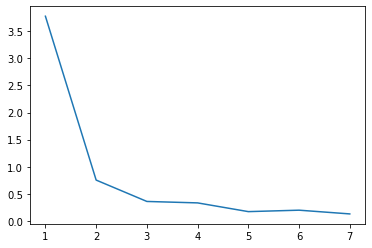

In [34]:

plt.plot([i for i in range (1,8,1)],Distorsion)

In [42]:
a=np.array([[5,3,4],[8,6,10],[1,2,7]])


In [45]:
a.min()

1

In [48]:
np.argmin(a)

6